# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import stencil_calculator as sc
%matplotlib inline
import time, os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

import numerical_derivative as nd

We can use the NumDe package to Taylor expand any function with respect to any number of parameters and up to any order. In this noteboo, I will show how easy it is to do that.

Suppose we want to Taylor expand the function

$$
f(x,a) = x^2* \sin(x*a)
$$
with respect to $a$ and $b$. We start by simply computing the function in the grid and taking all derivatives up to some order:

In [83]:
#Defining the function
x_array = np.arange(-5,5,0.01)
def function_test(theta,kwargs):
    a,b = theta
    x_array = kwargs["x_array"]
    return x_array**2*np.sin(a*x_array) +  x_array**2*np.cos(b*x_array) + 200

In [85]:
ND_obj = nd.FiniteDerivative()

N_grid = 7
N_derivative = 2*N_grid#The maximum derivative that can be computed for a grid is 2*N_grid

#The reference point where the derivatives will be evaluated at. The Taylor expansion will be around these values
a_ref = 1; a_step = abs(a_ref)*0.1;
b_ref = 1; a_step = abs(a_ref)*0.1;

expansion_table = {
    "a":[a_ref, a_step],
    "b":[a_ref, a_step]
}

#Compute the function in the grid and take all derivatives
ND_obj.define_setup(N_derivative,N_grid, expansion_table)
ND_obj.evaluate_in_grid(function_test, x_array=x_array)
ND_obj.take_derivative_ALL()

100%|██████████| 225/225 [00:00<00:00, 5779.47it/s]


To use the Taylor expanded function you have to use the method TaylorExpand in the FiniteDerivative class:

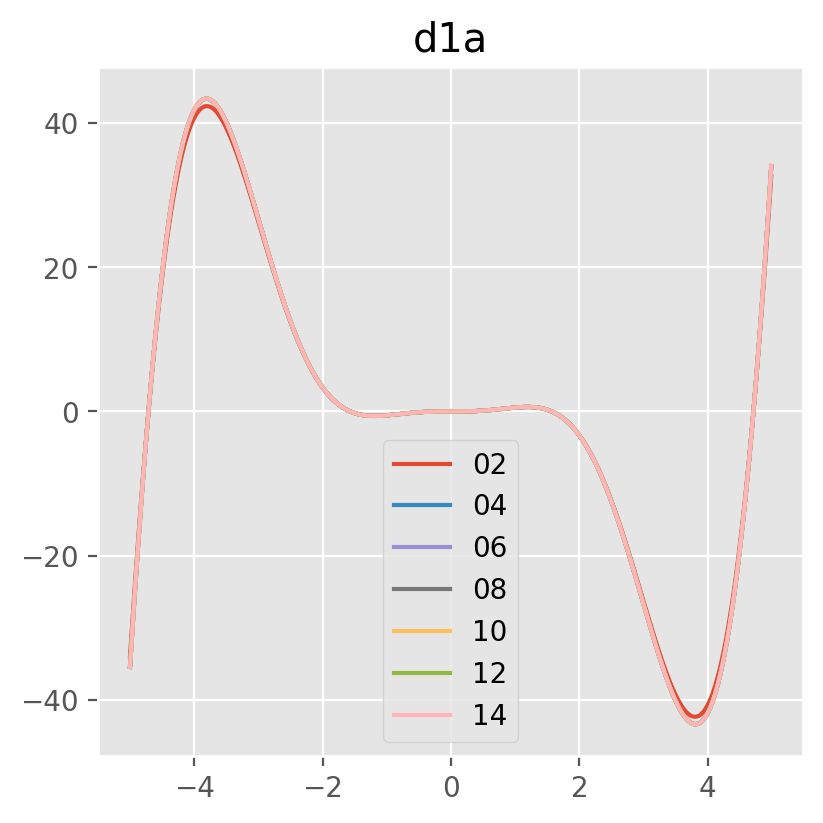

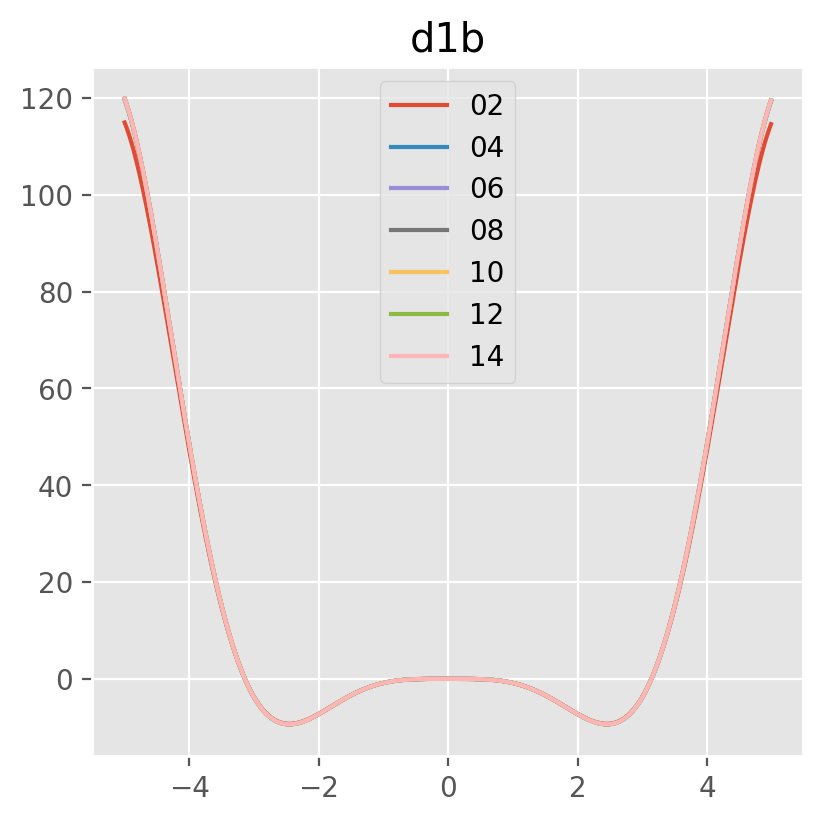

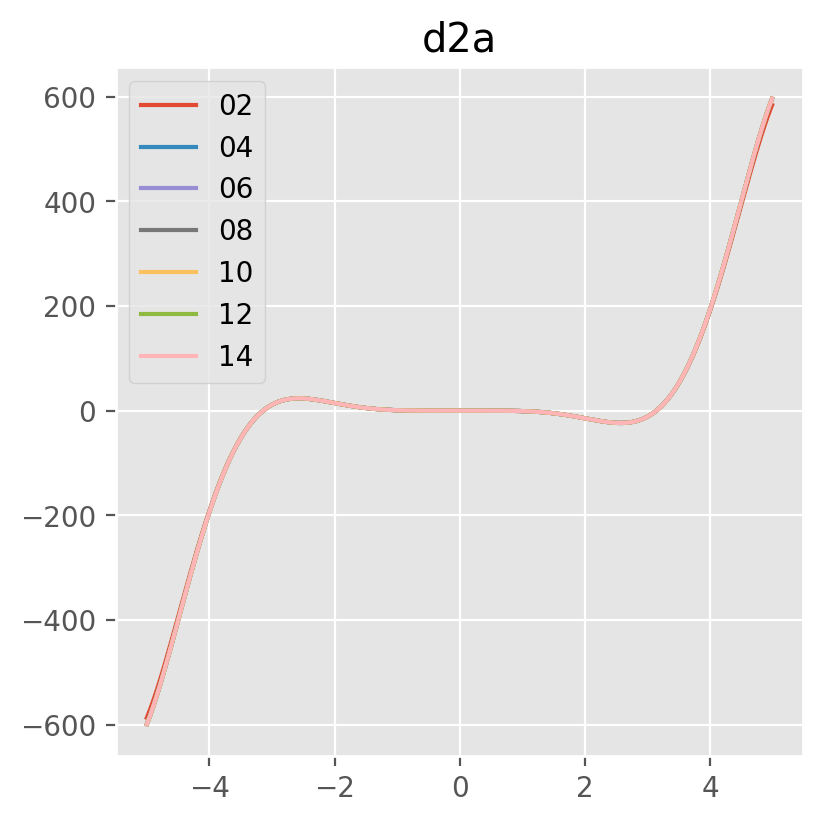

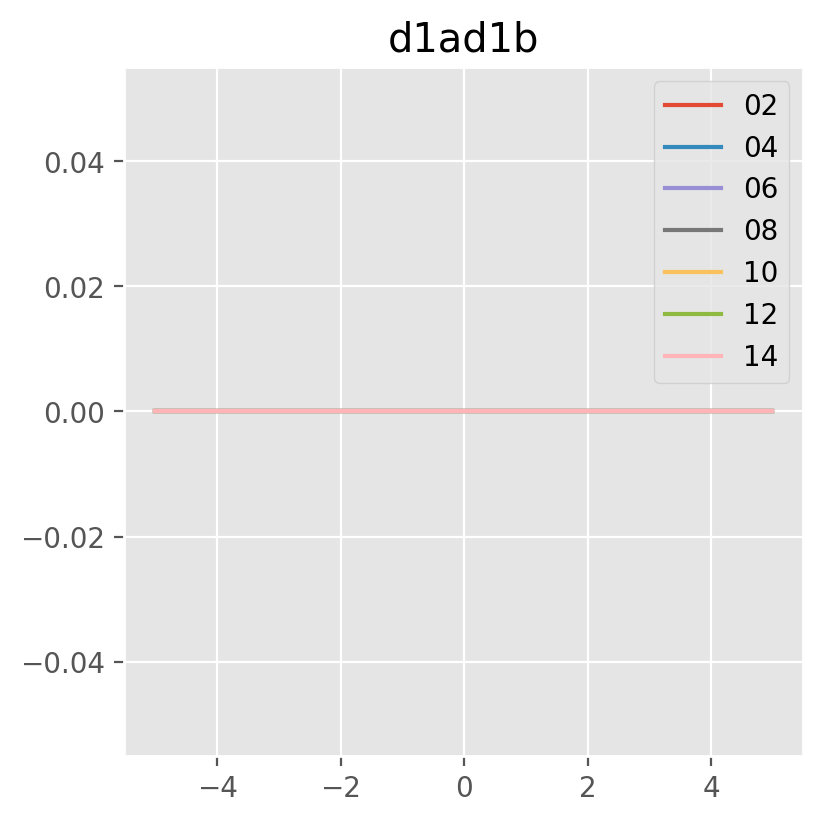

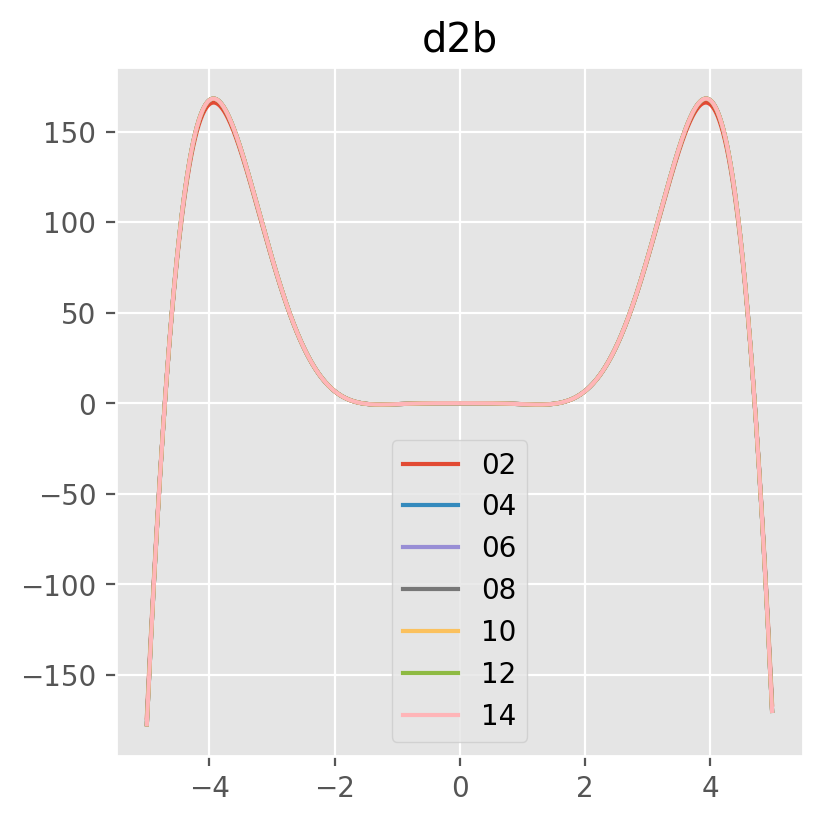

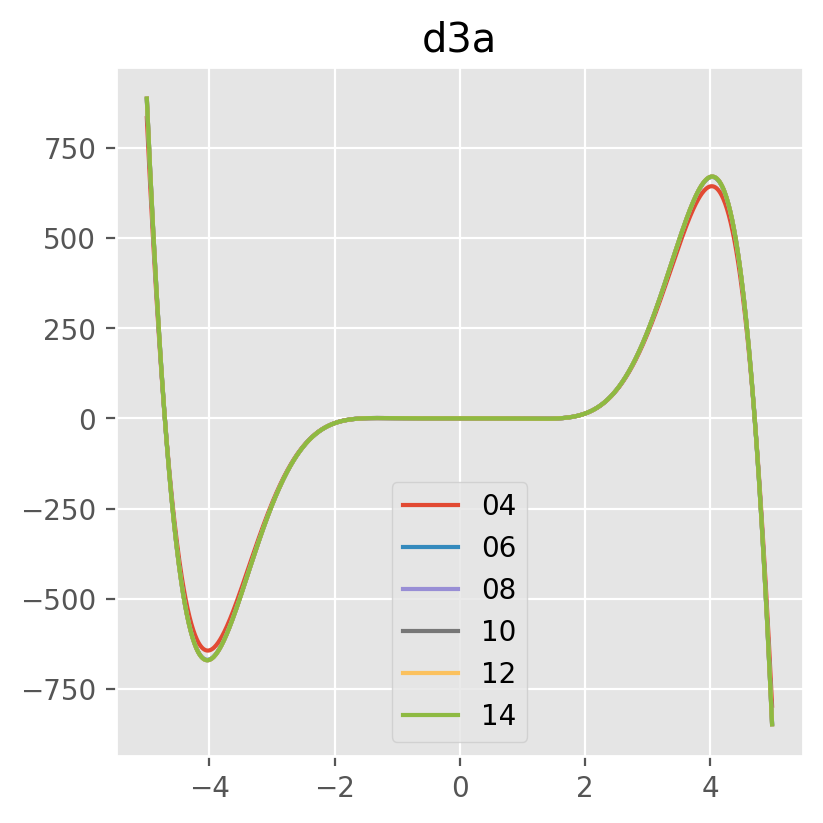

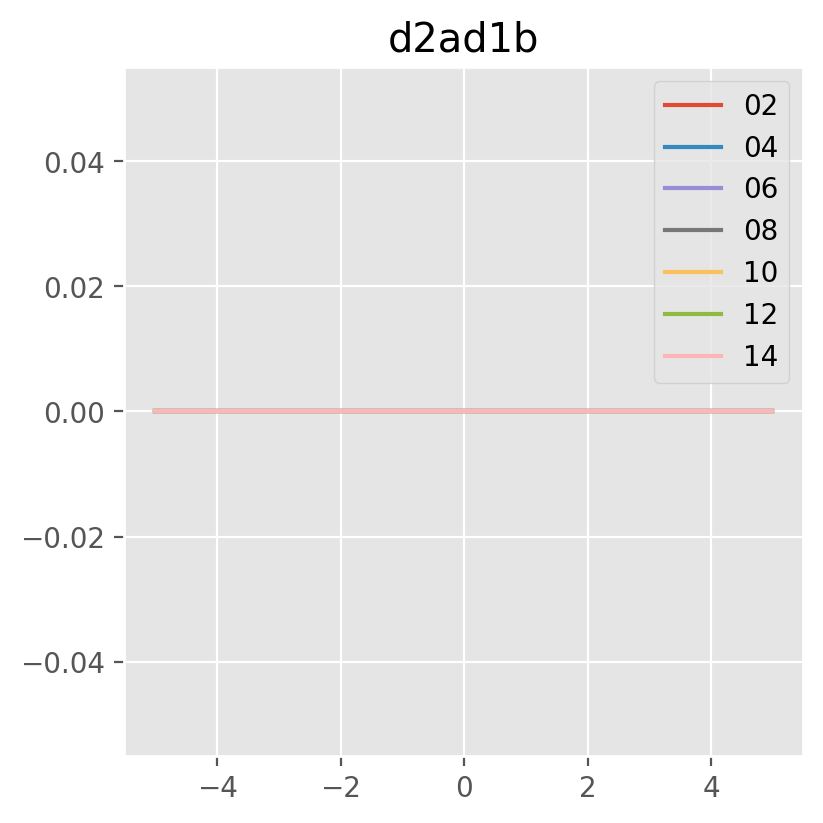

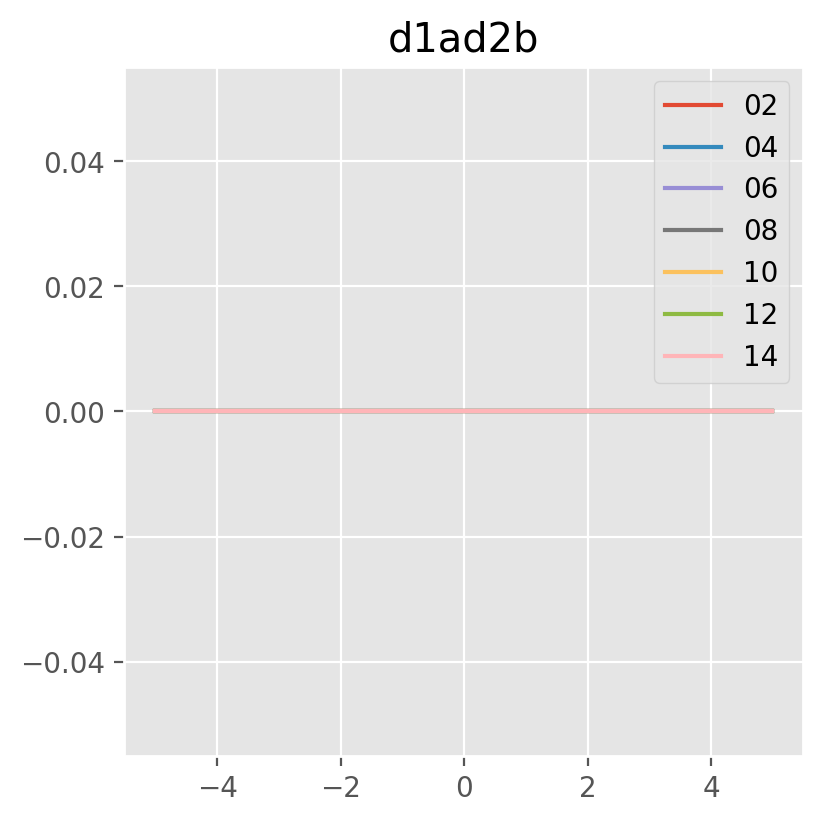

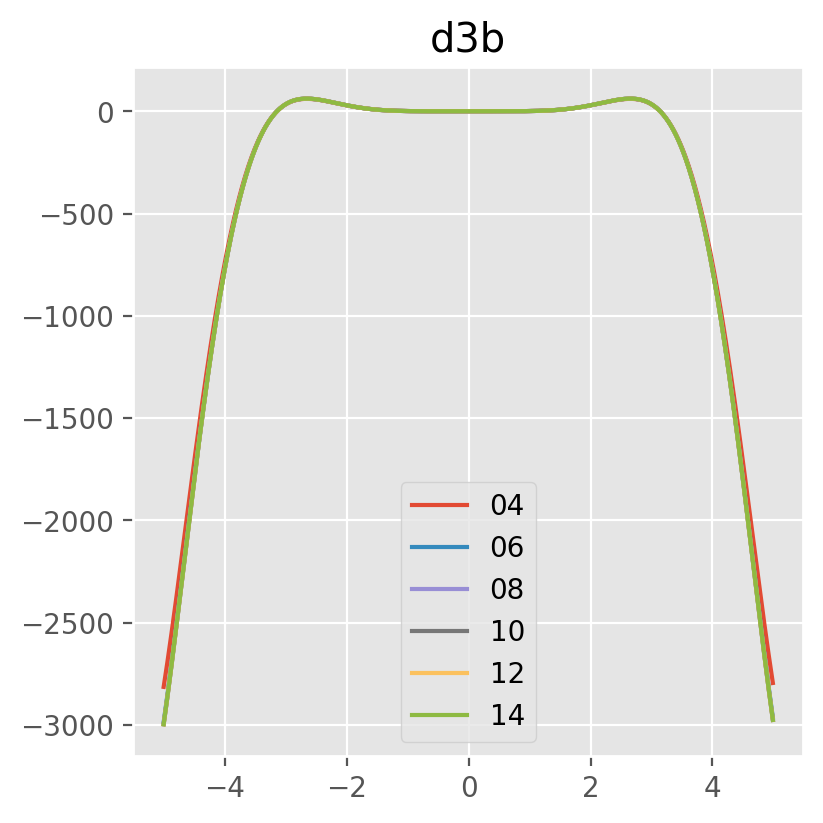

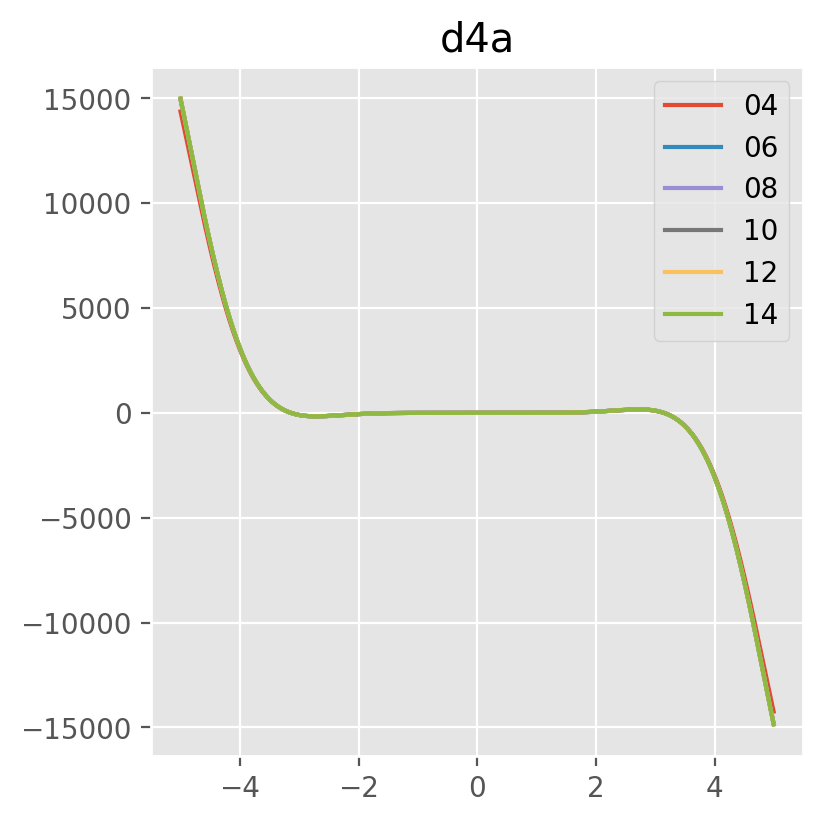

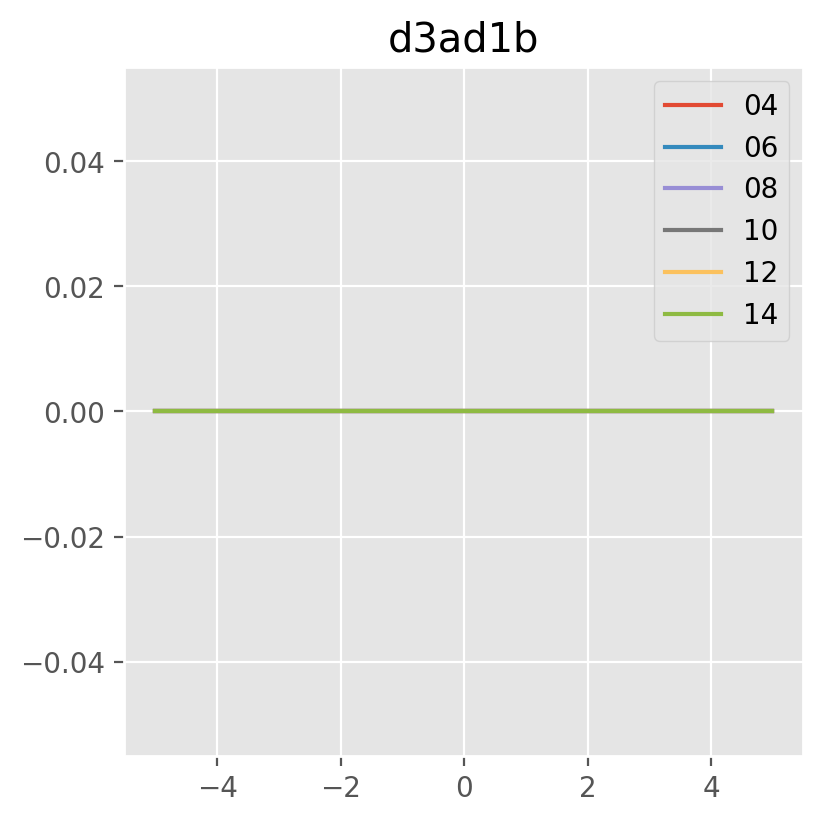

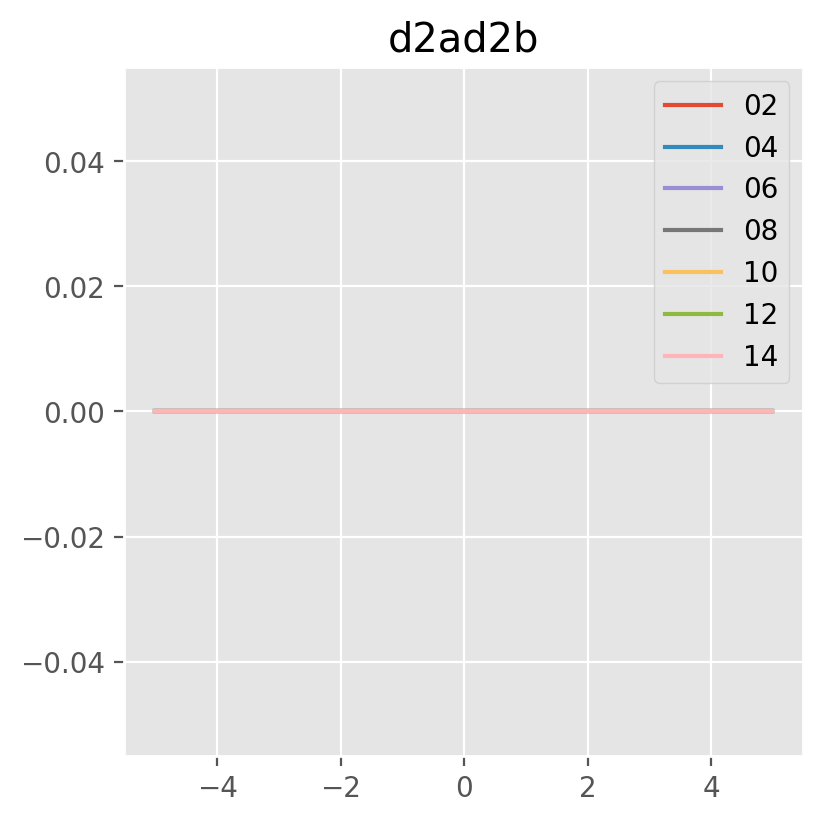

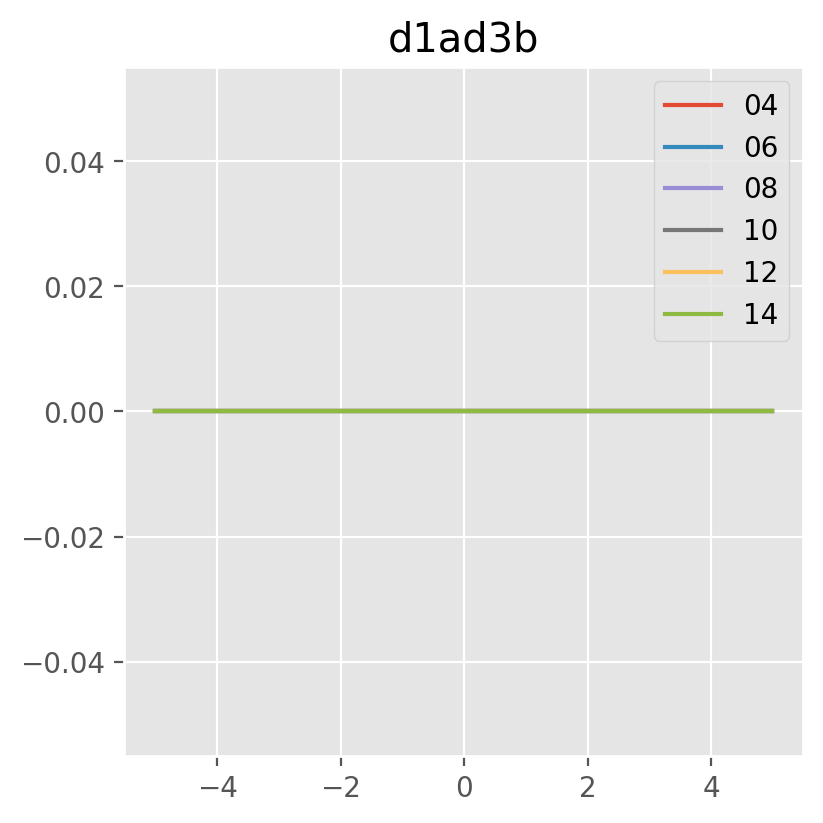

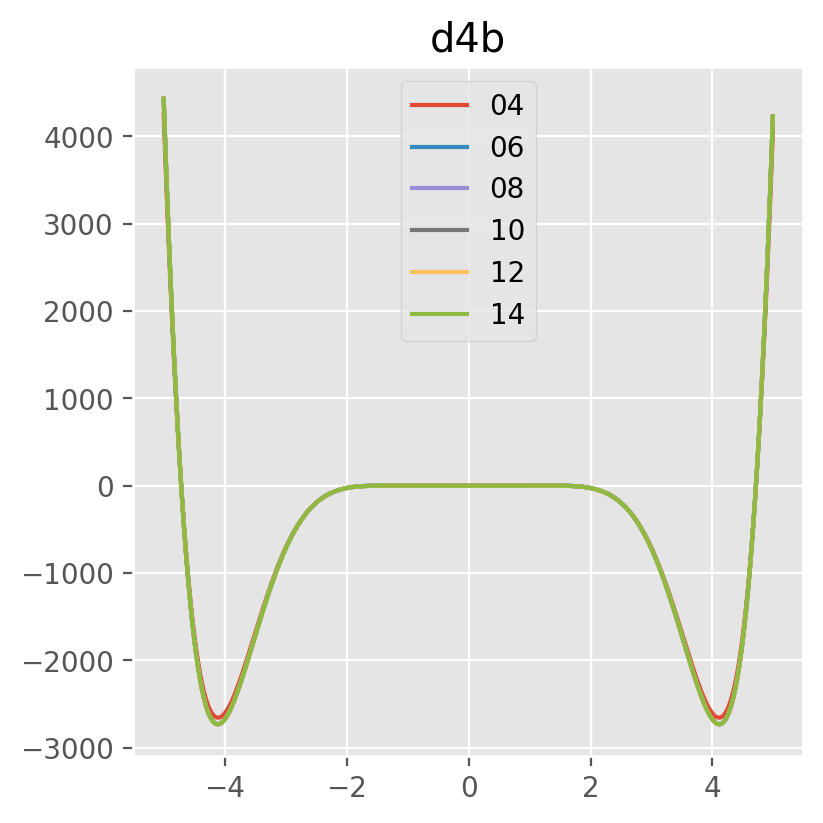

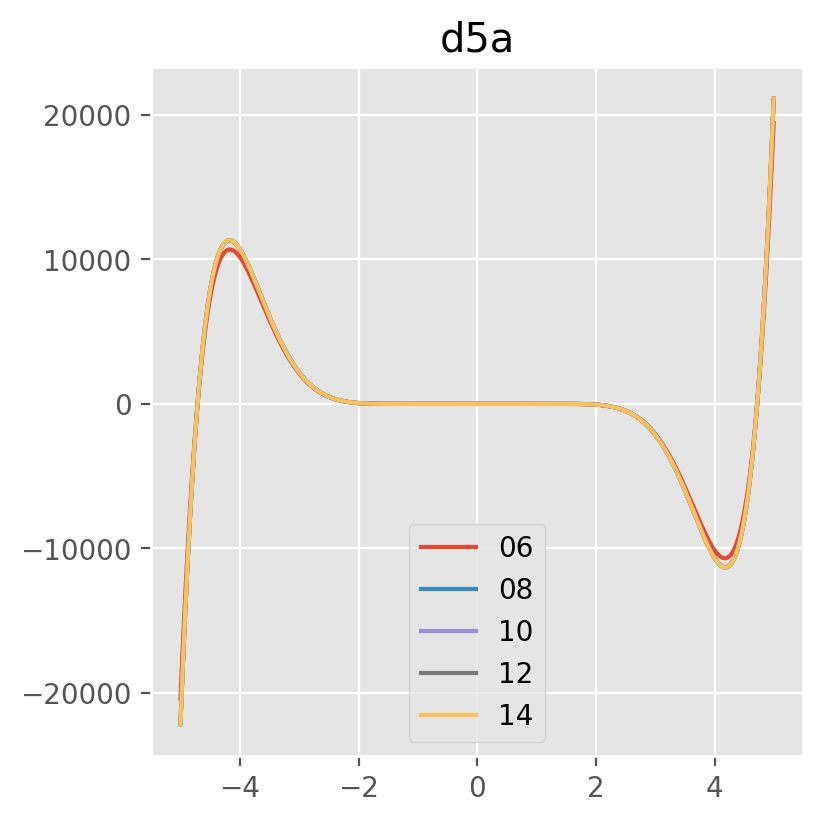

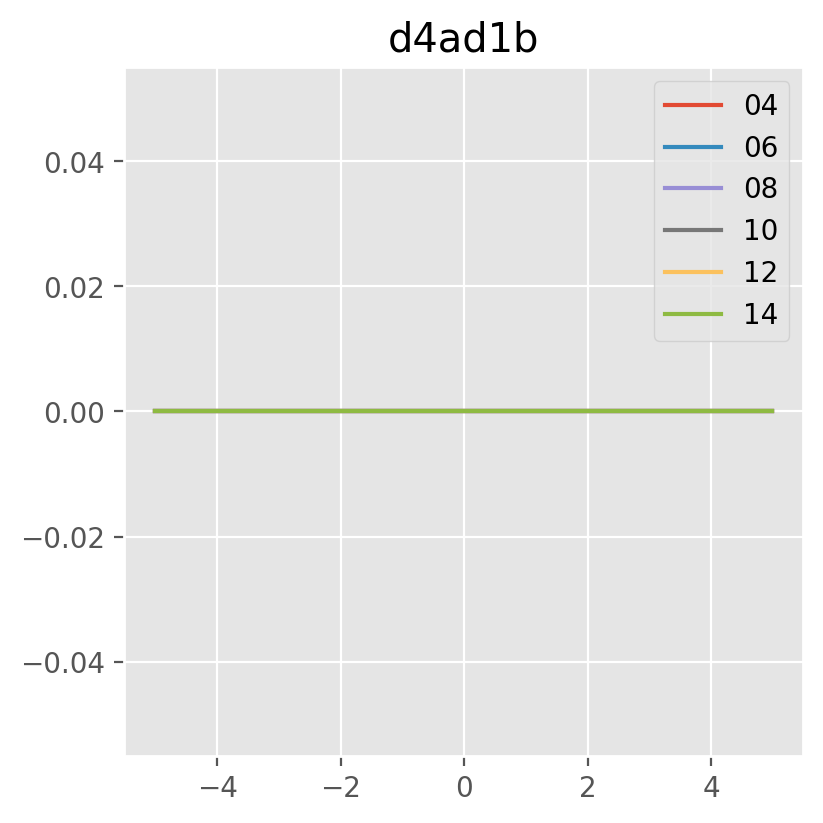

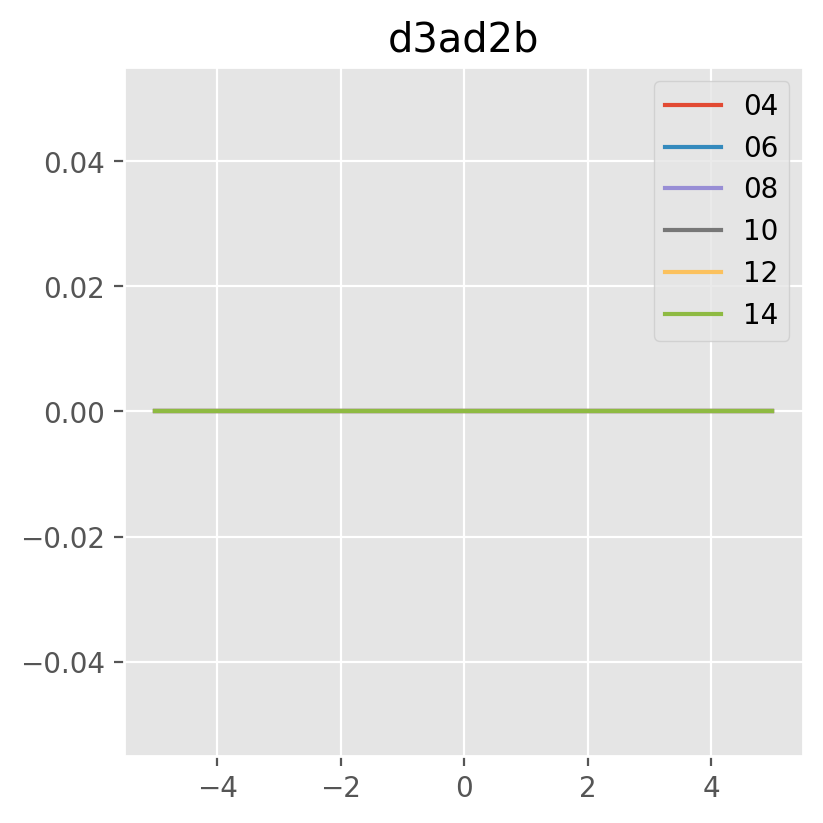

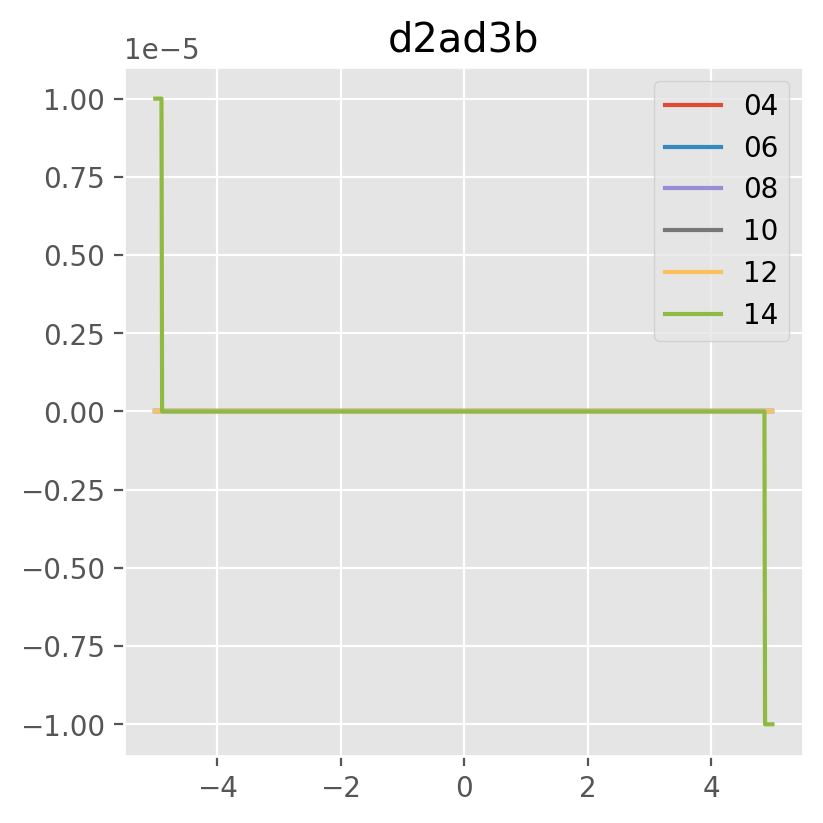

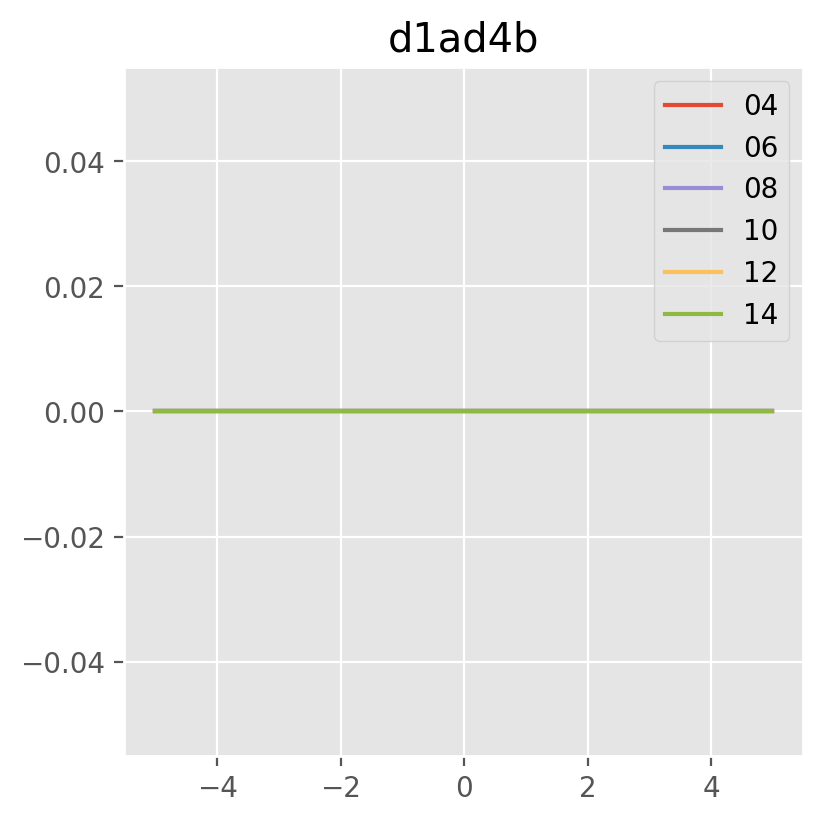

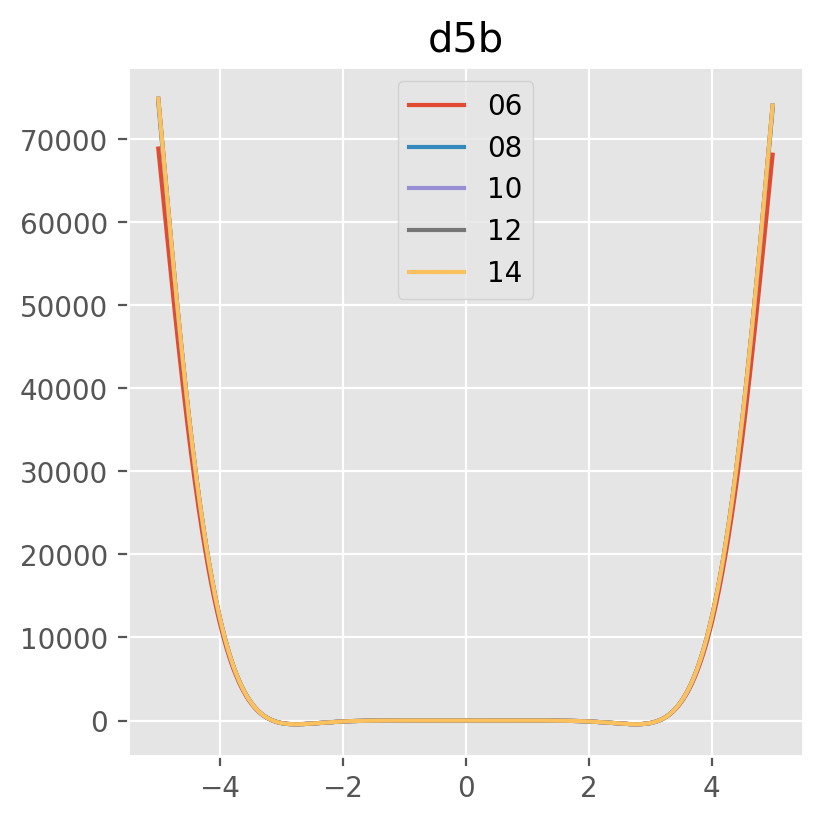

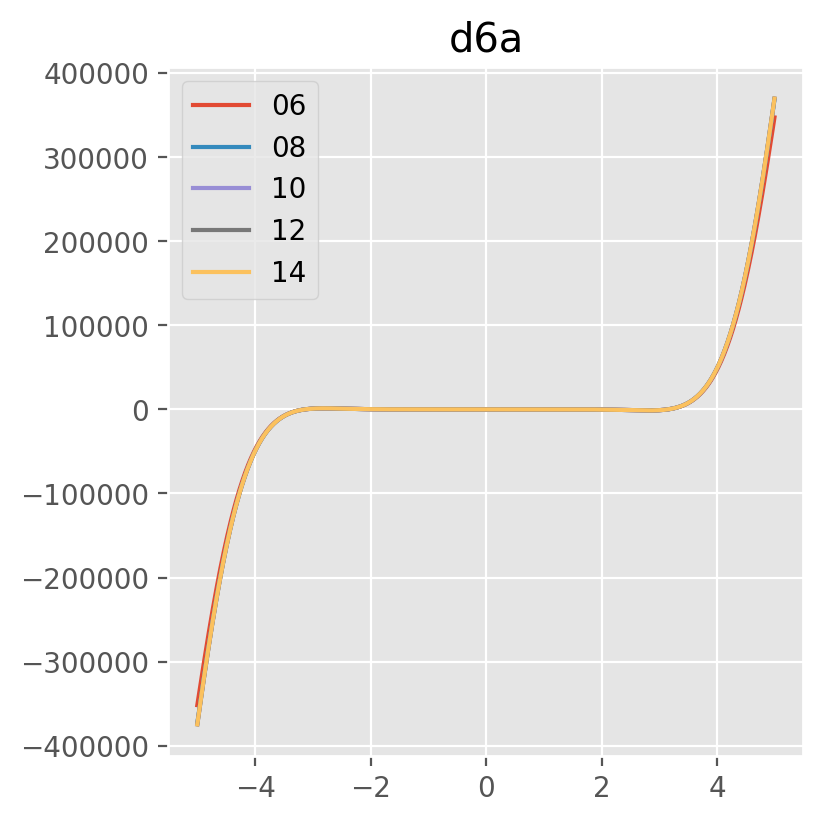

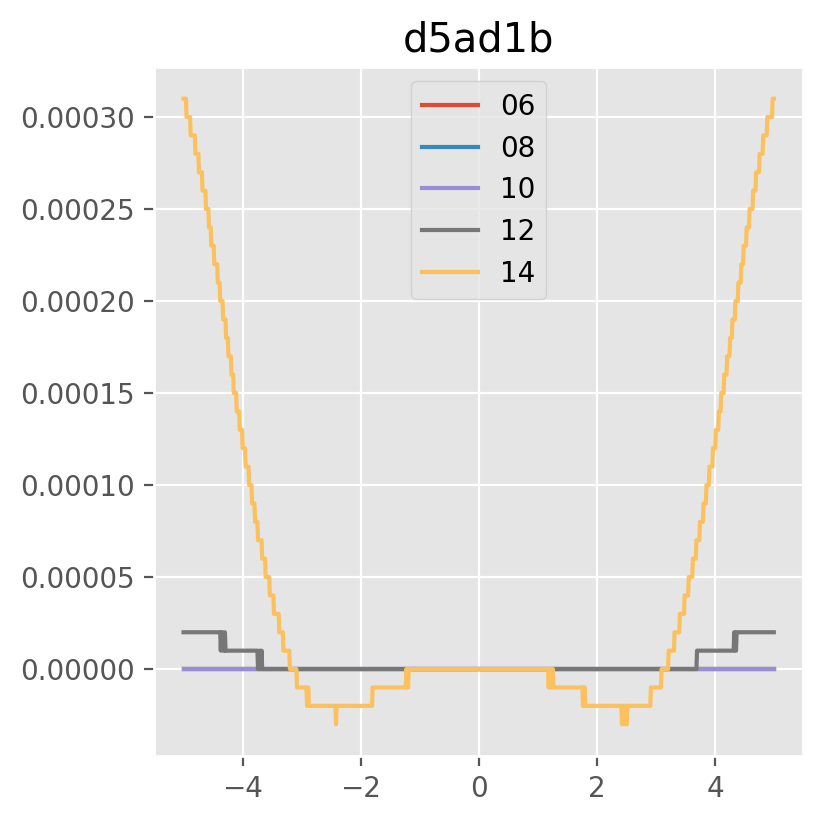

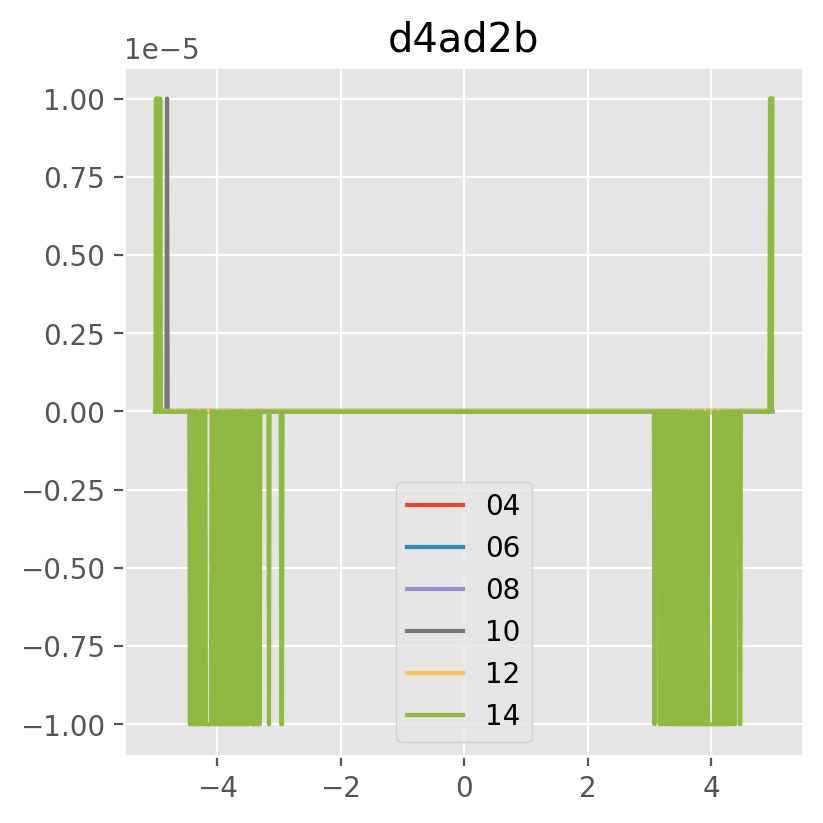

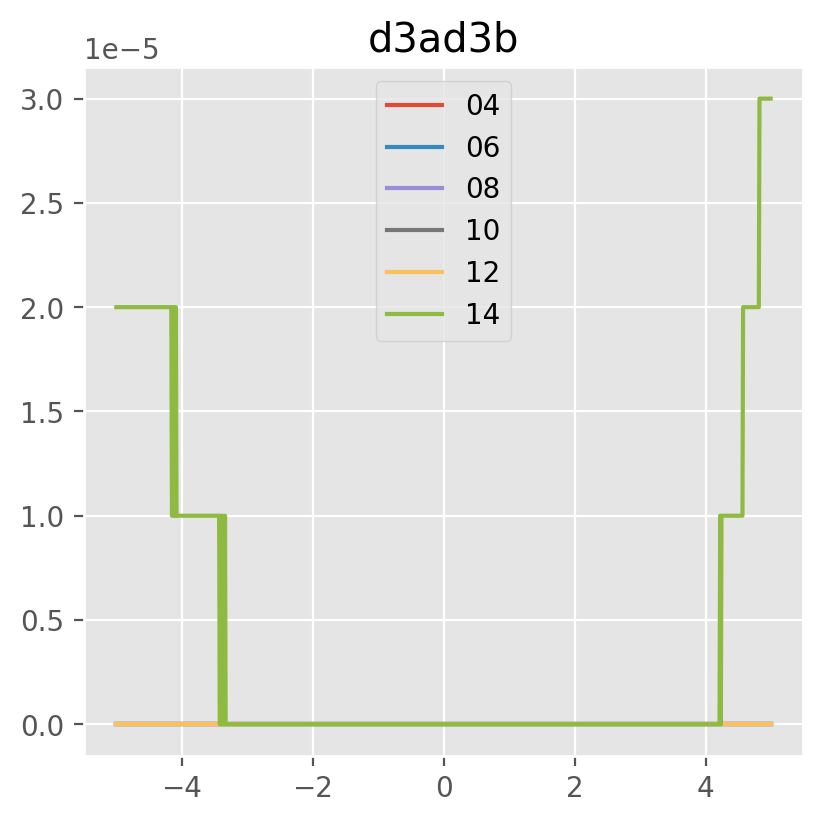

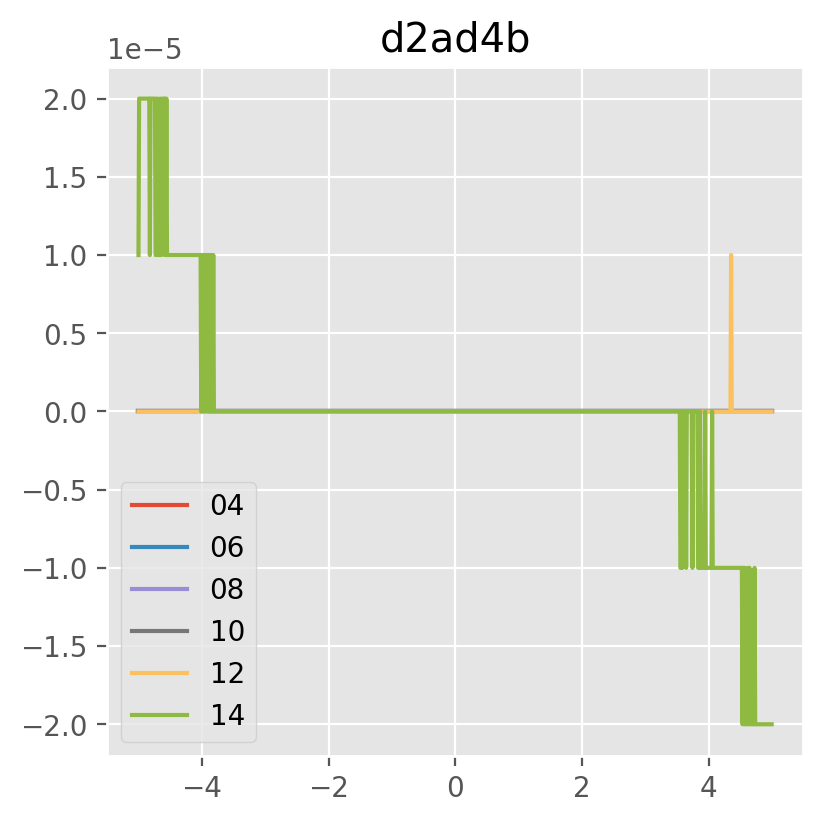

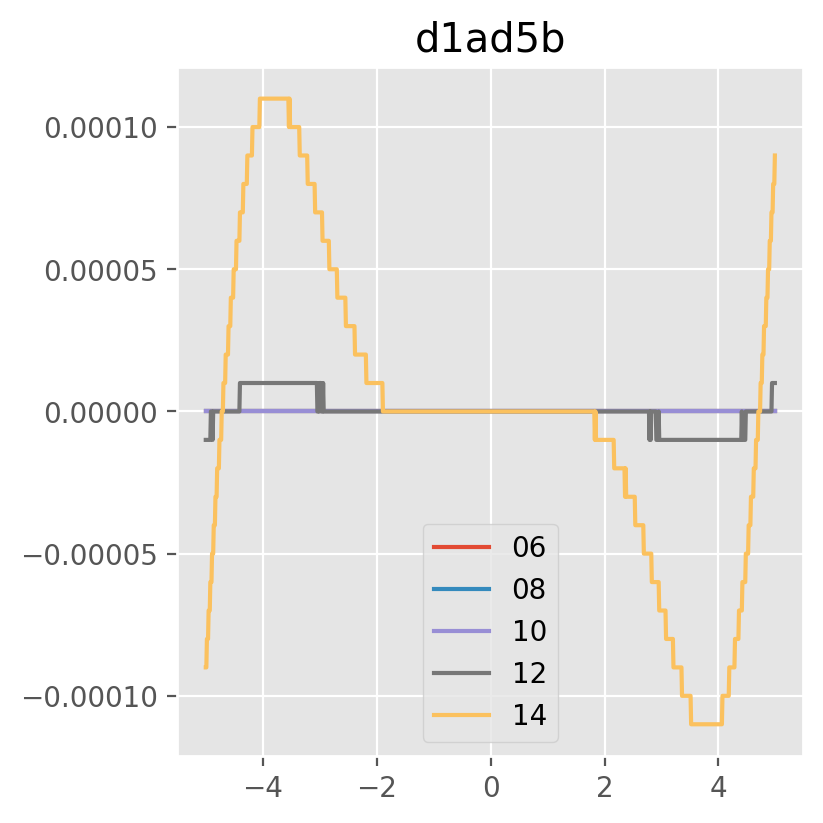

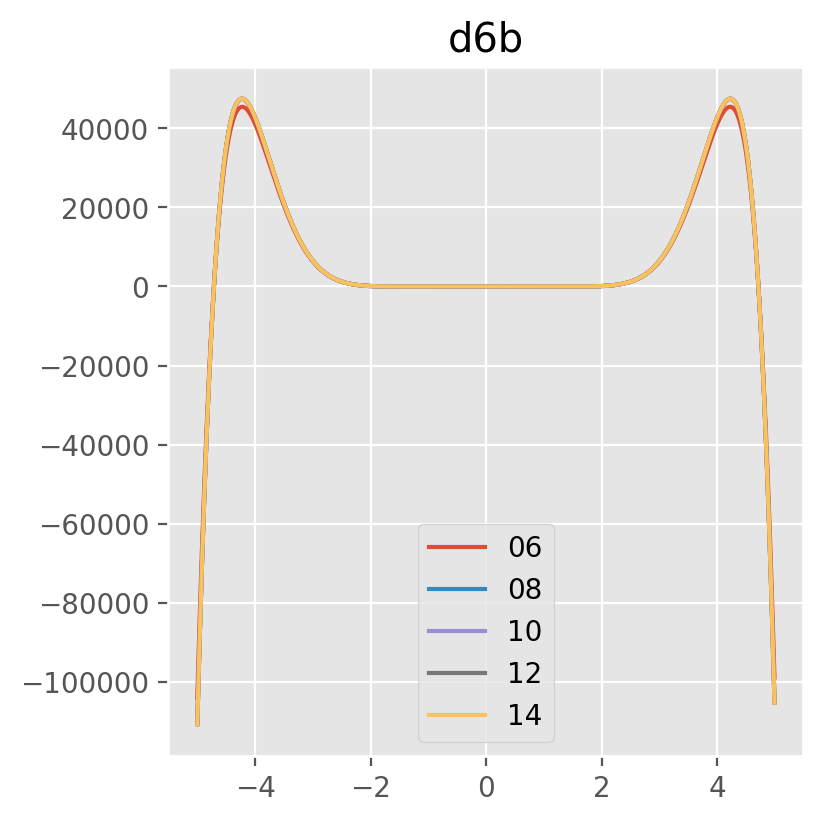

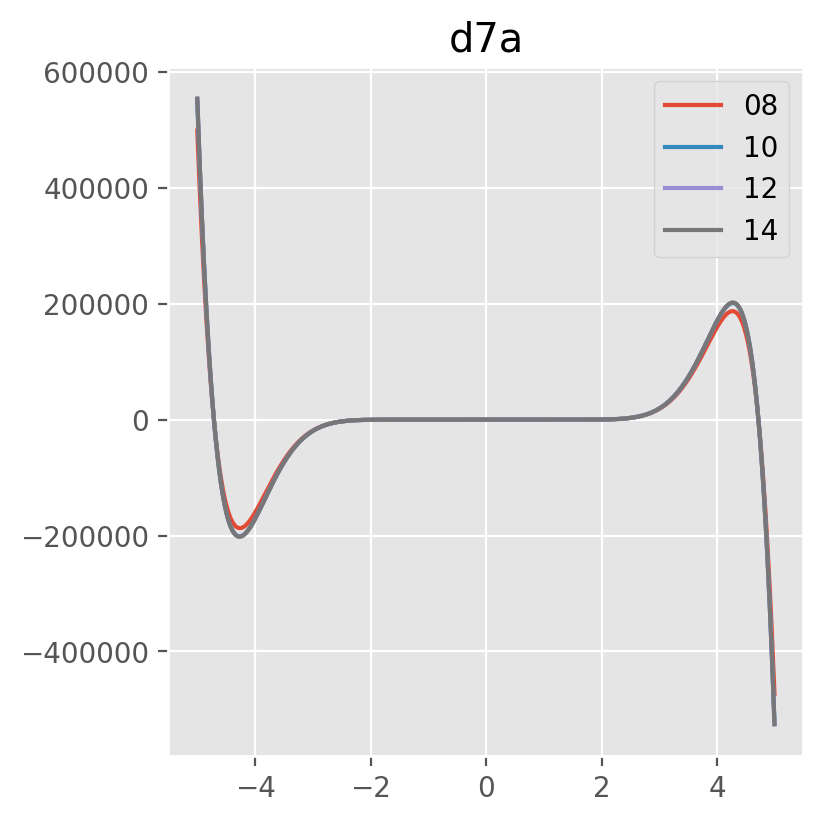

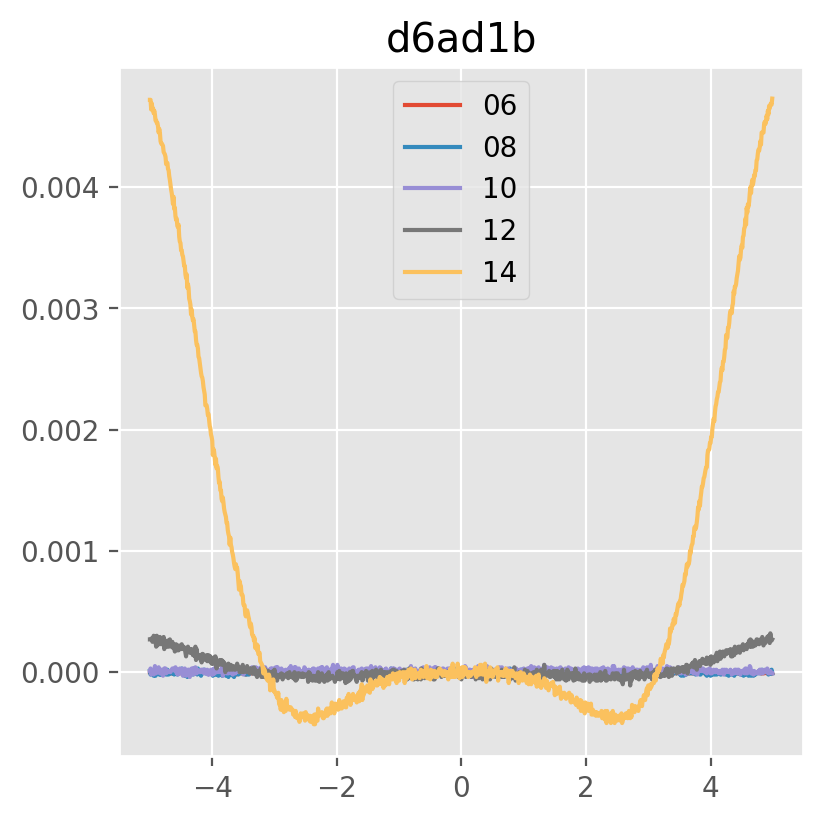

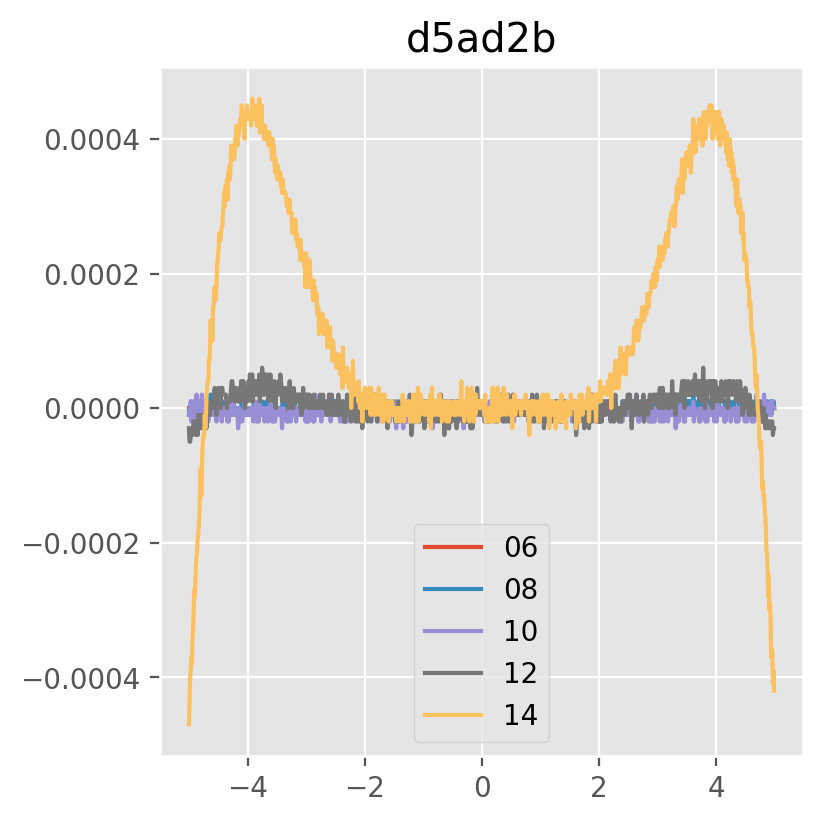

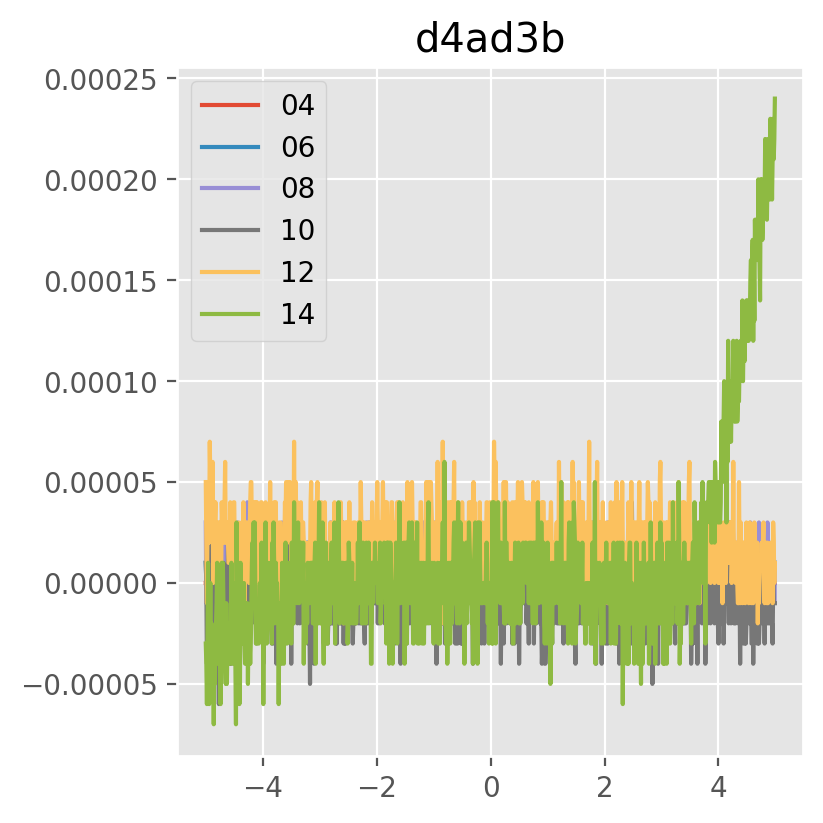

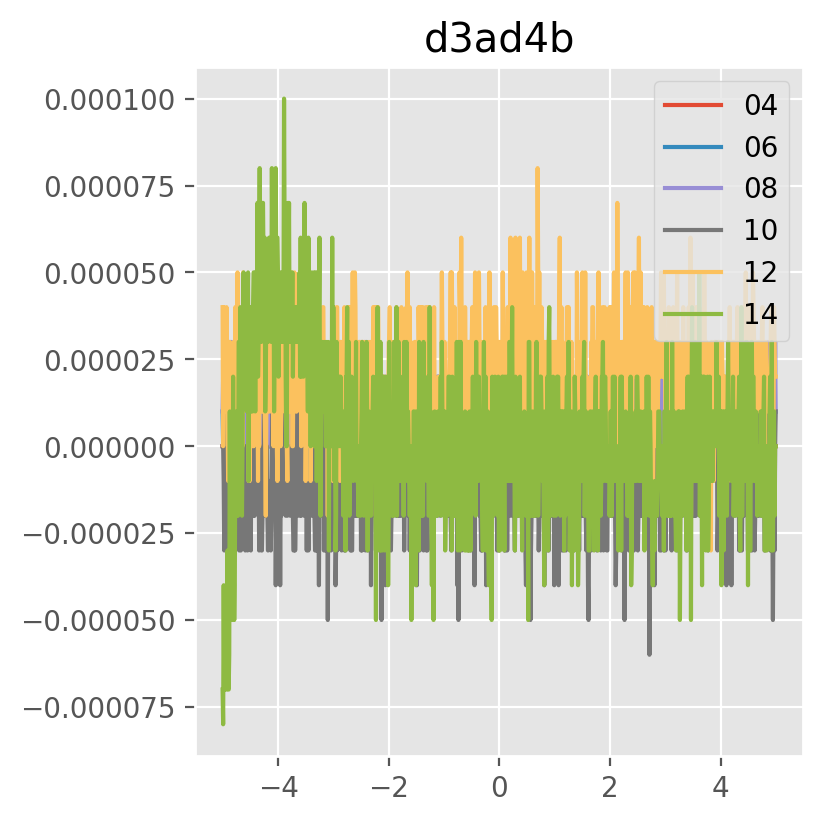

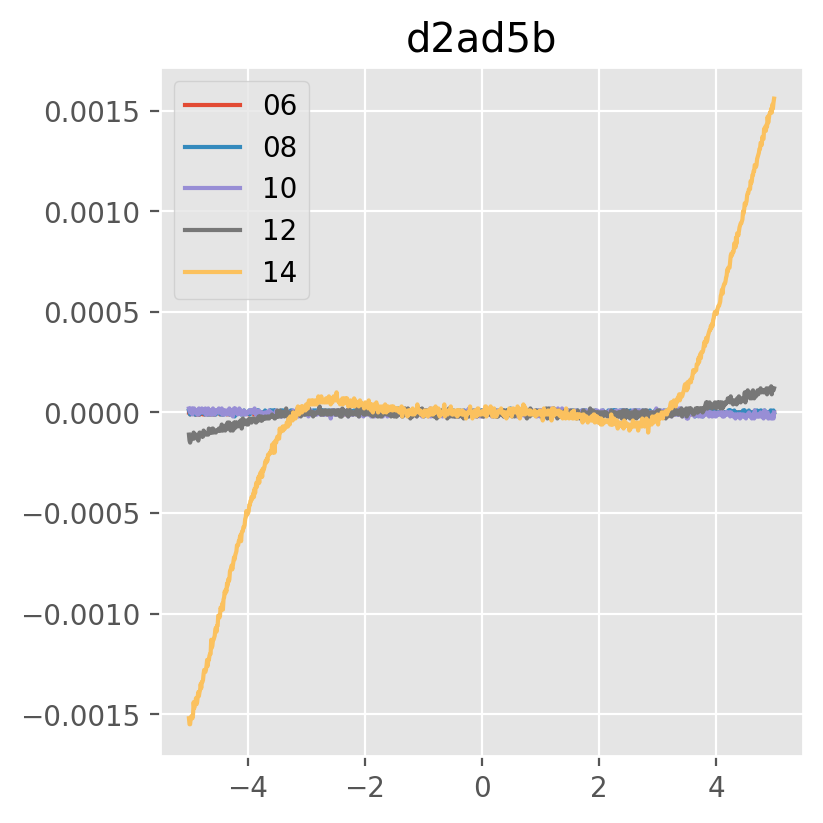

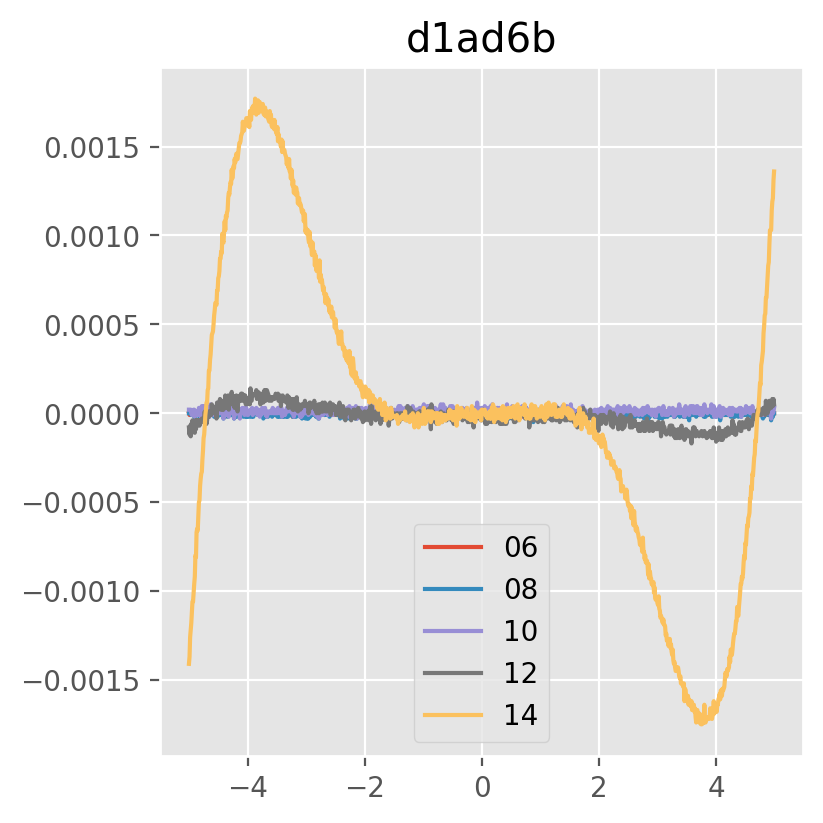

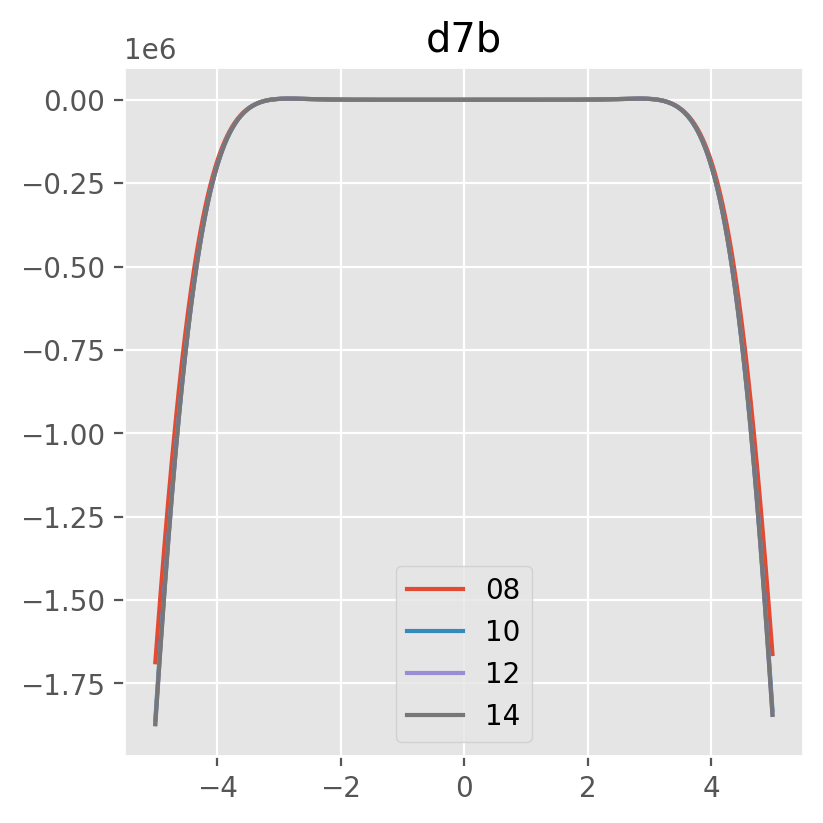

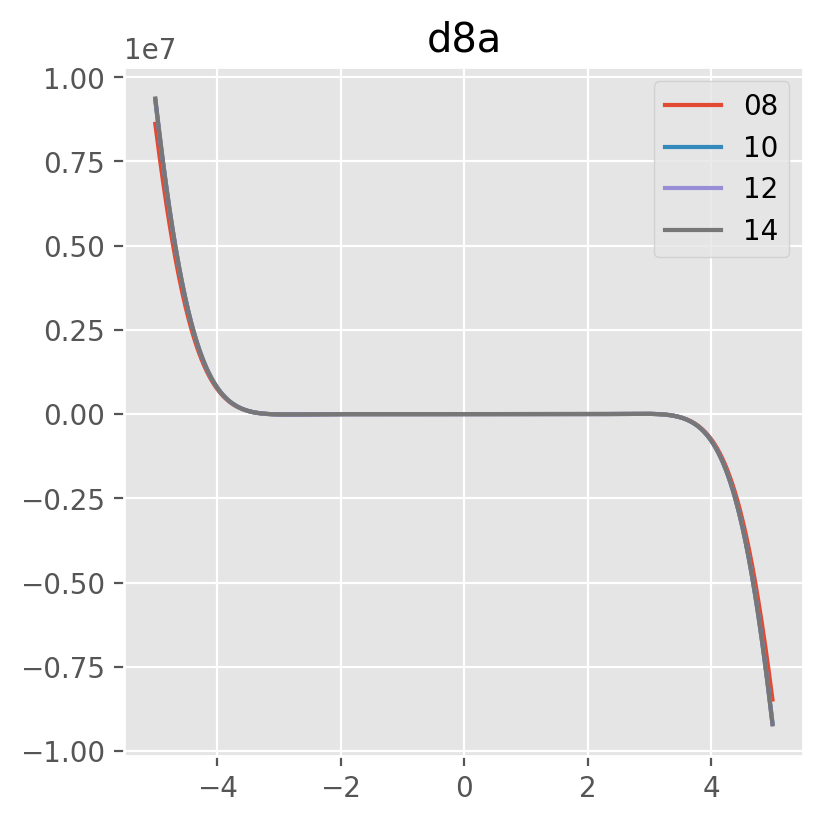

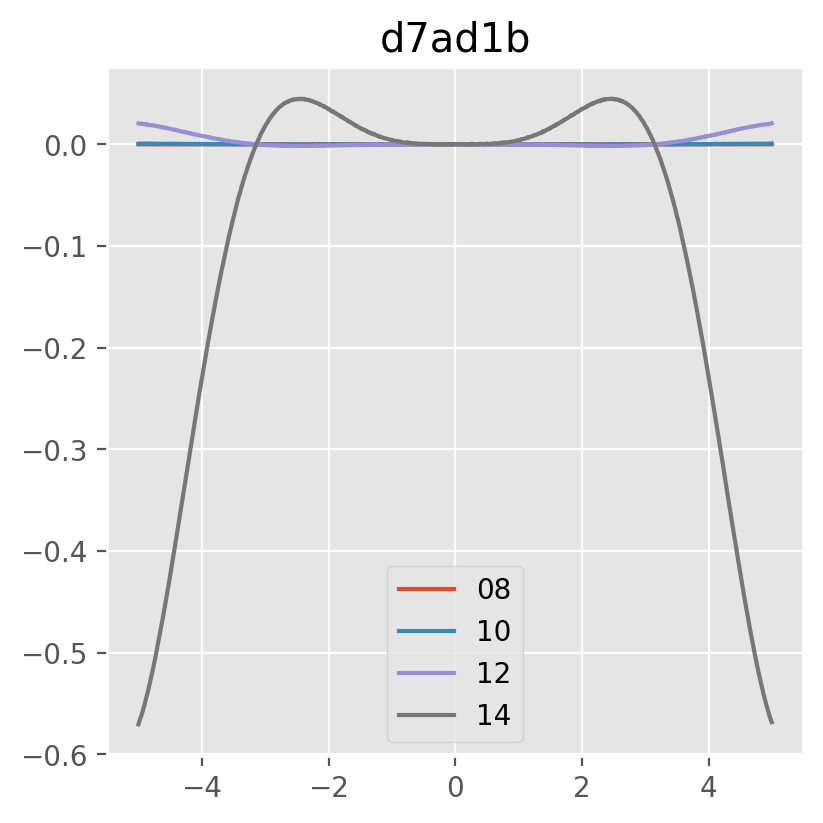

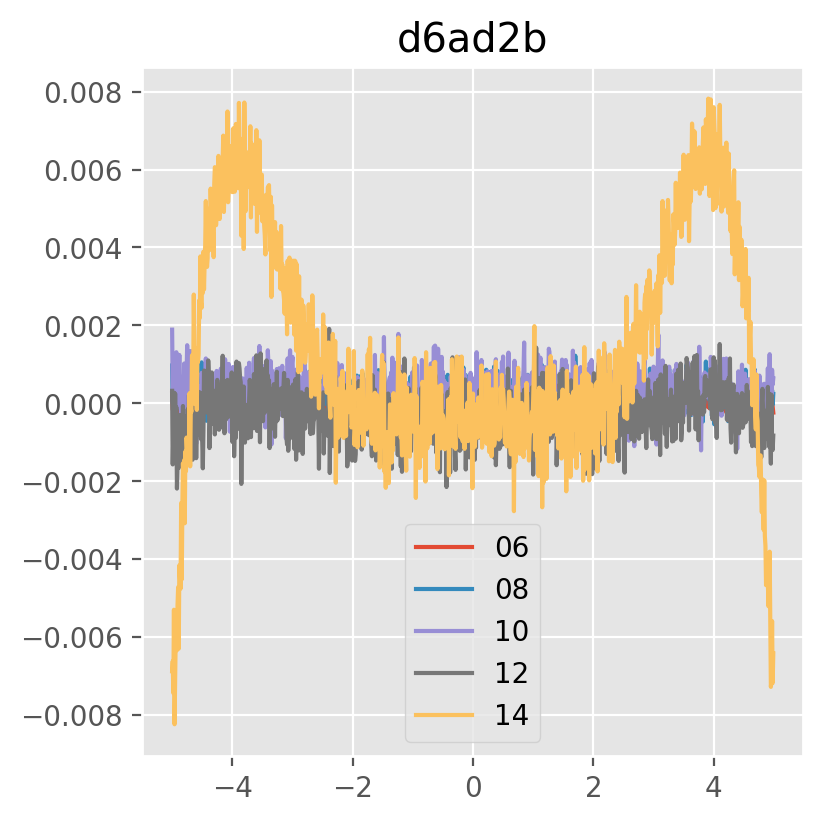

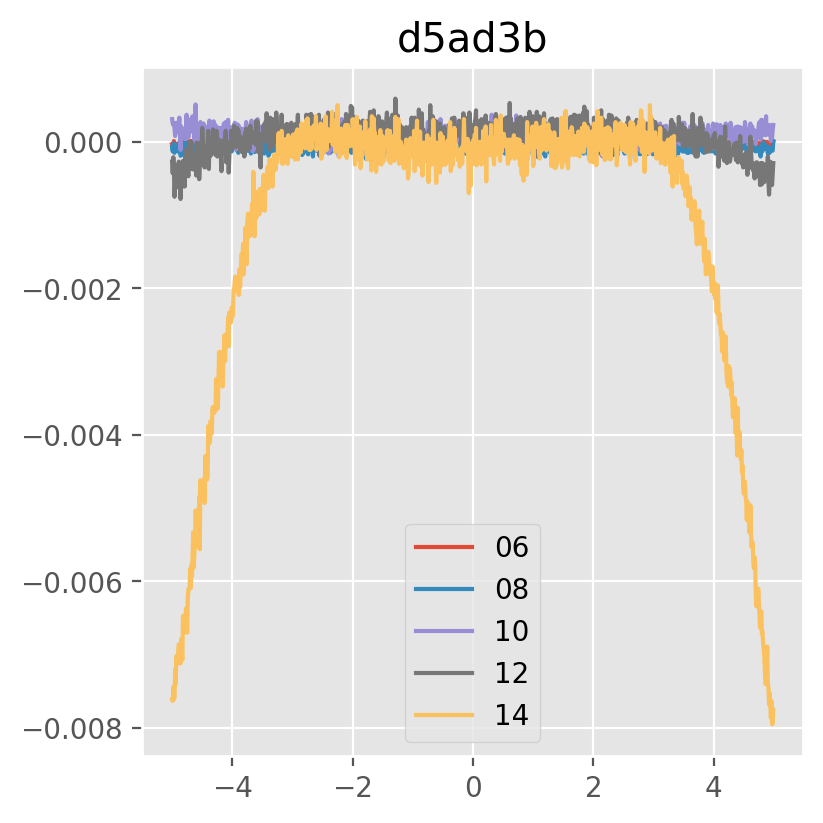

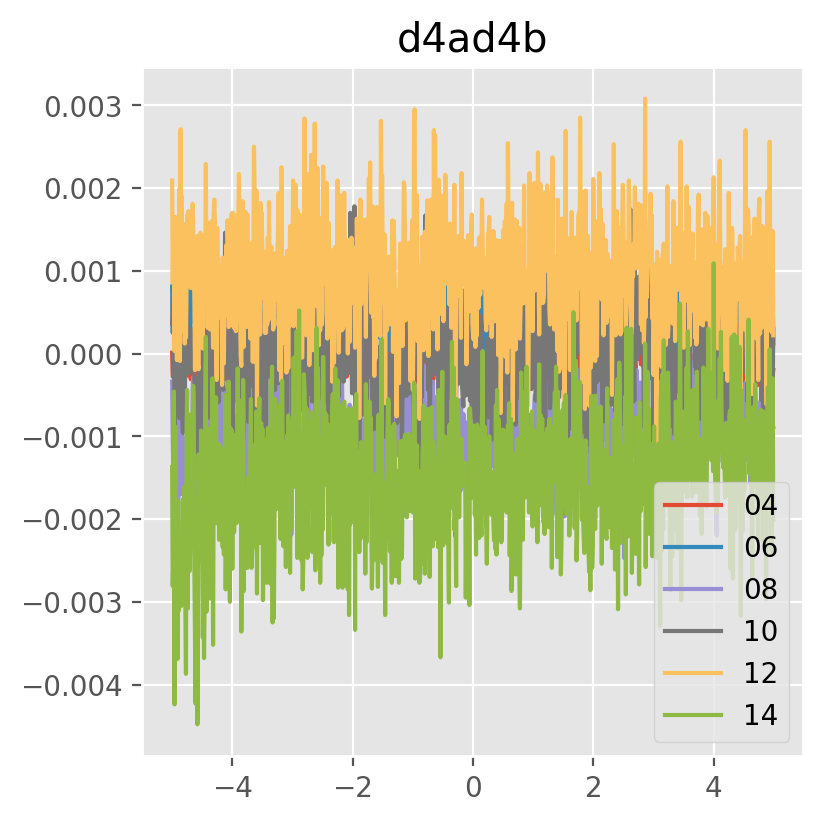

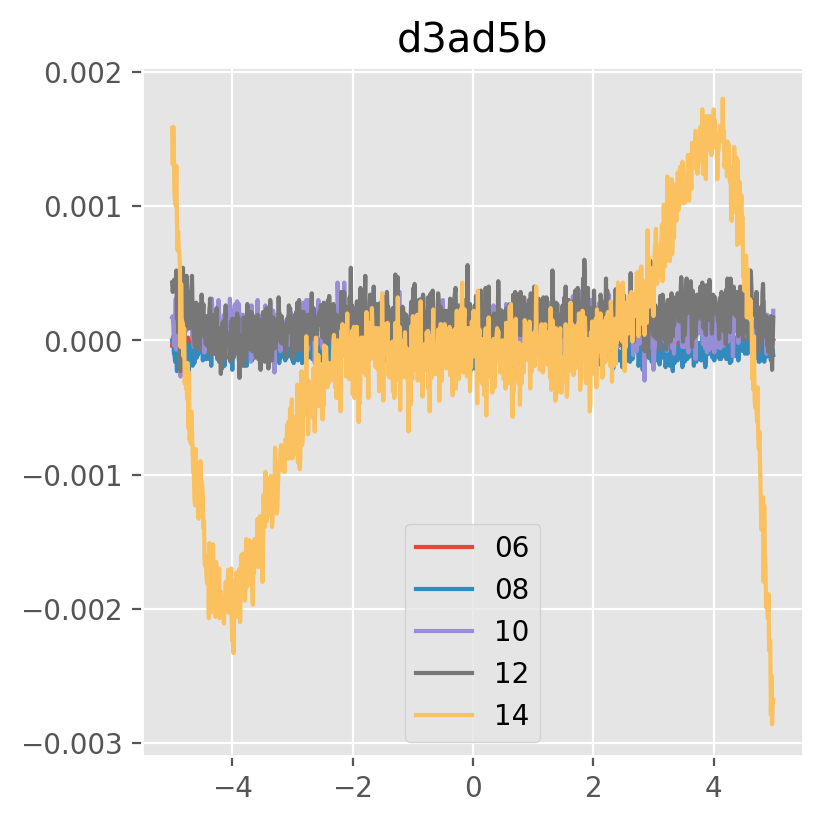

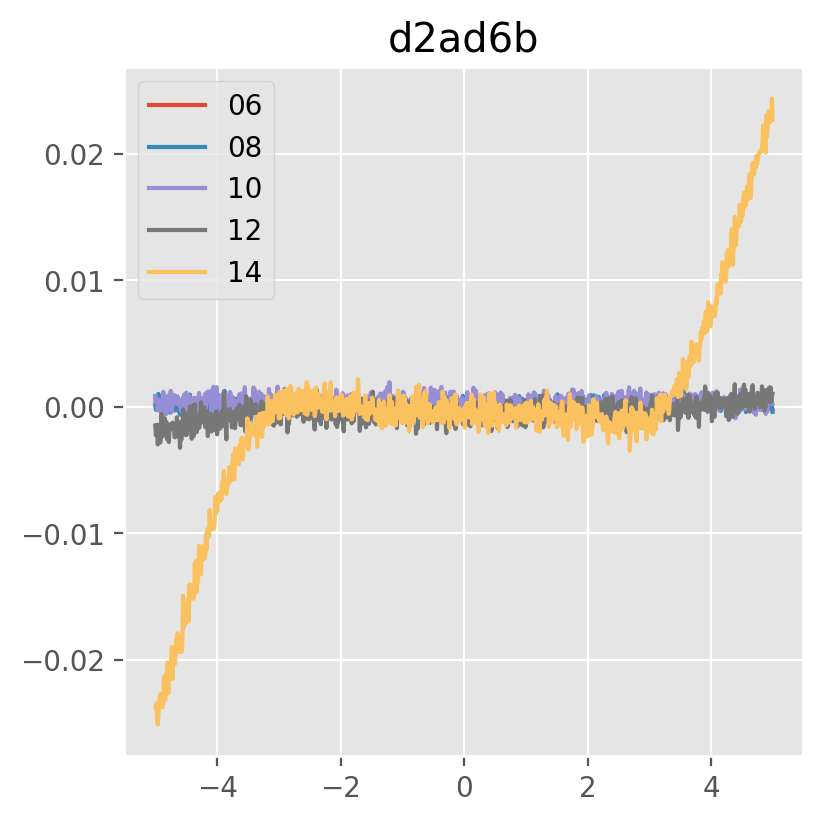

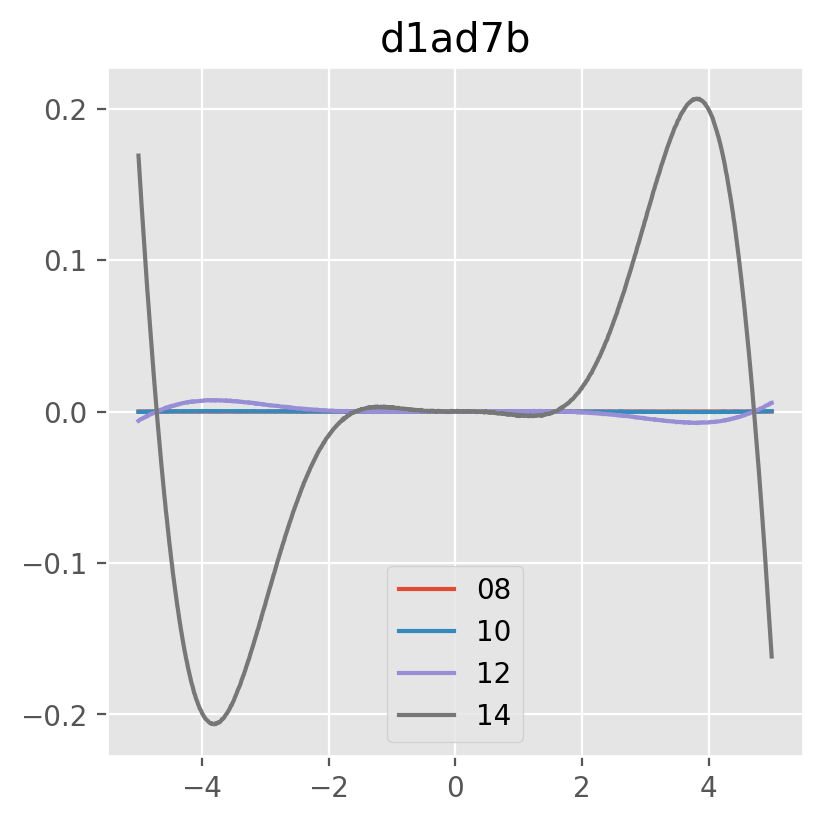

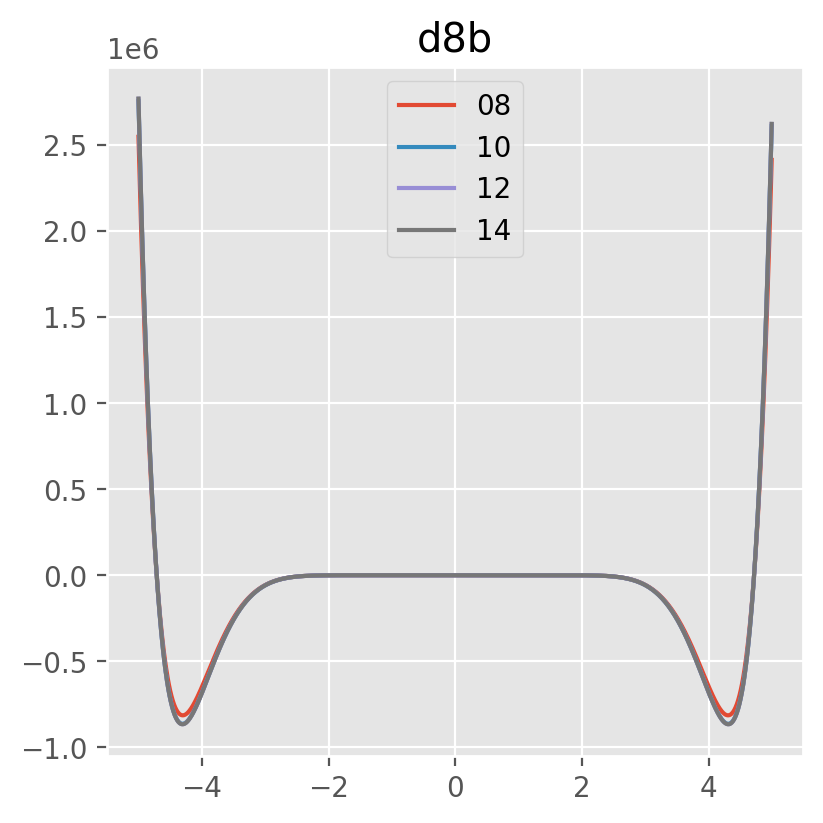

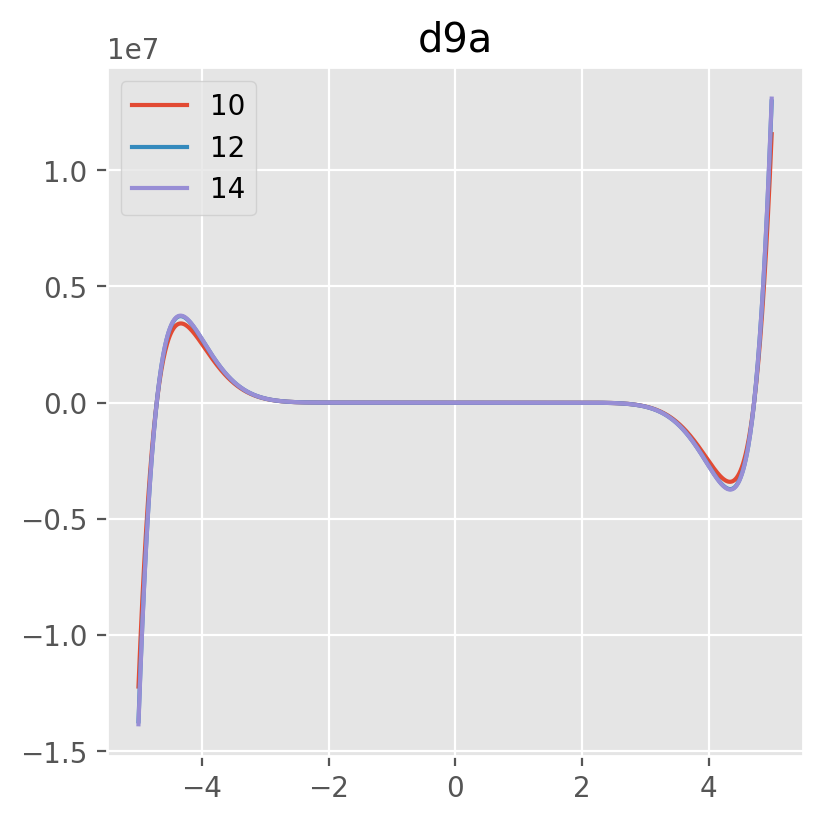

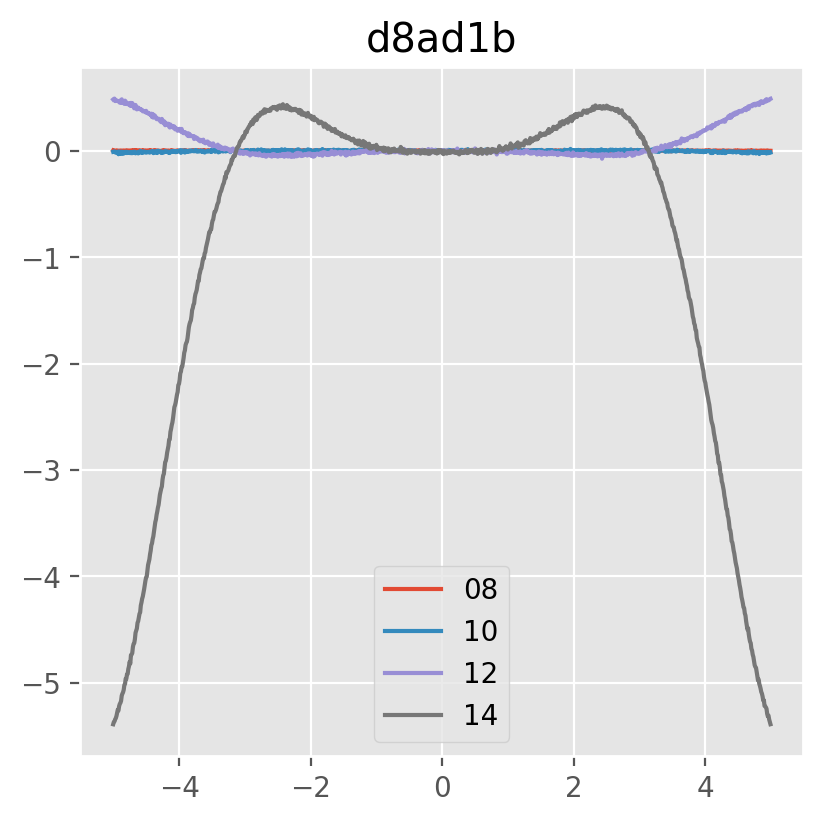

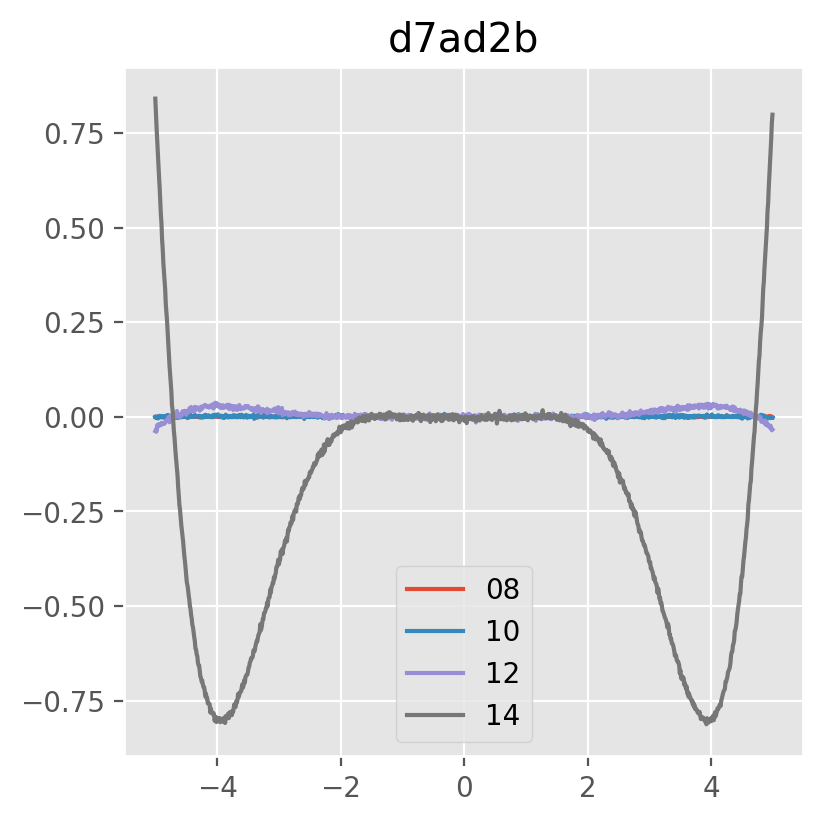

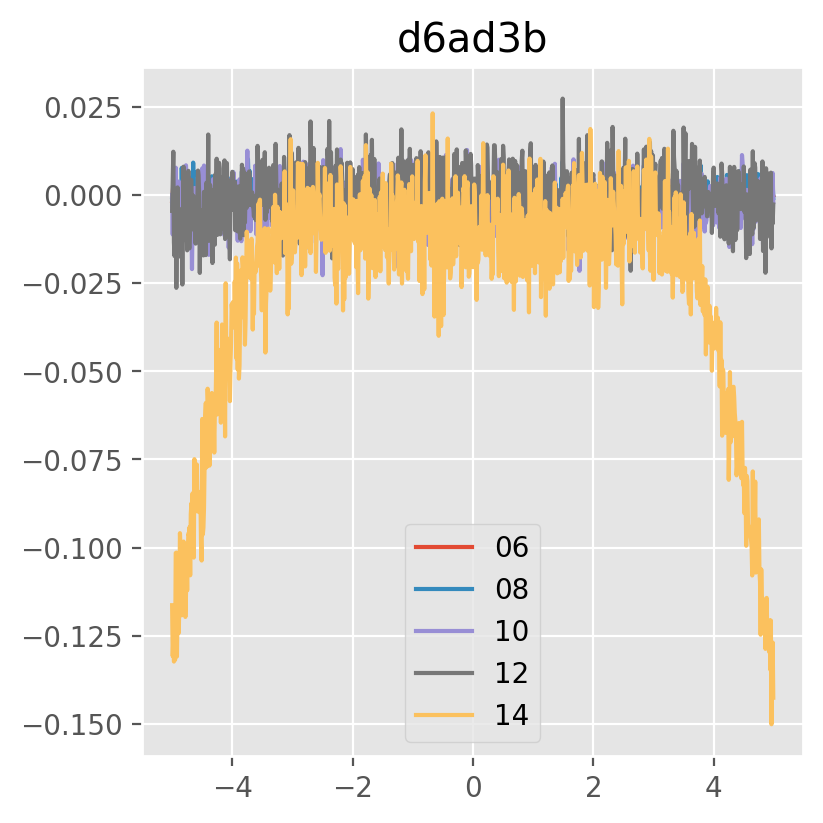

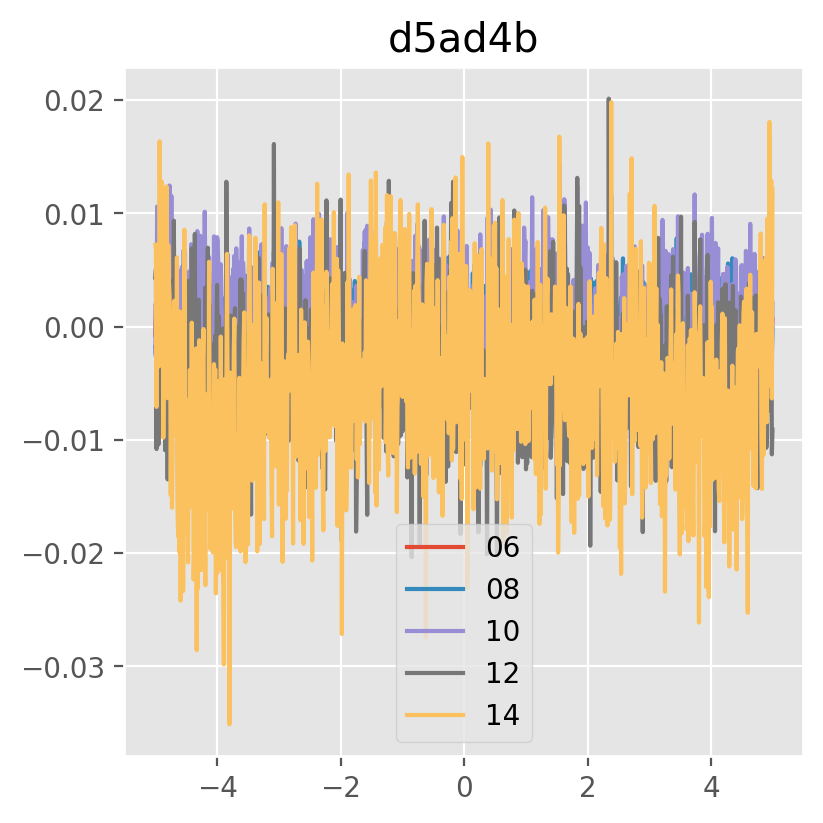

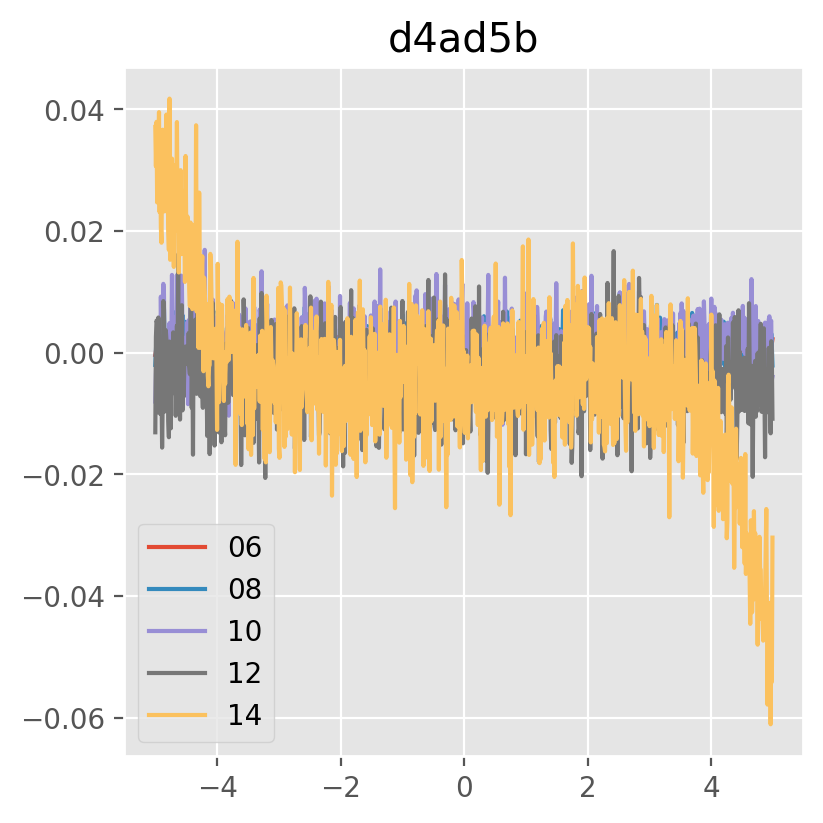

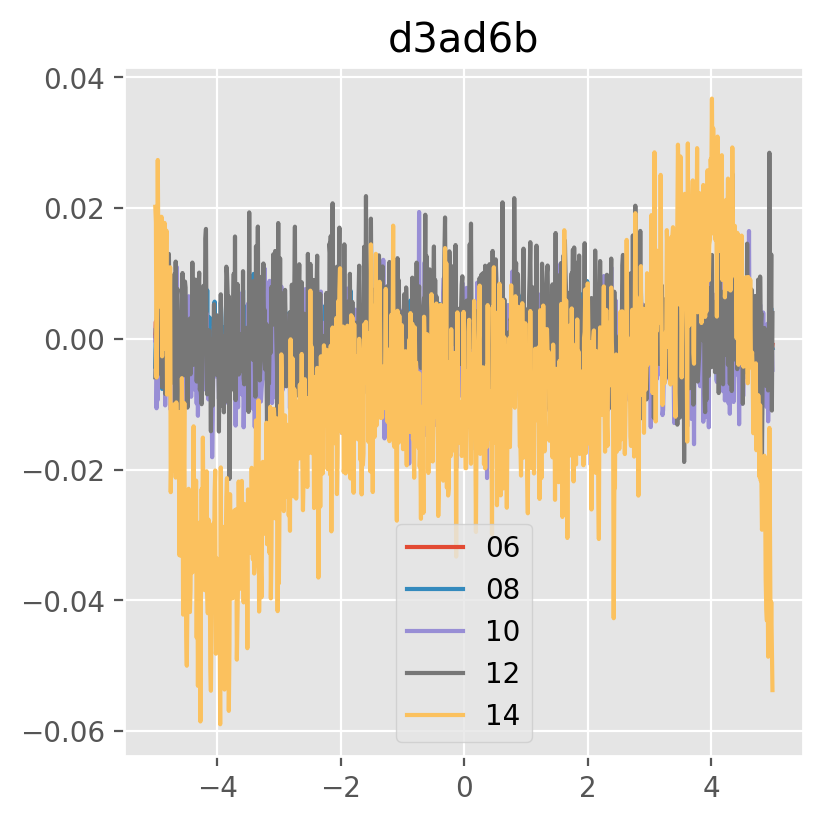

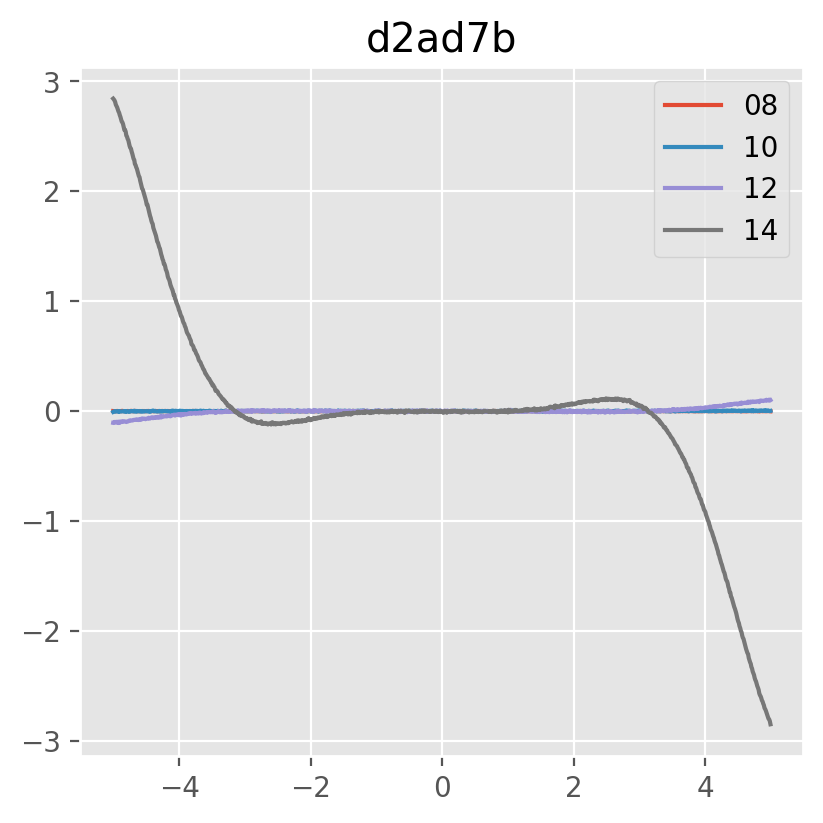

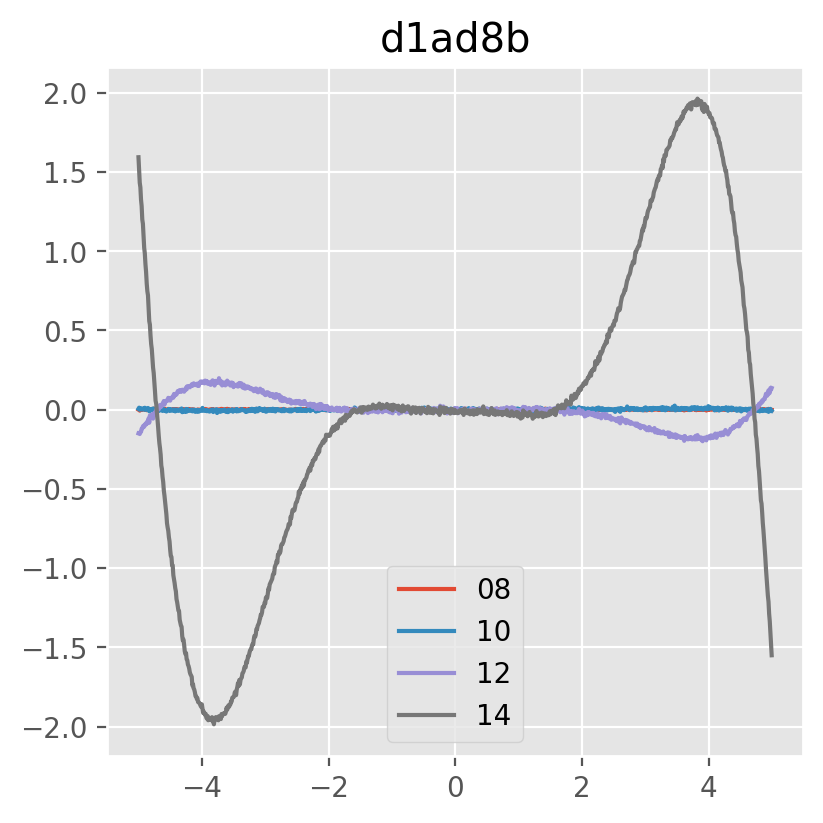

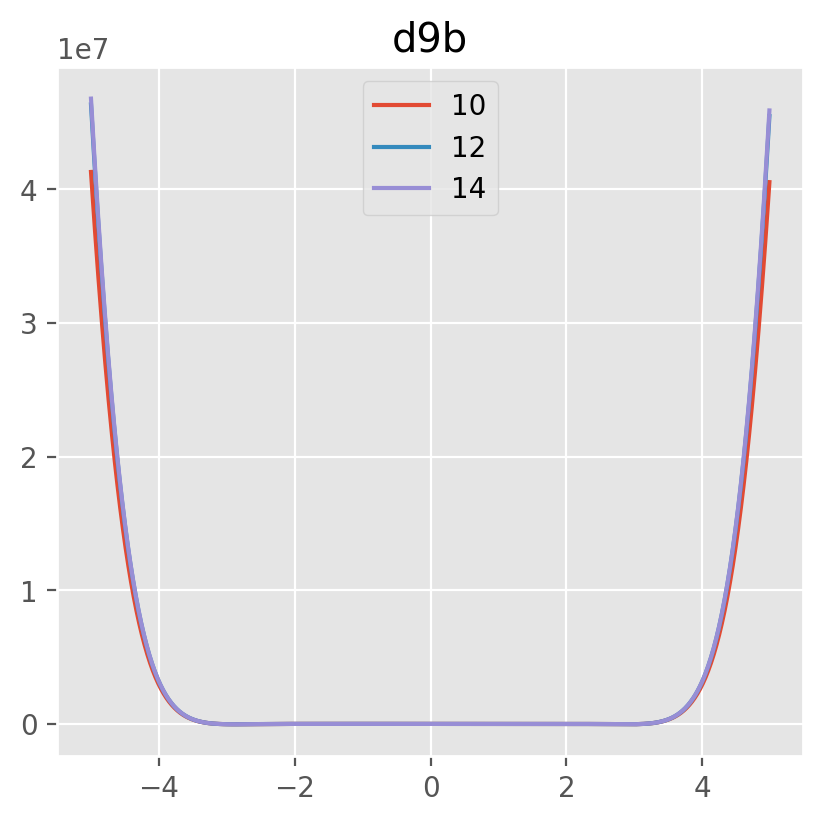

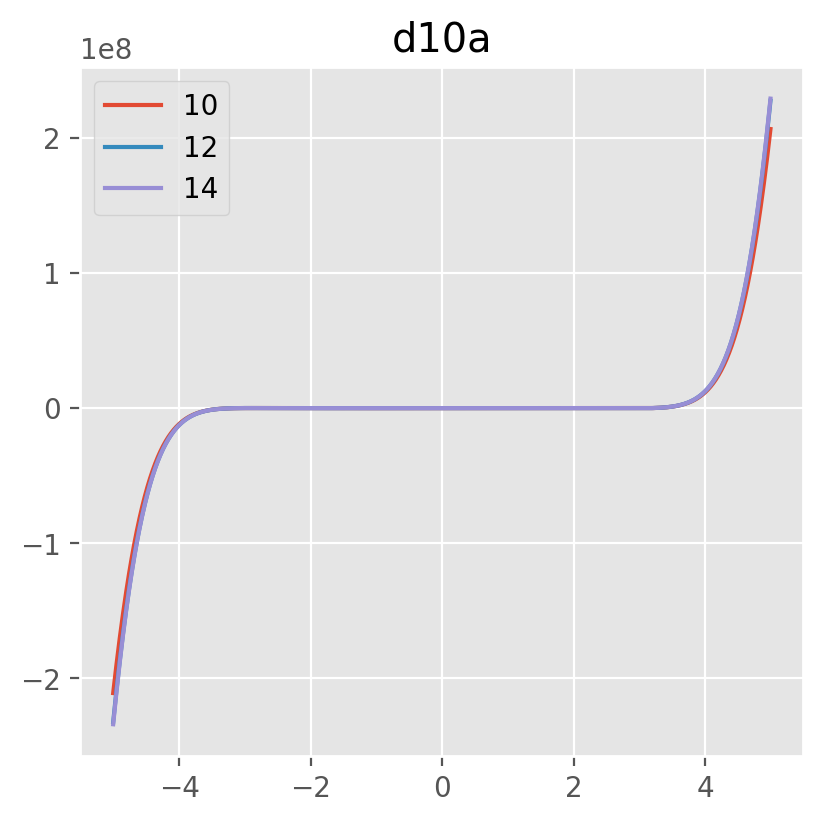

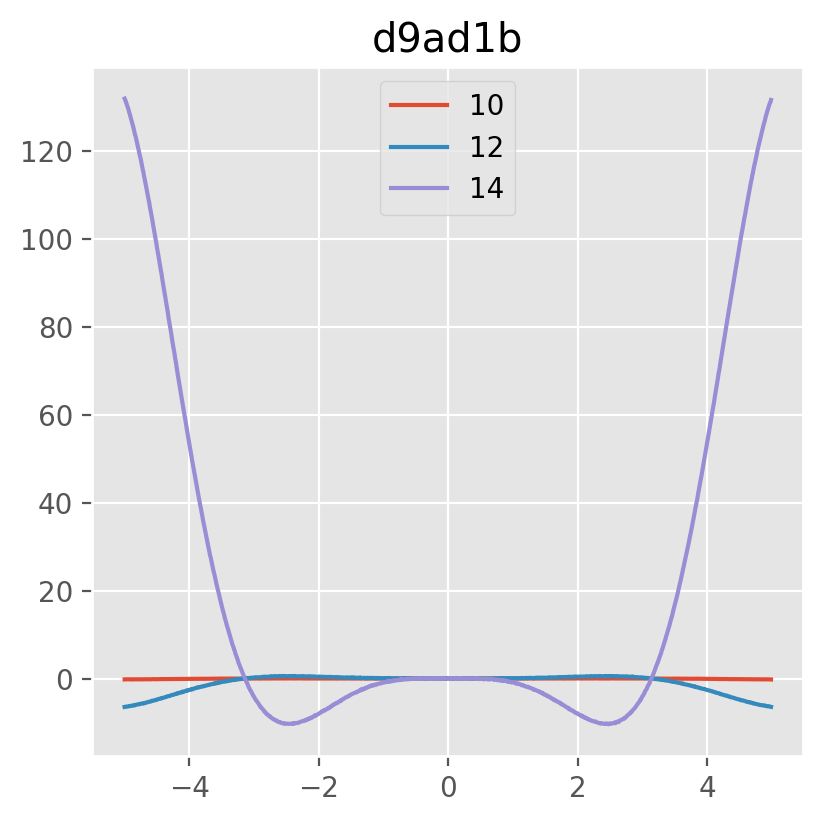

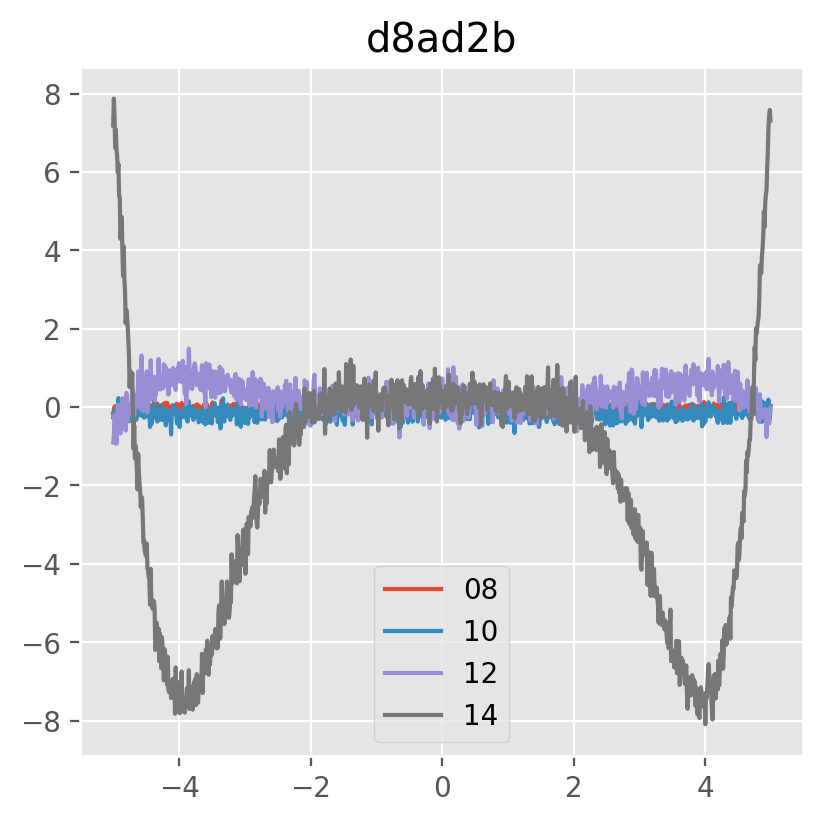

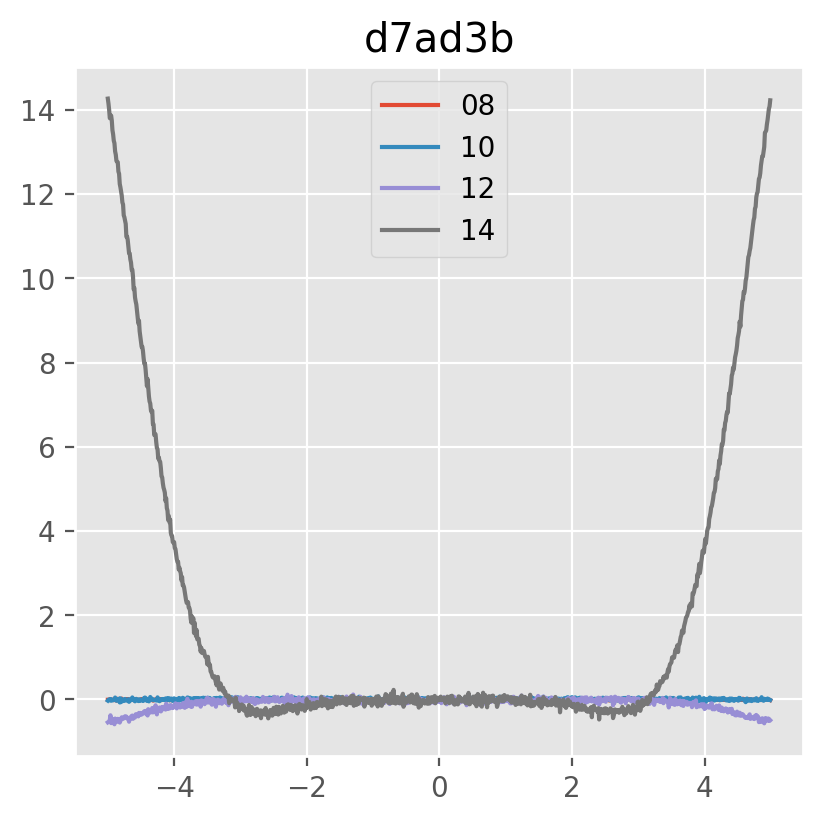

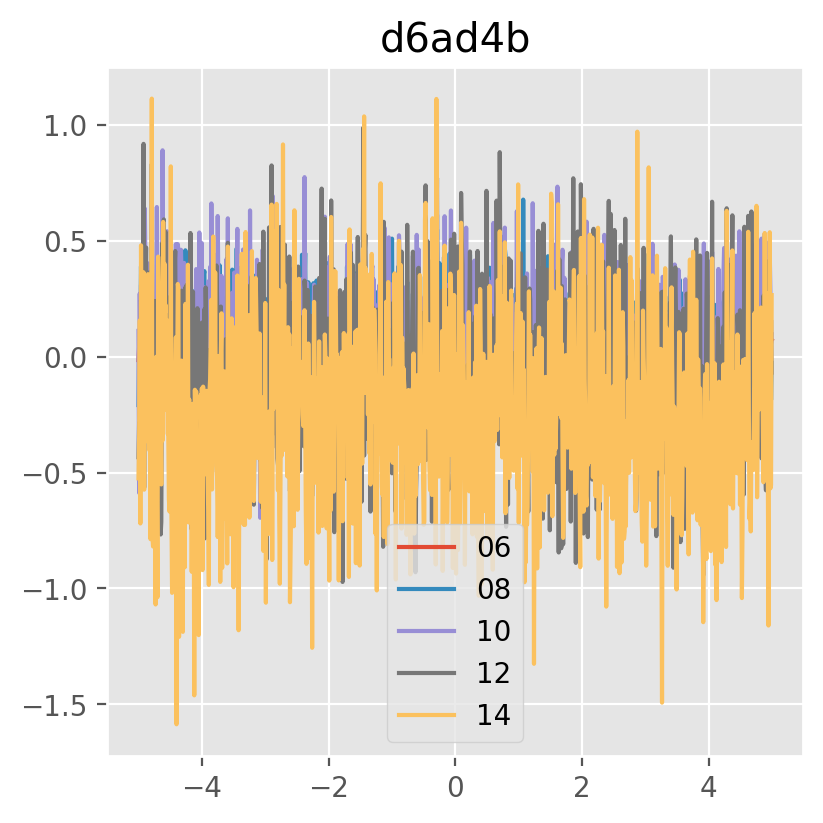

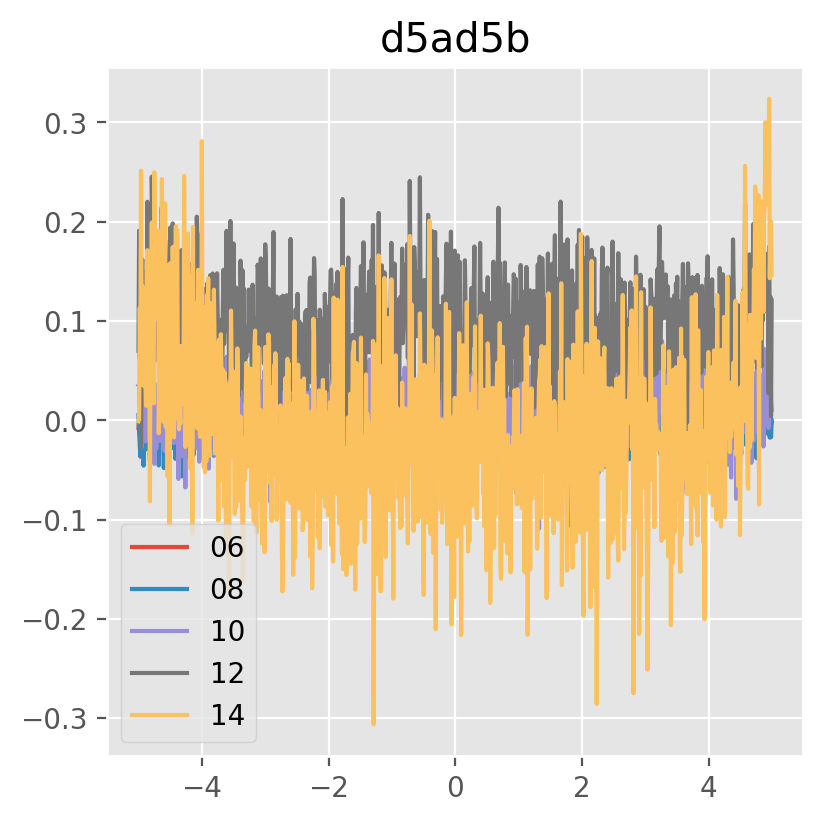

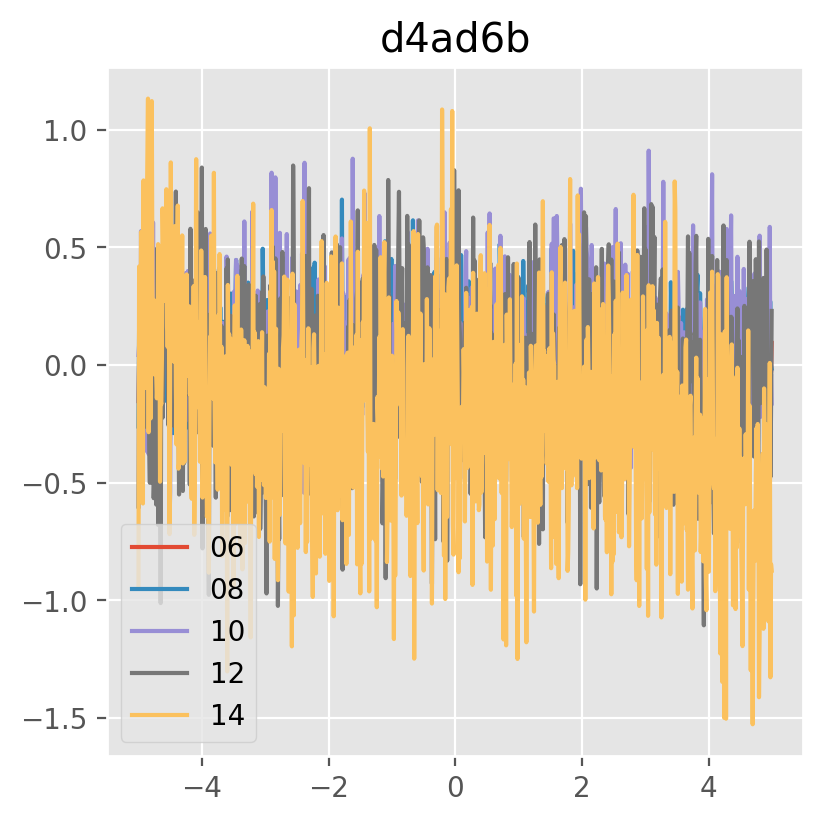

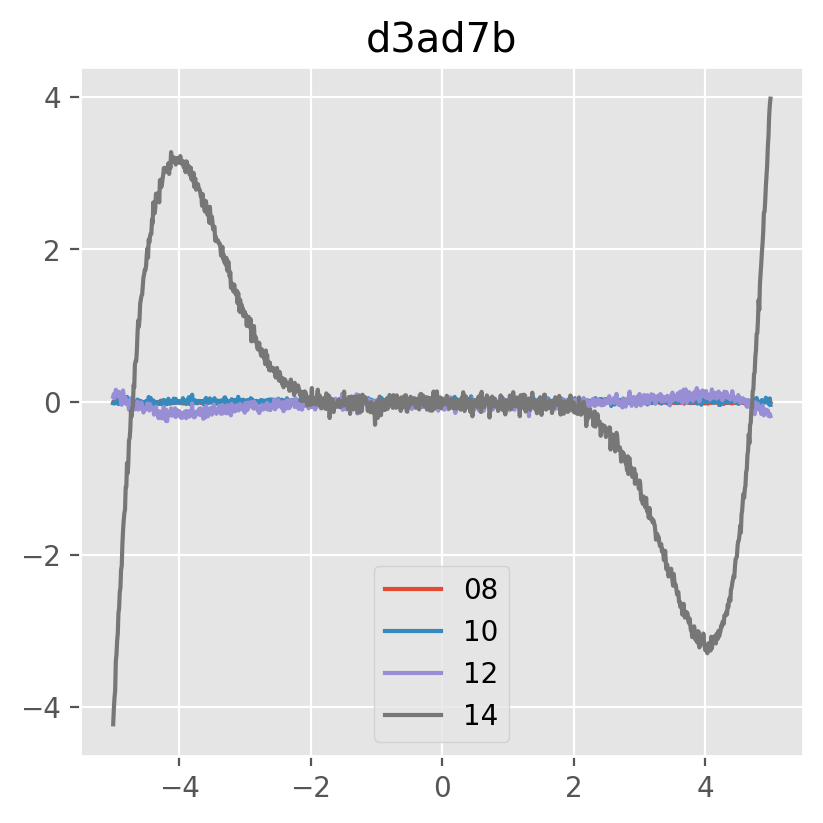

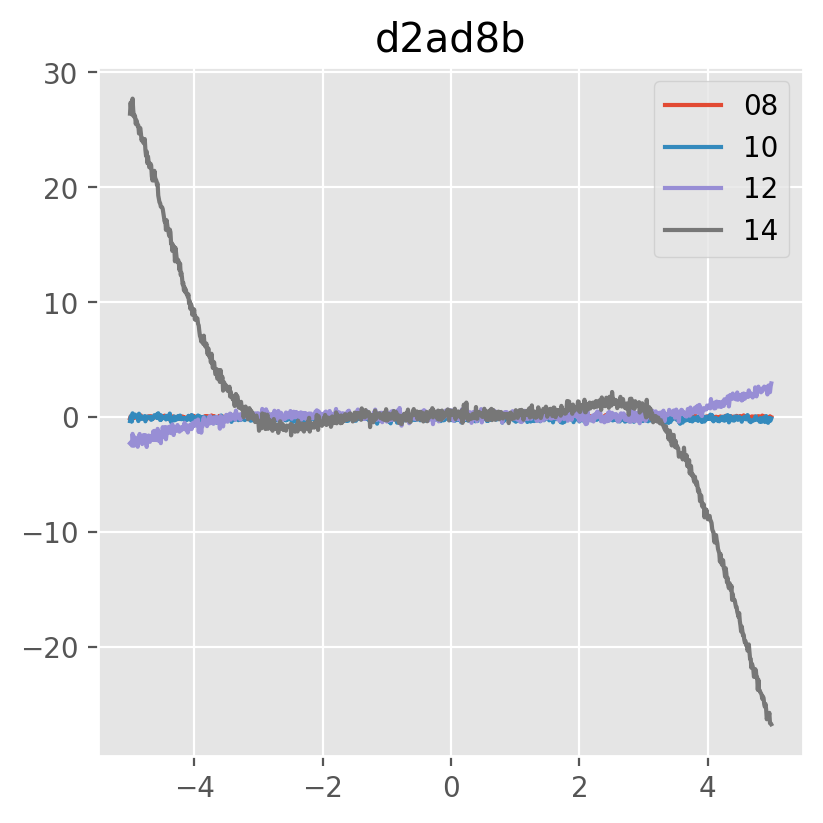

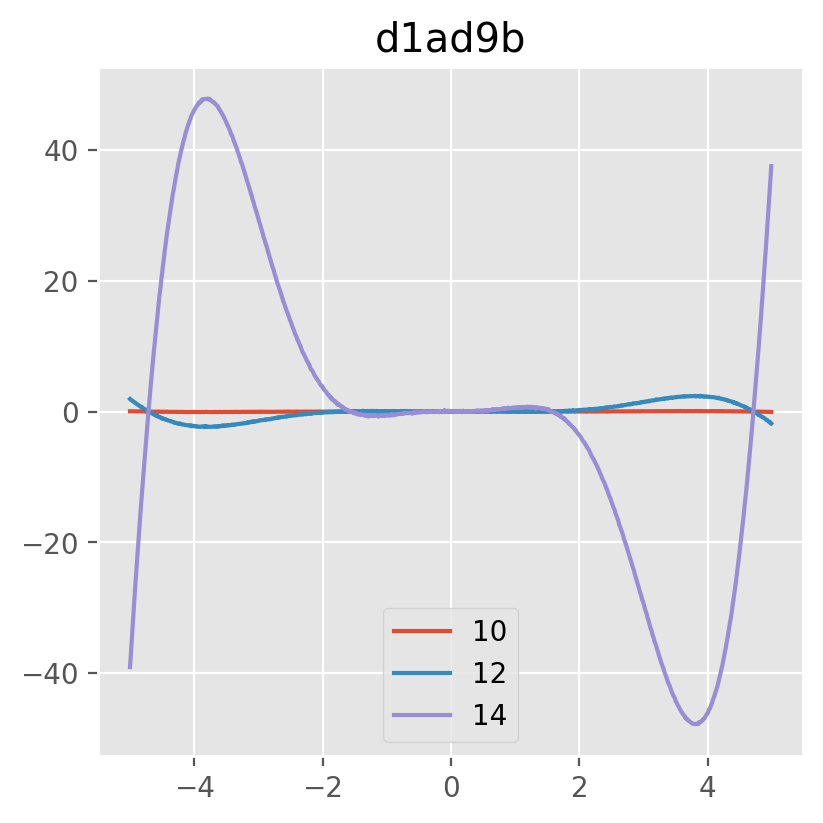

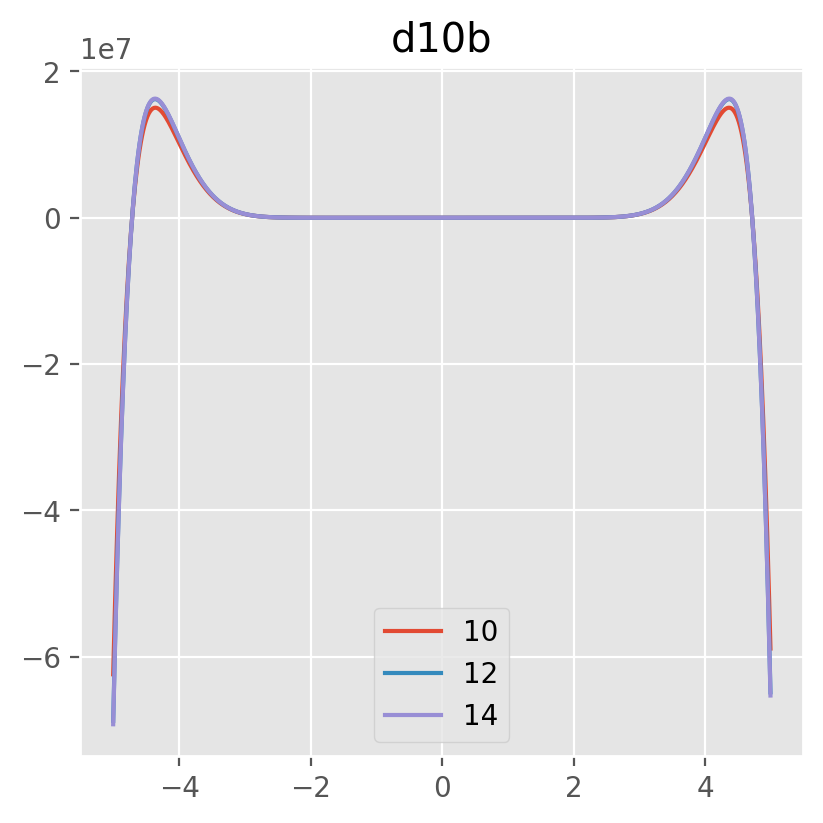

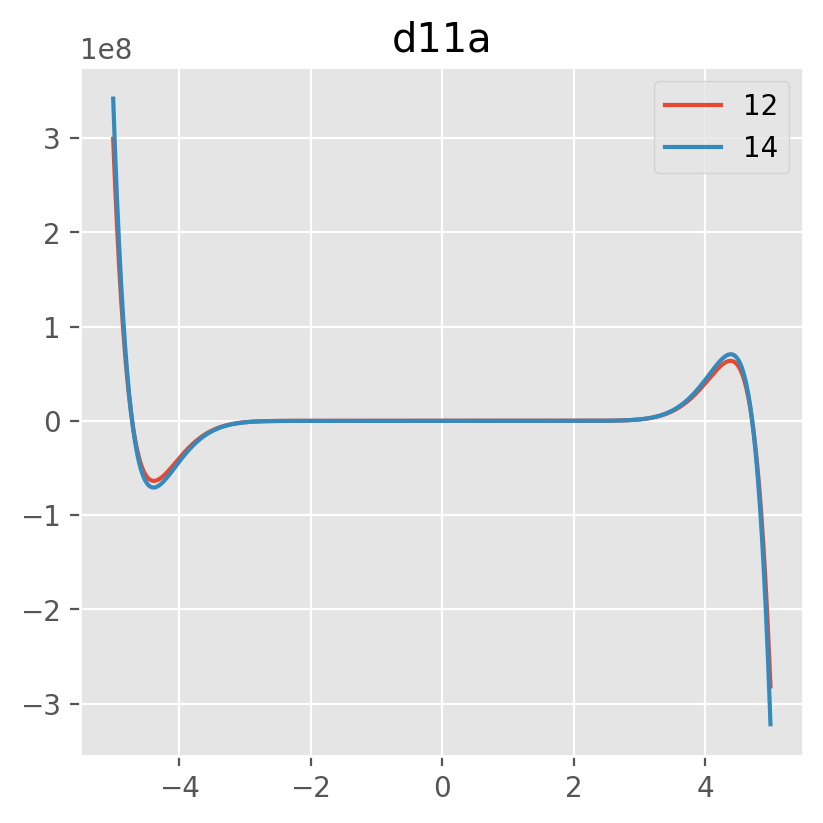

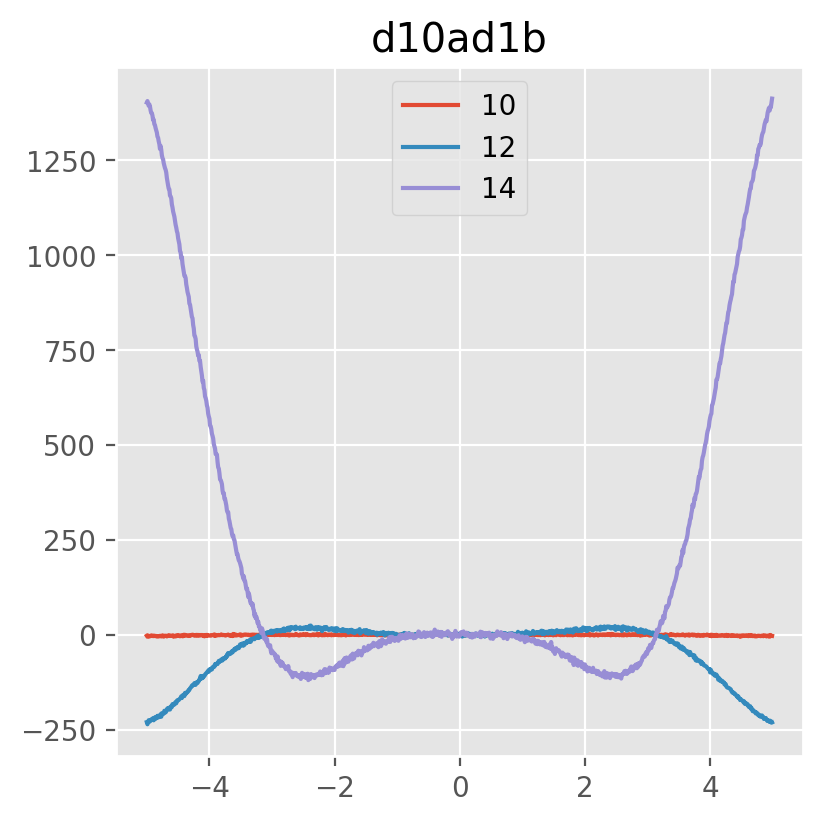

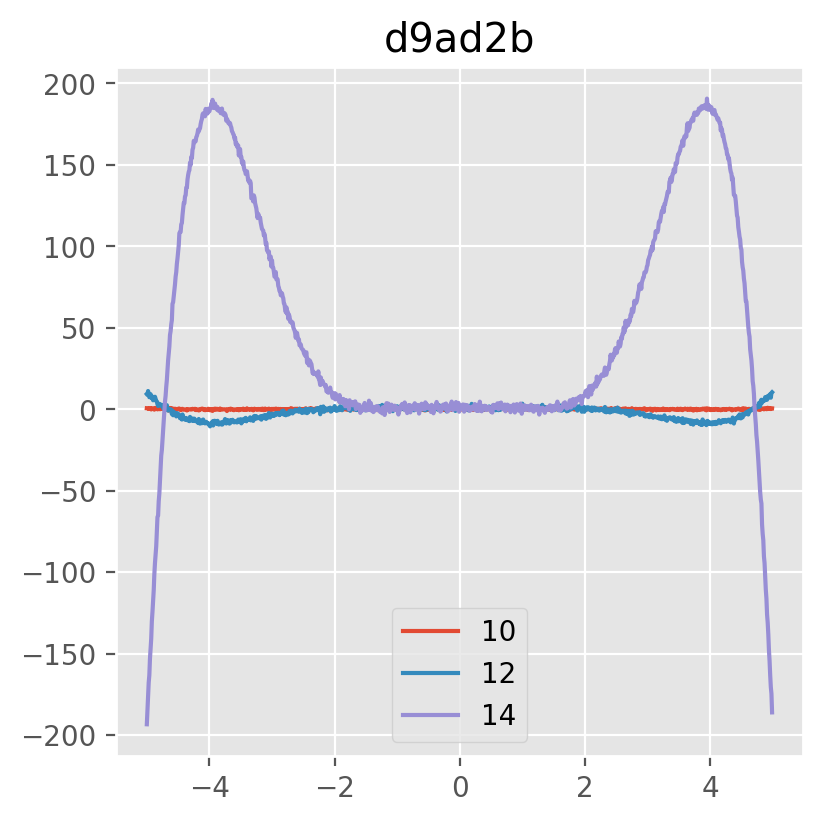

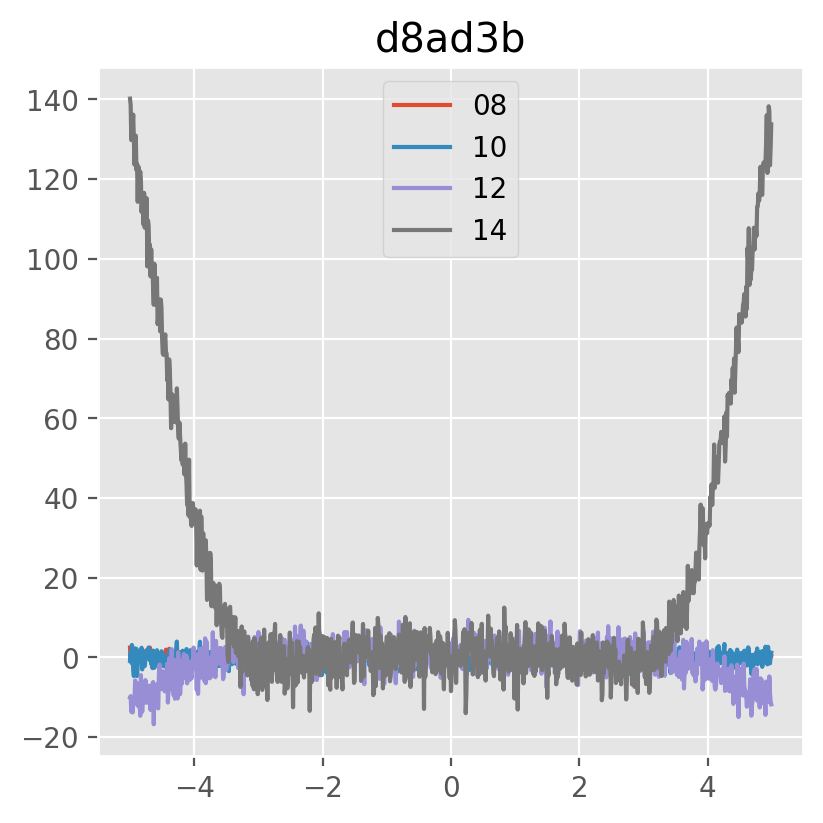

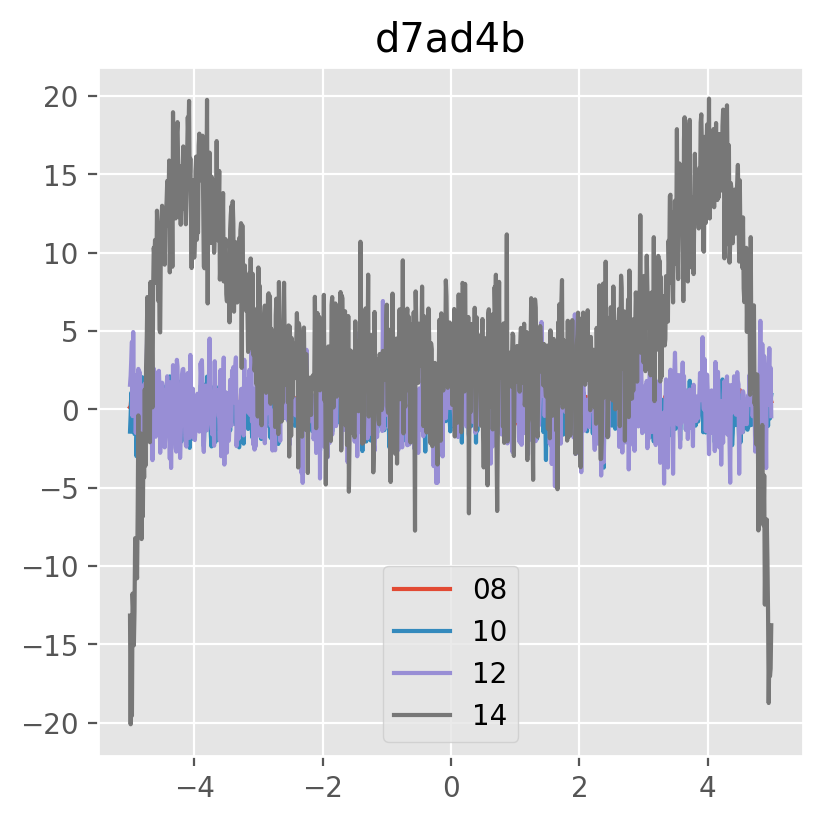

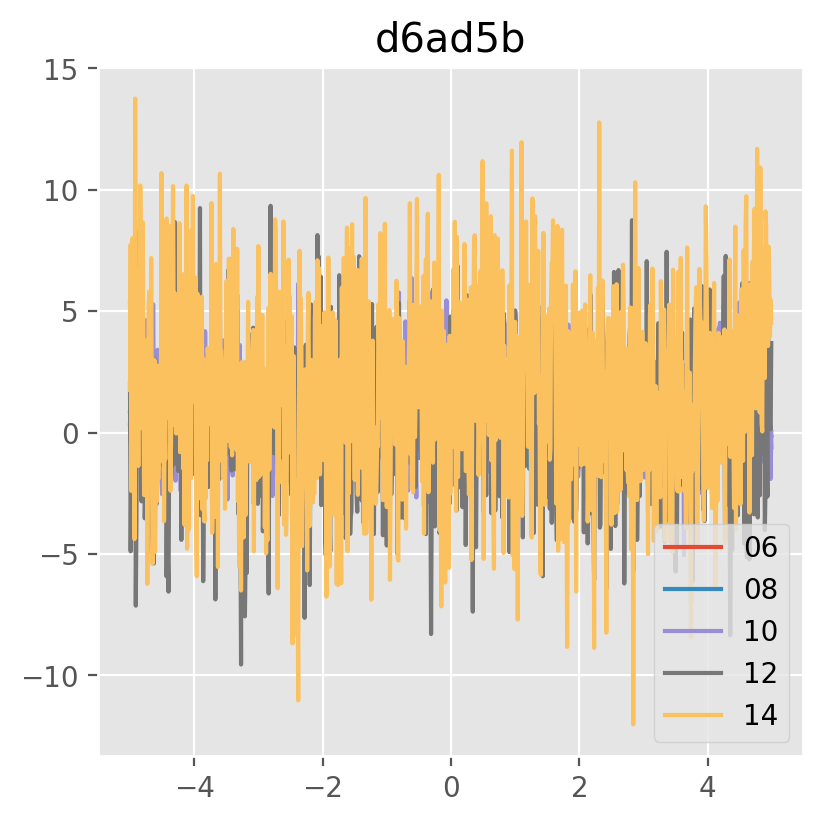

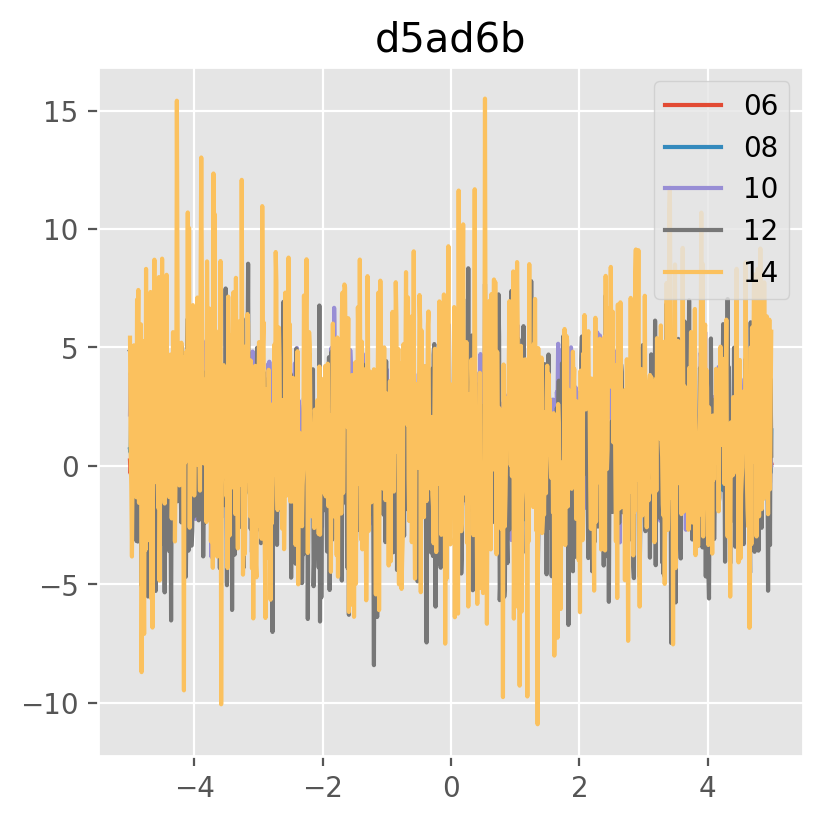

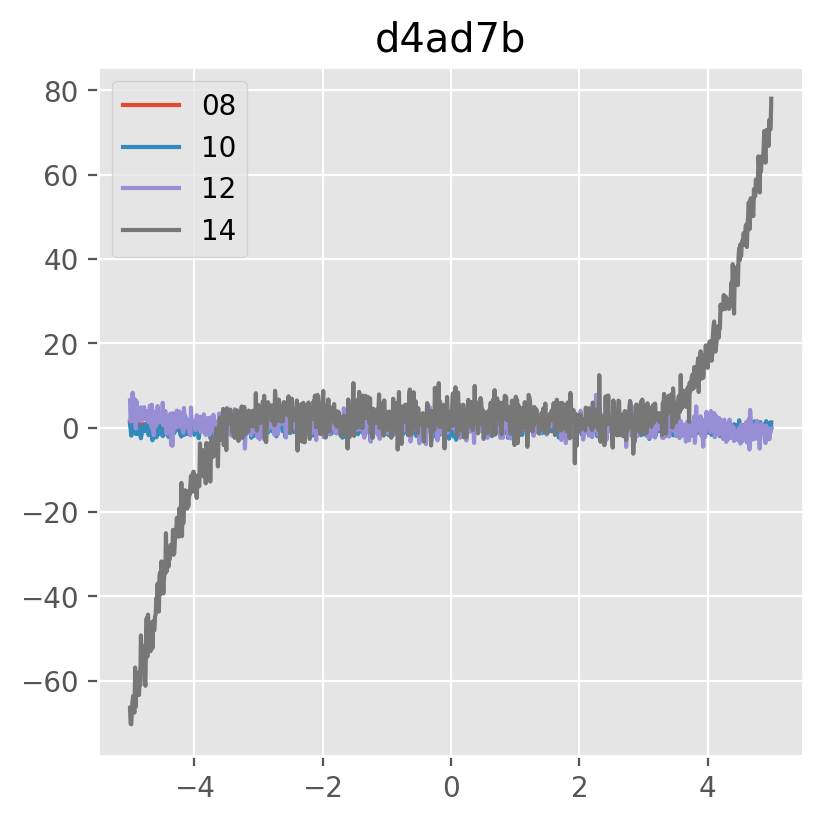

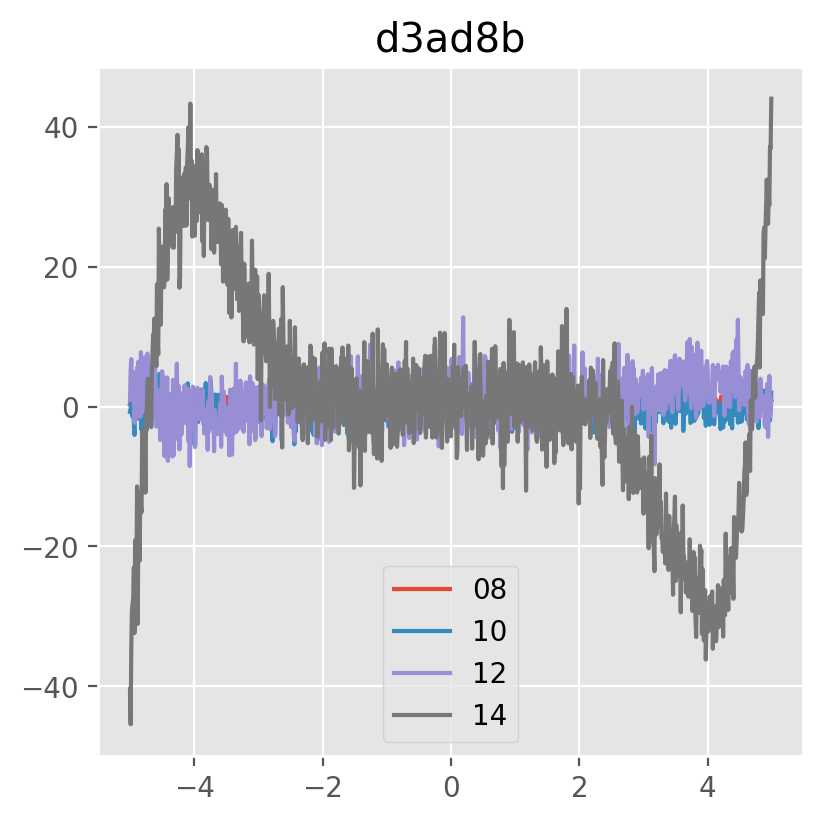

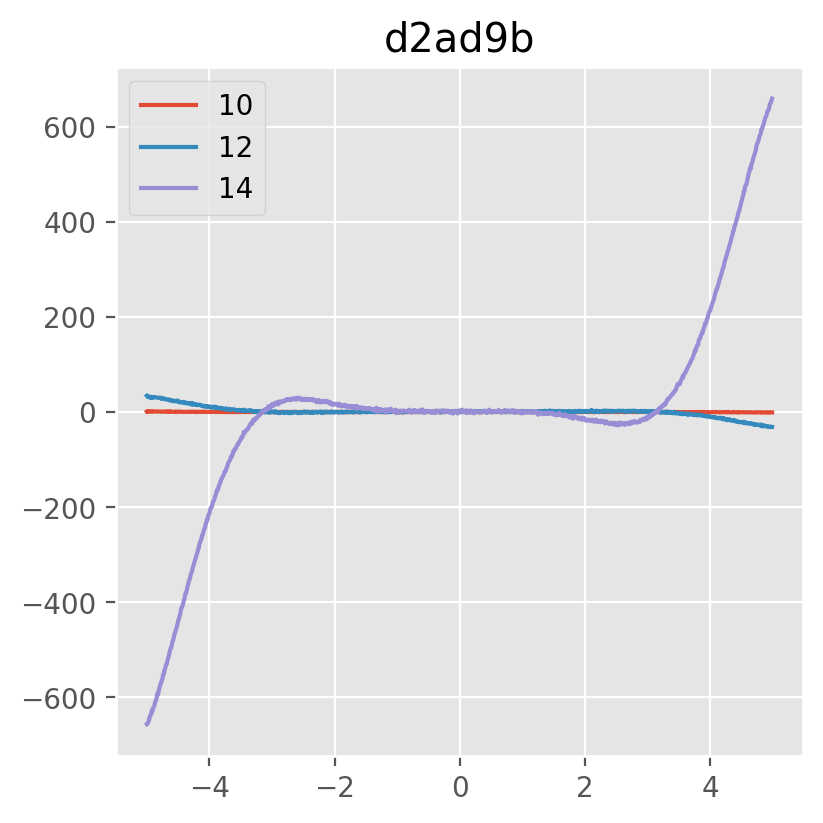

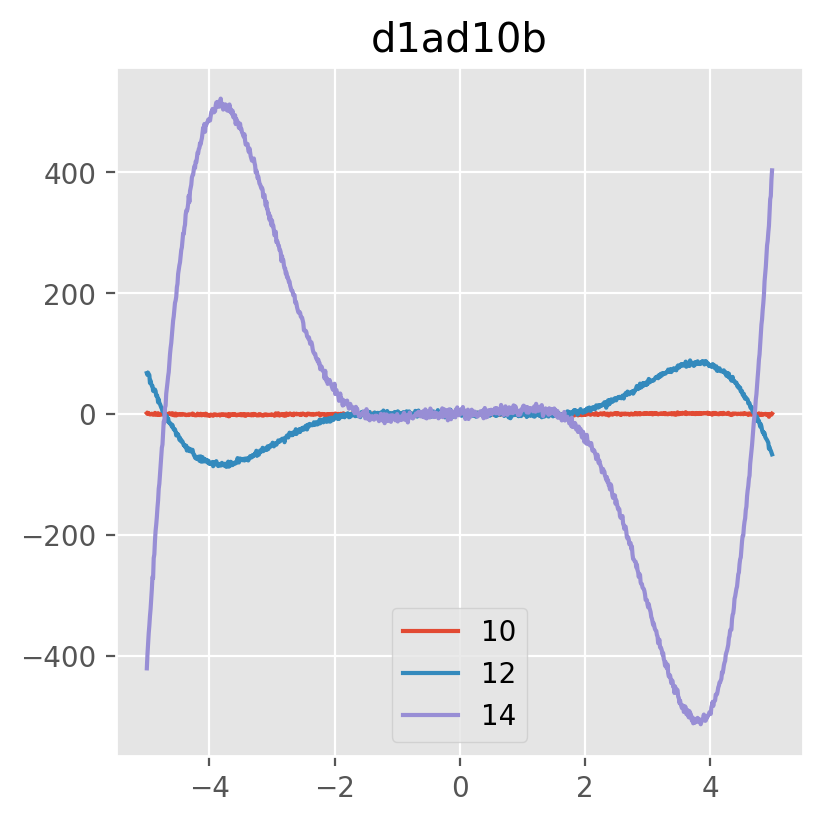

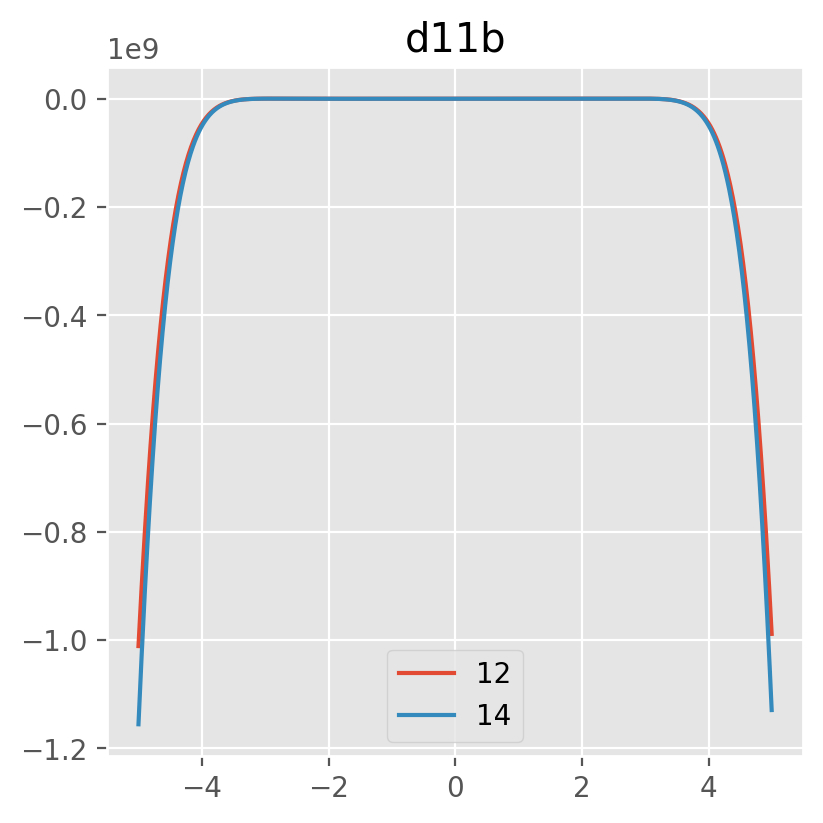

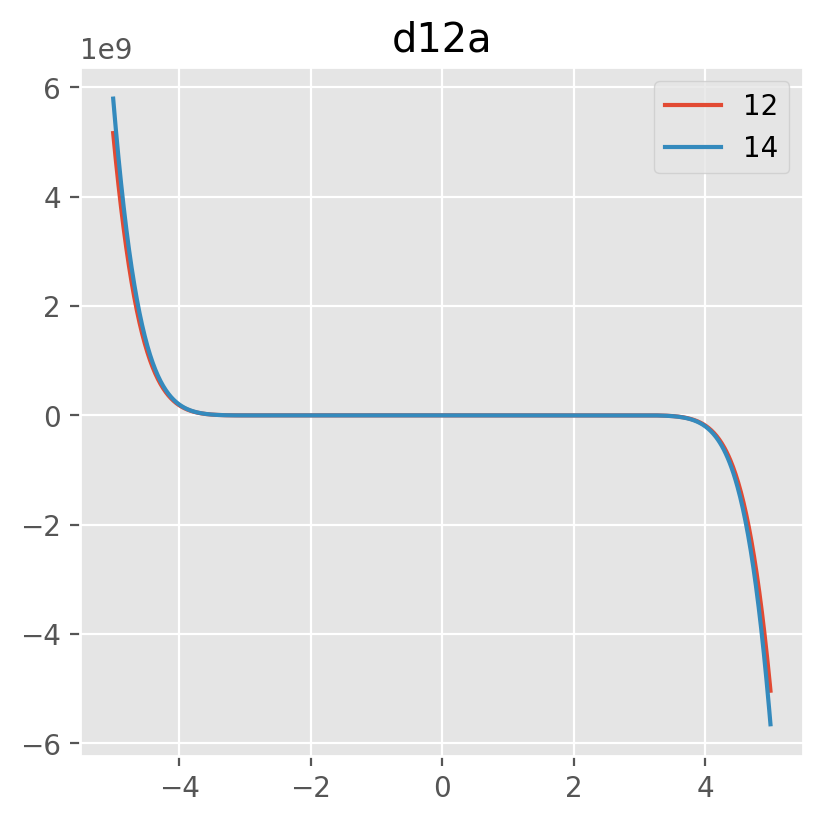

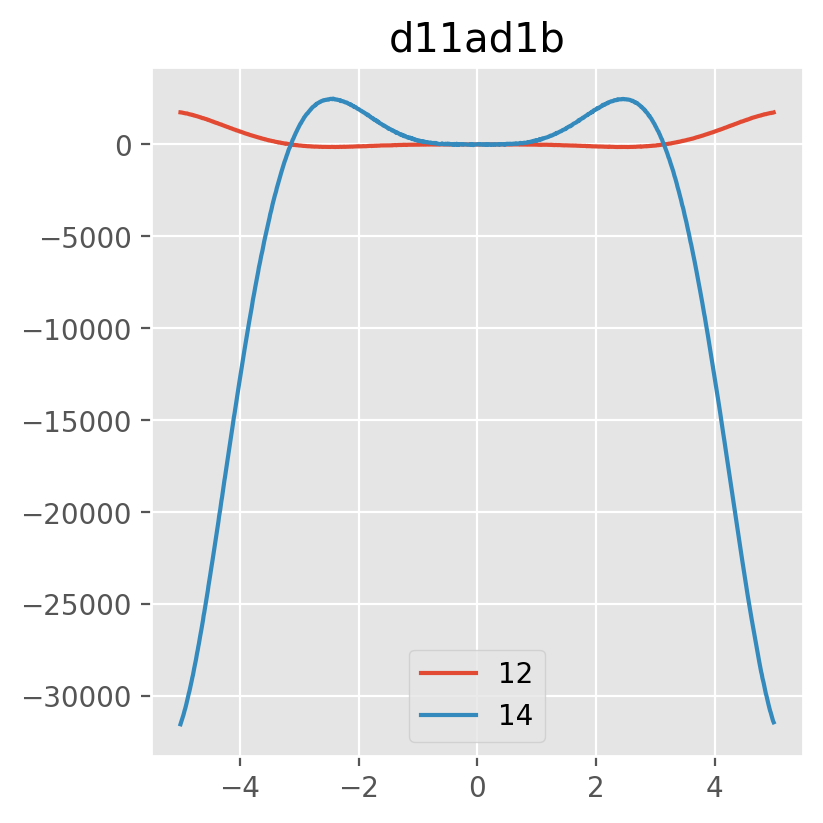

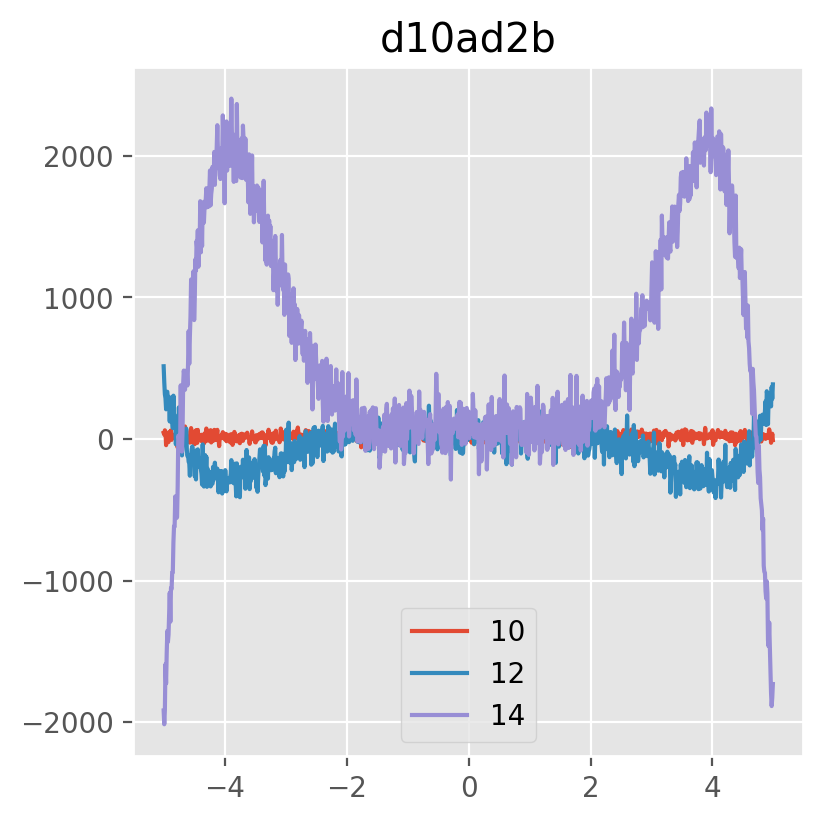

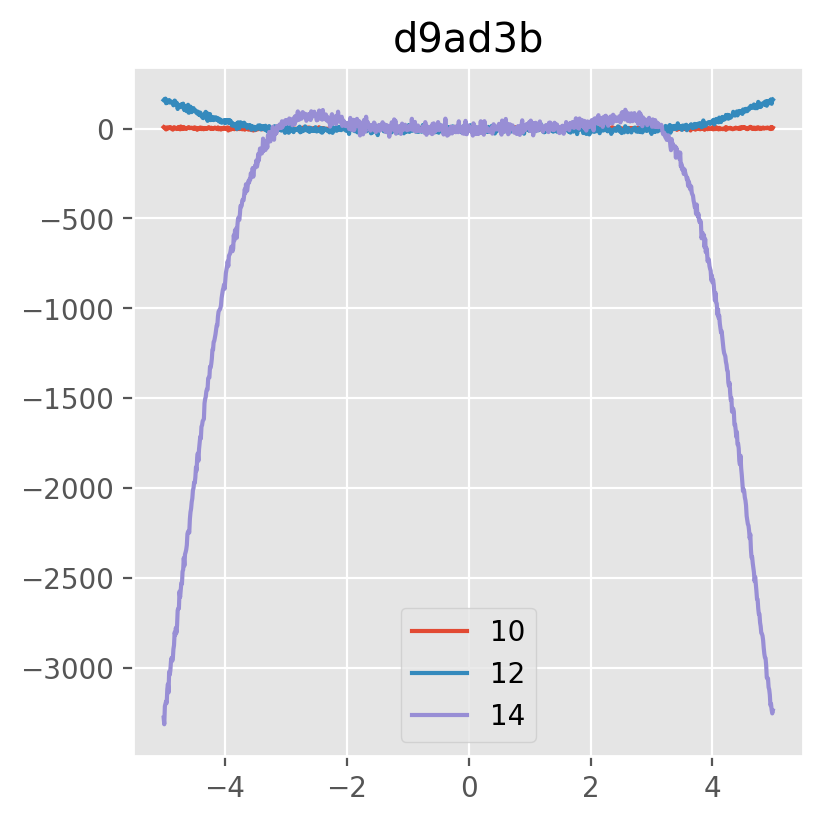

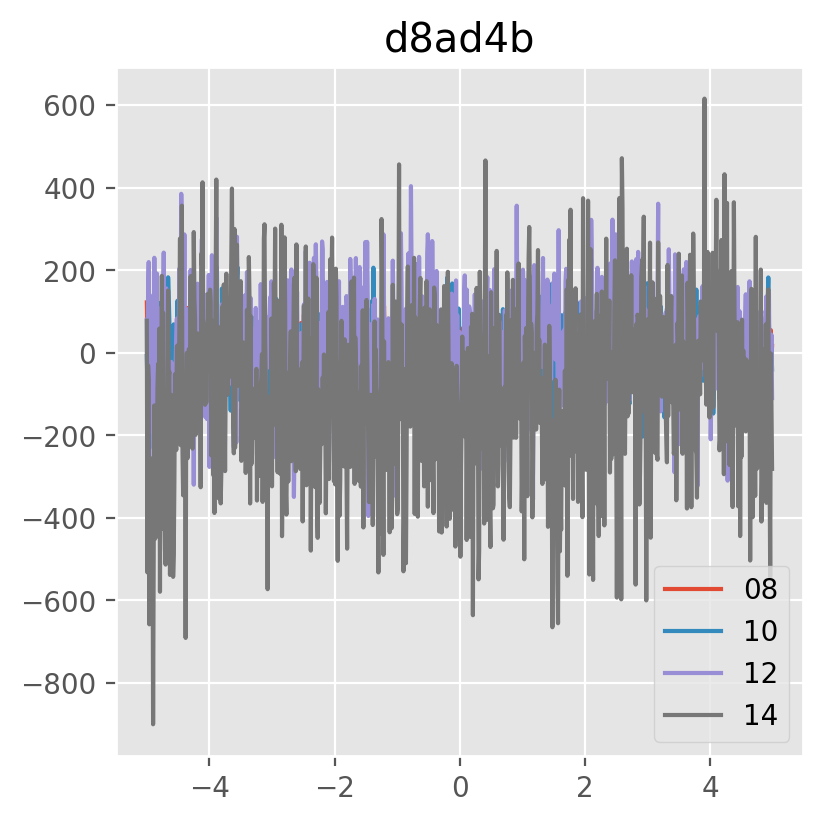

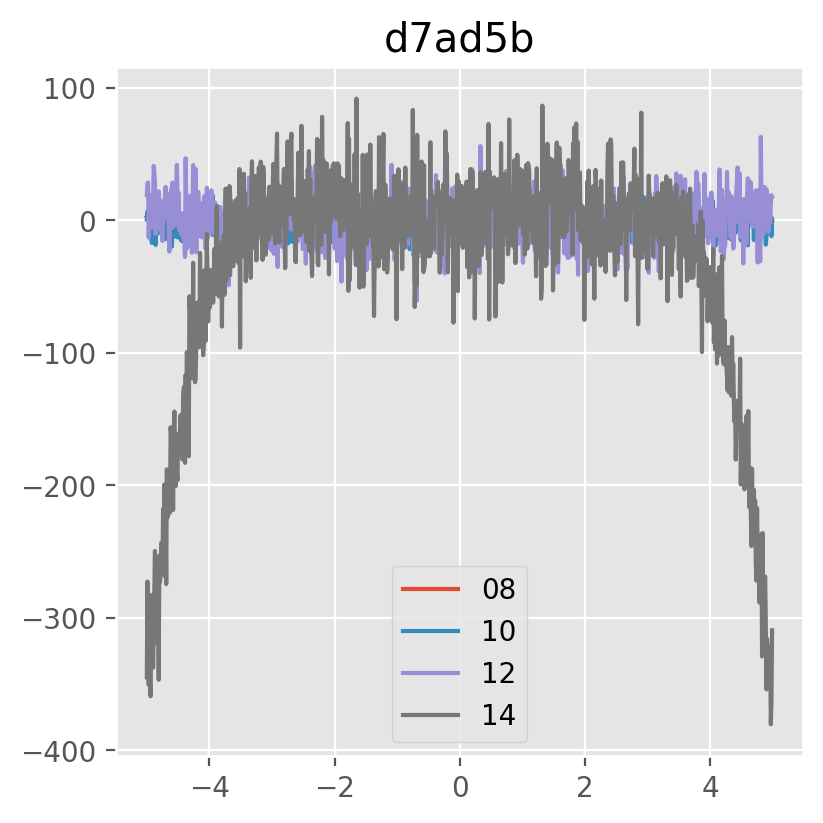

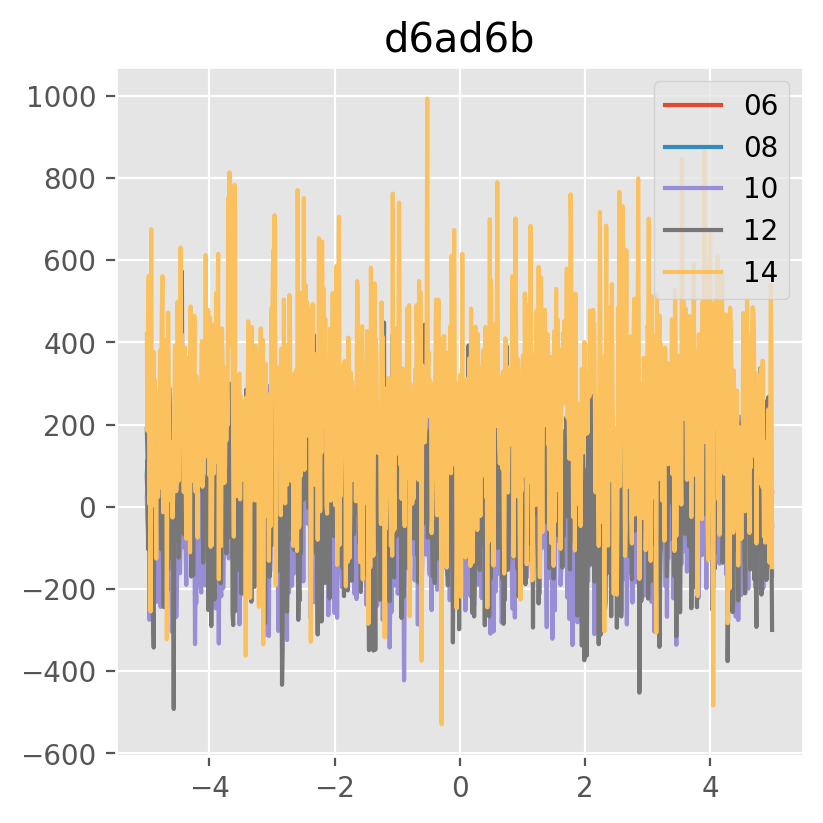

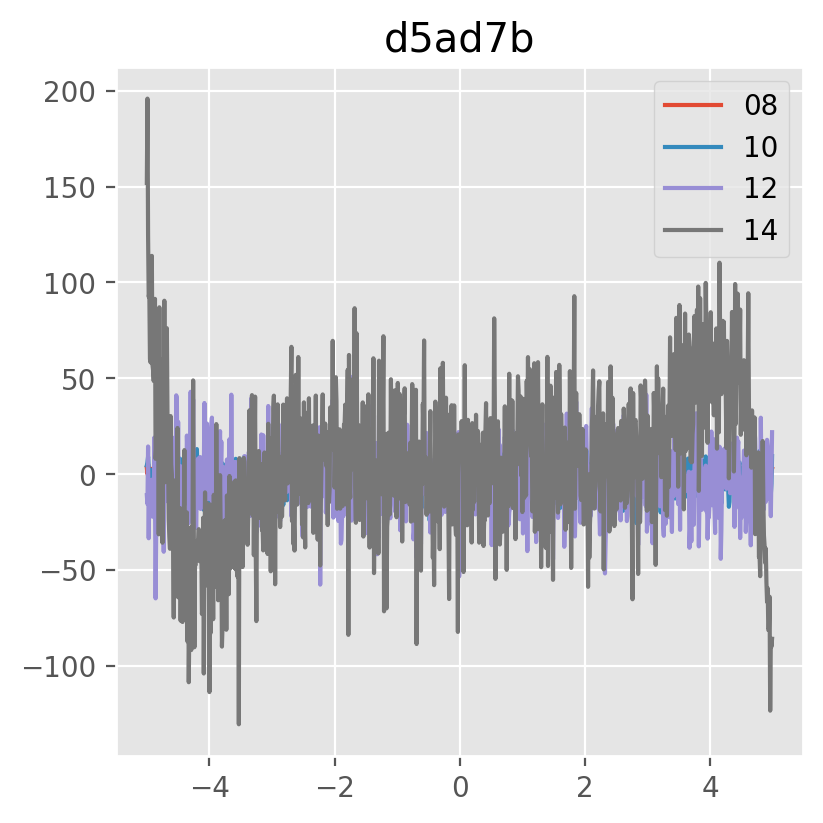

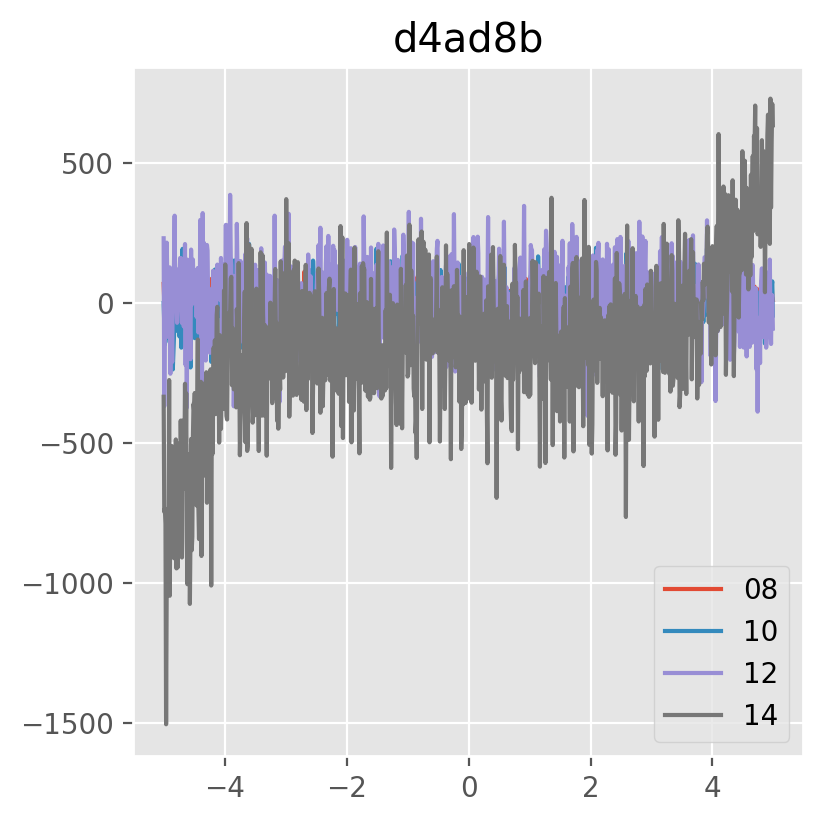

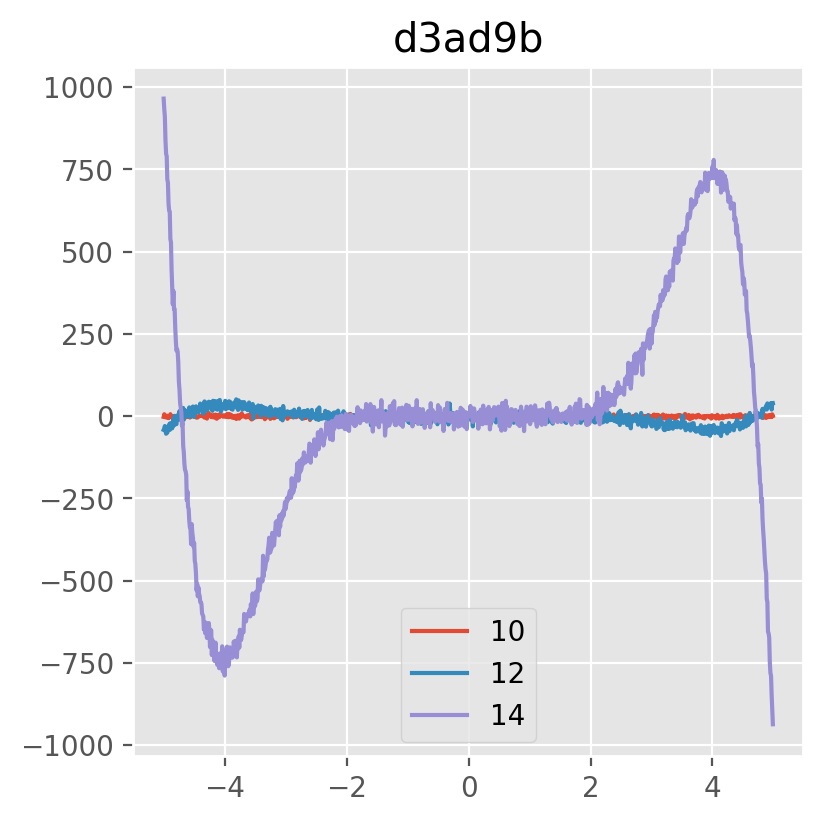

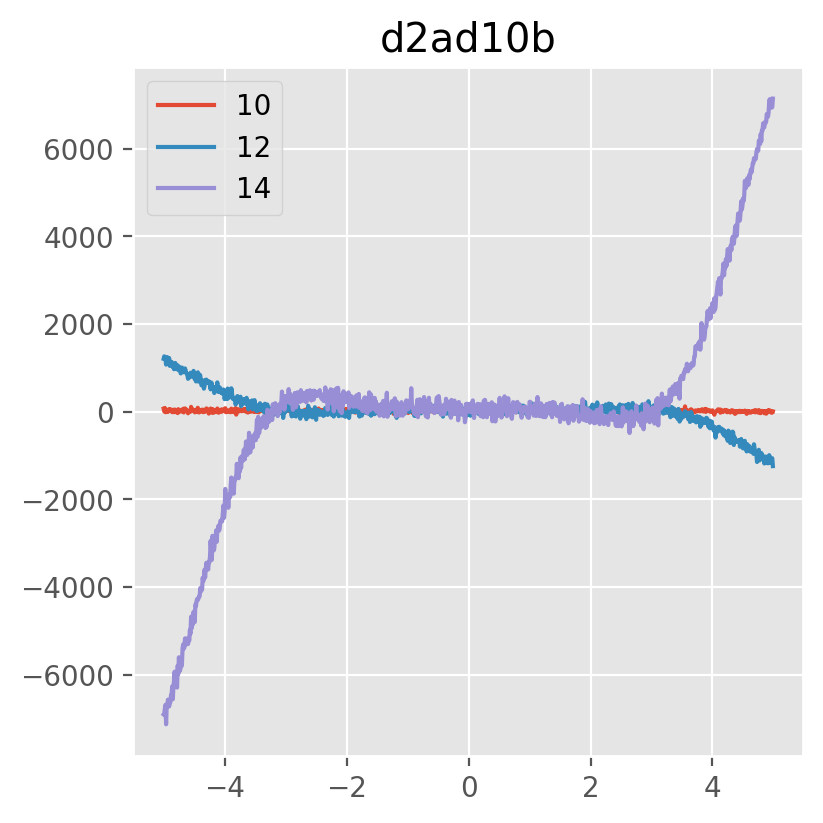

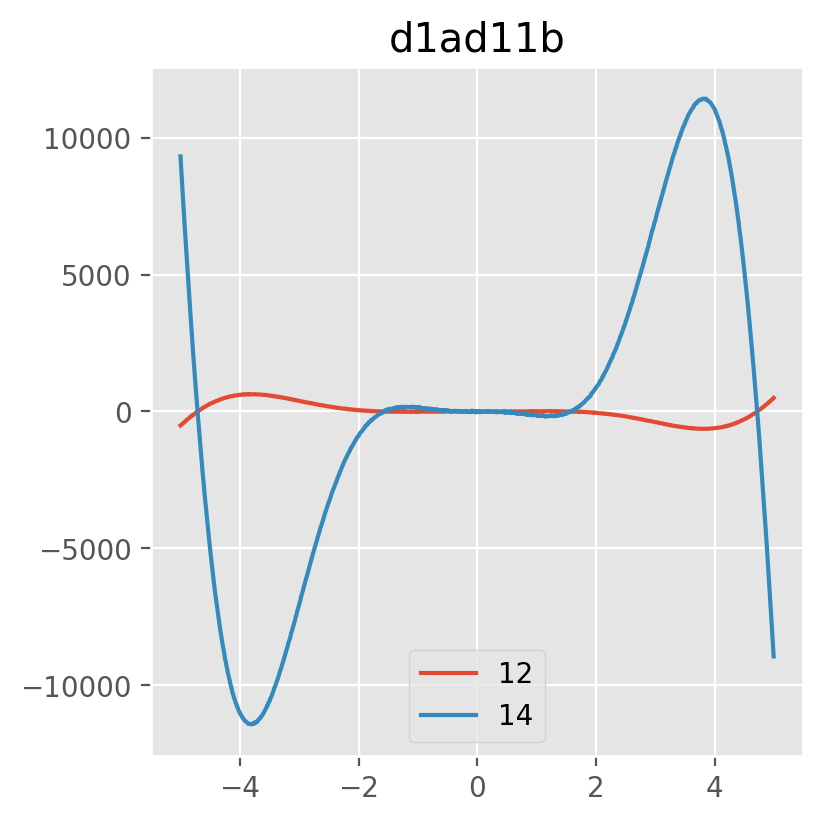

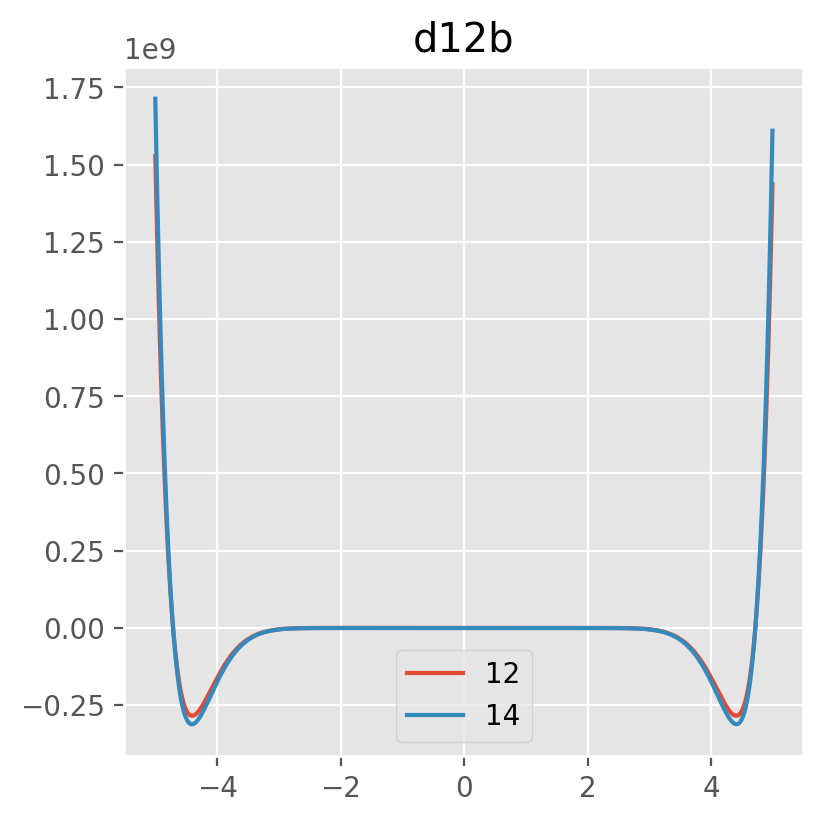

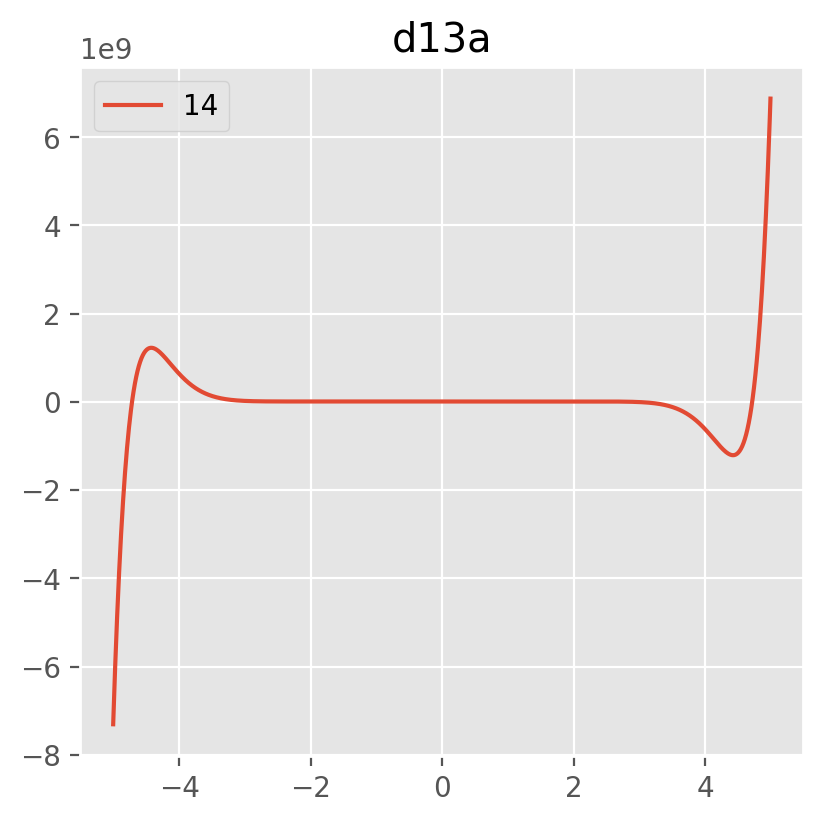

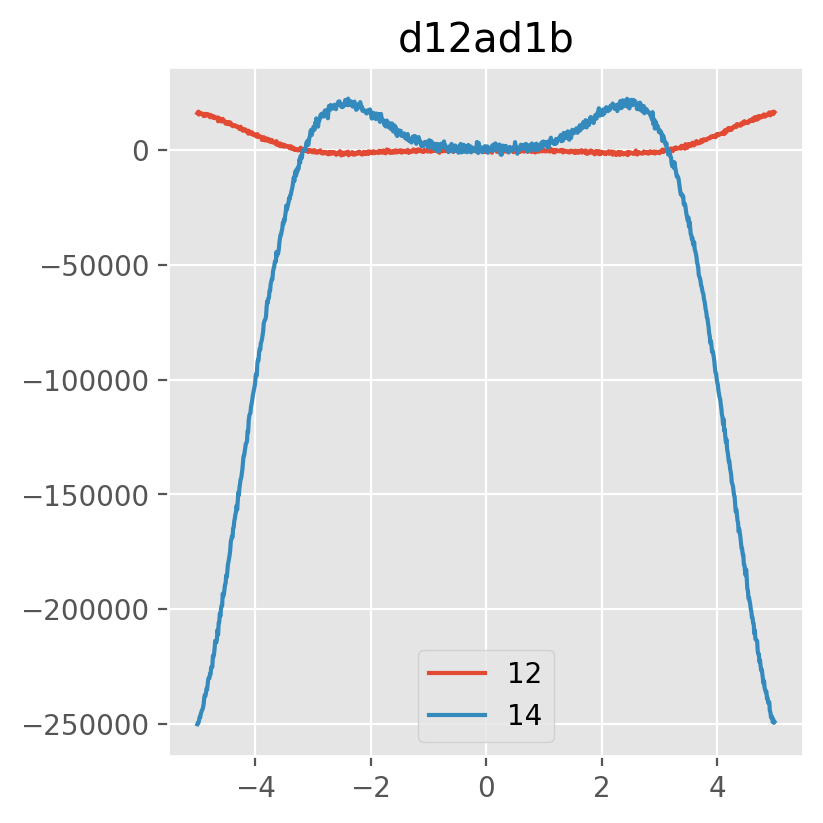

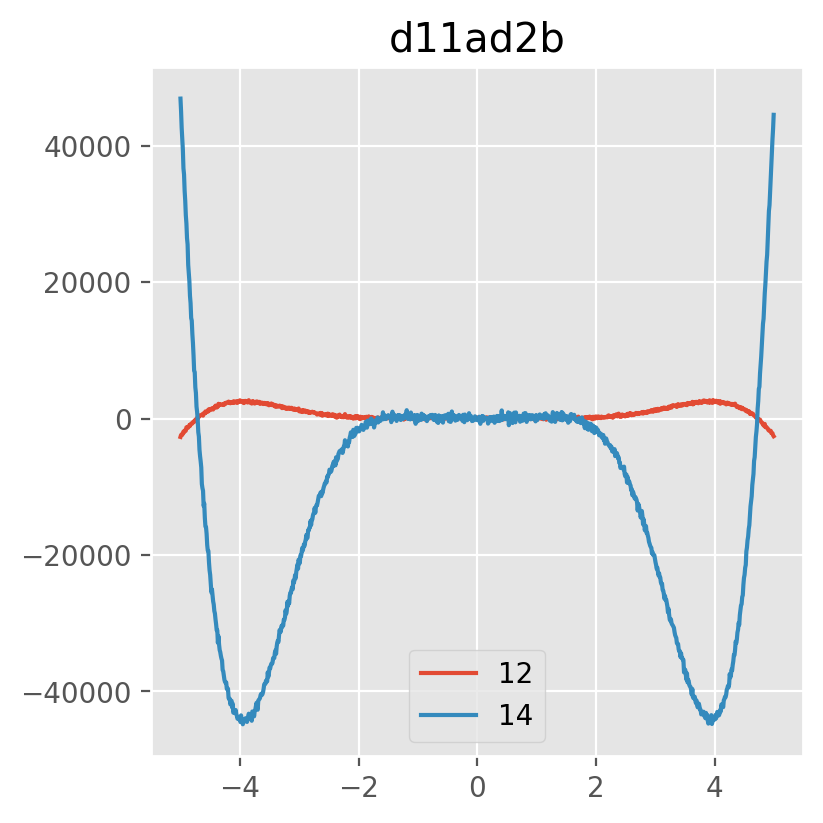

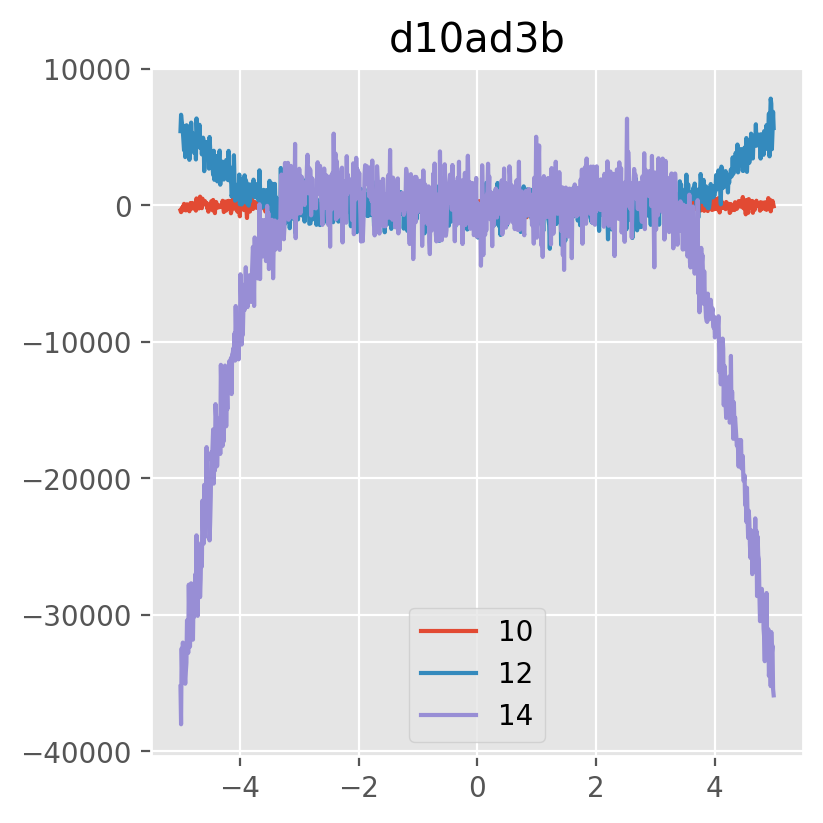

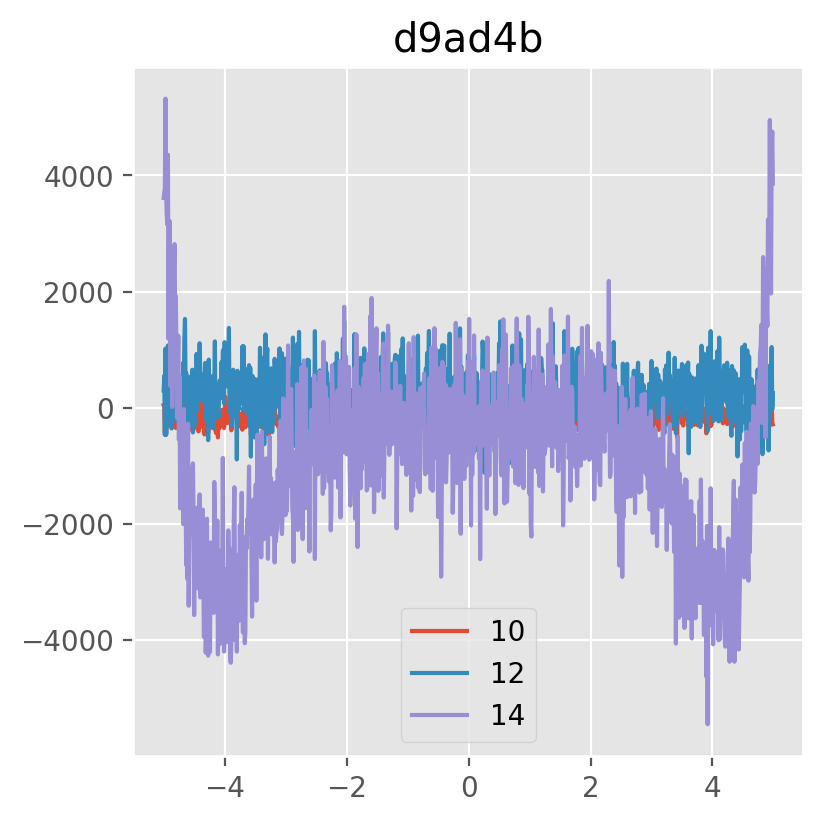

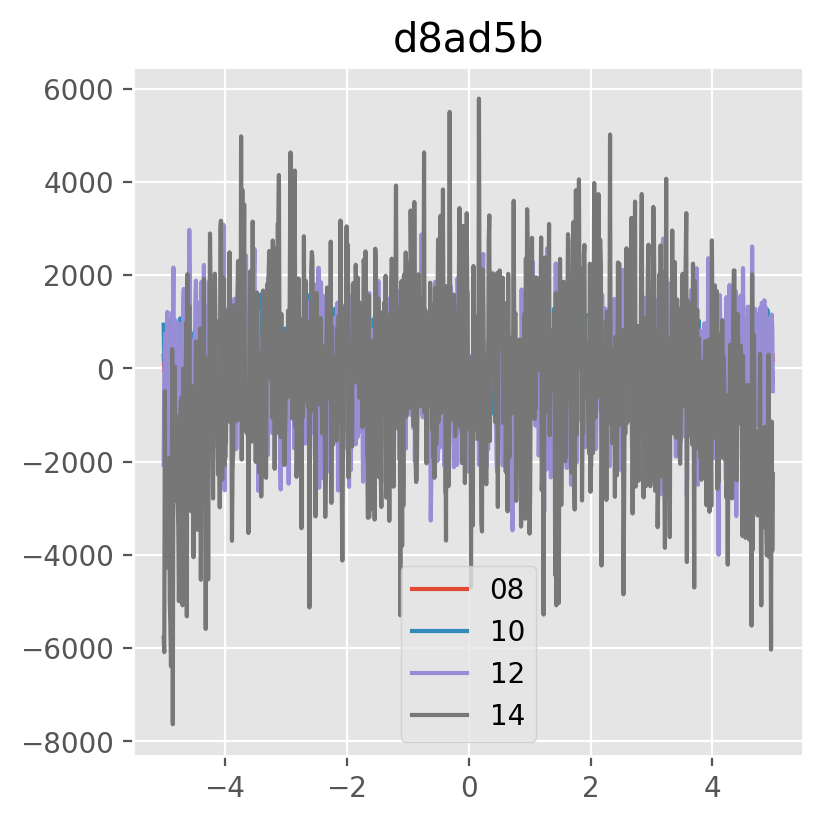

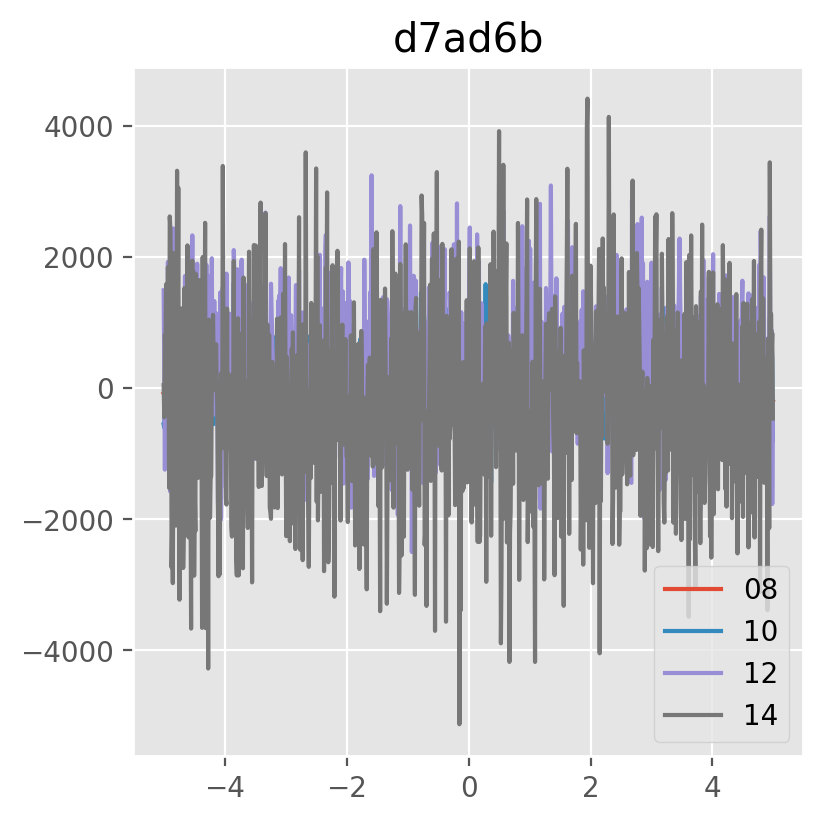

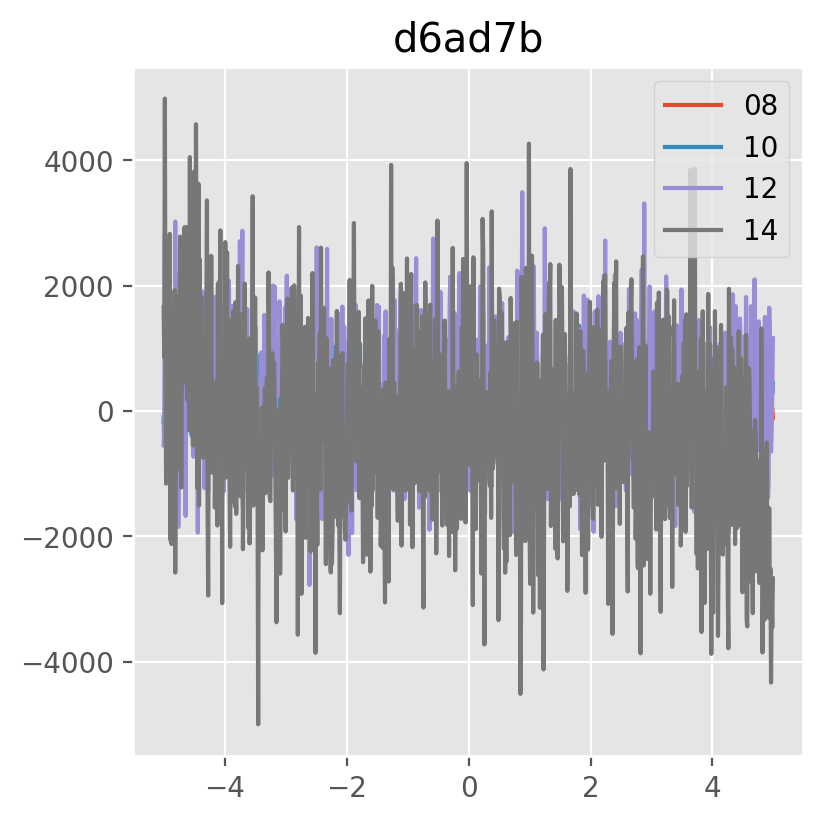

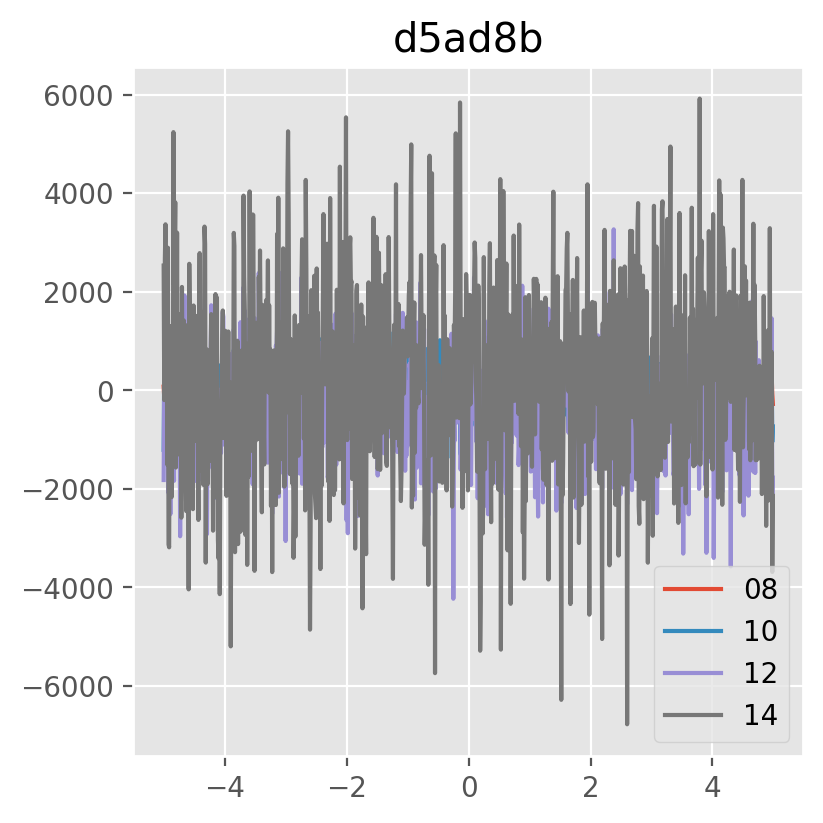

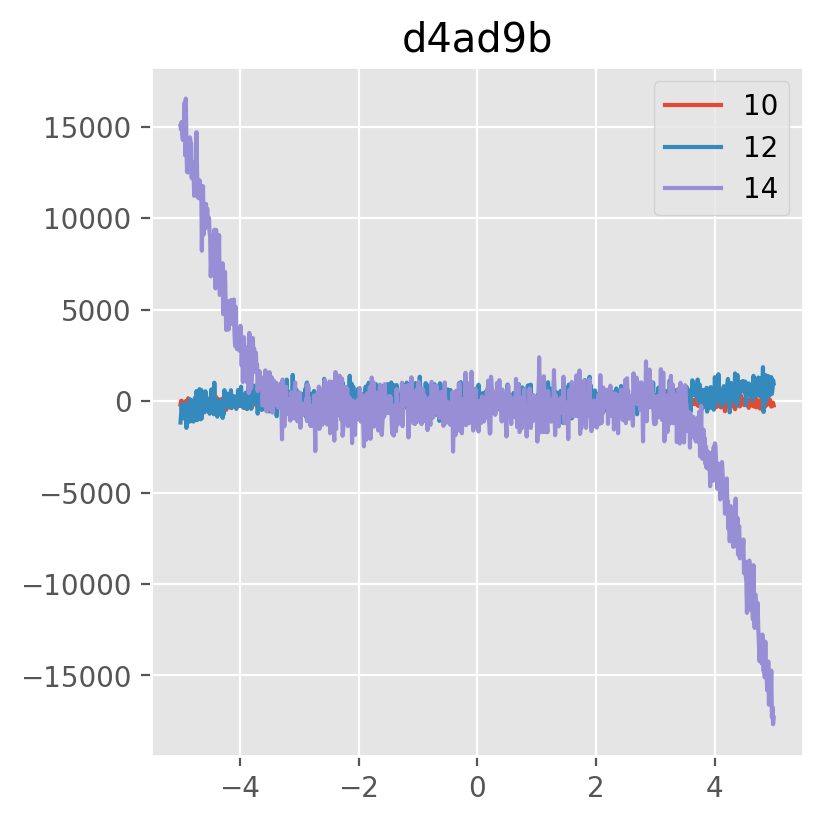

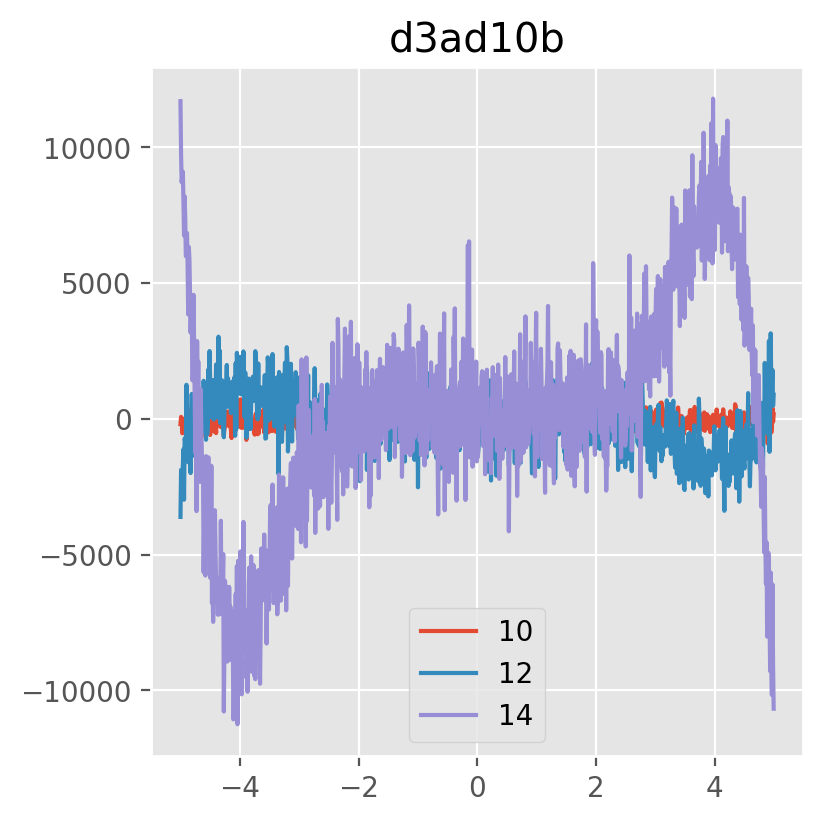

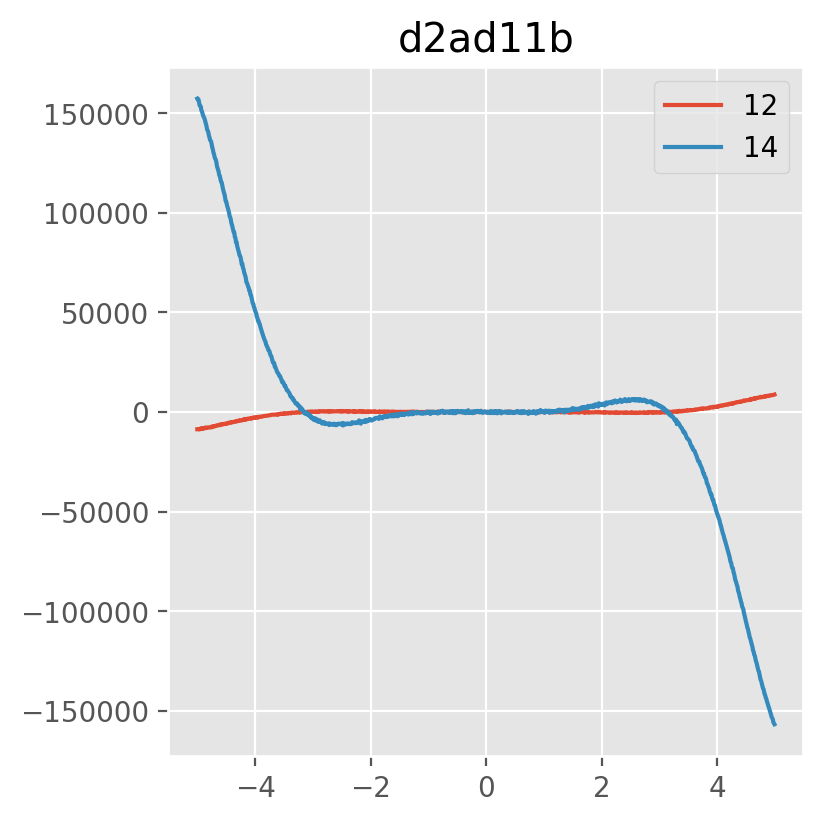

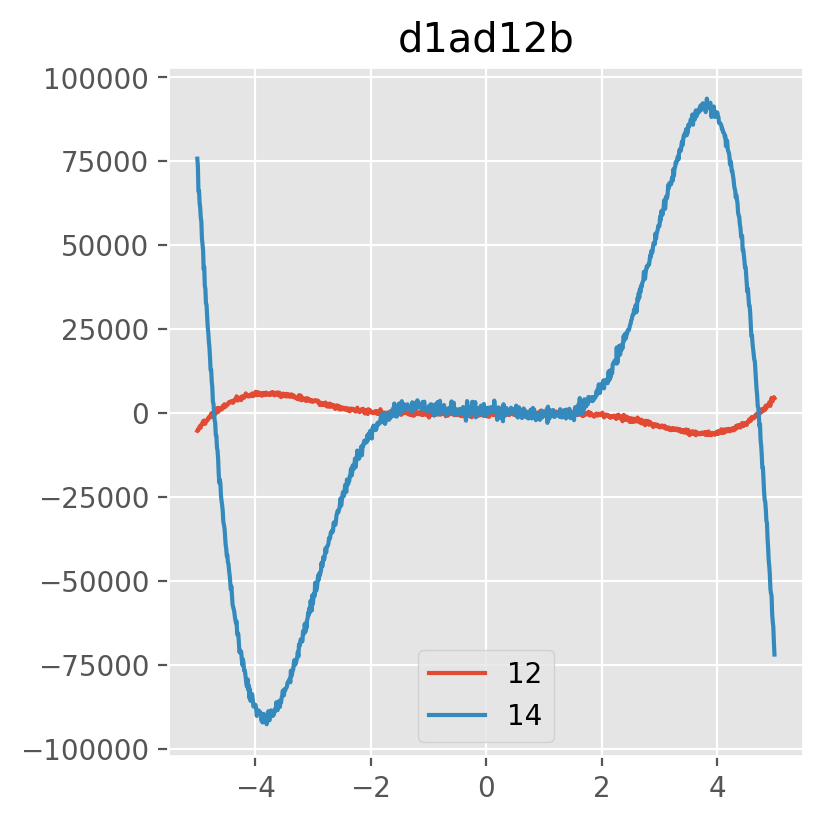

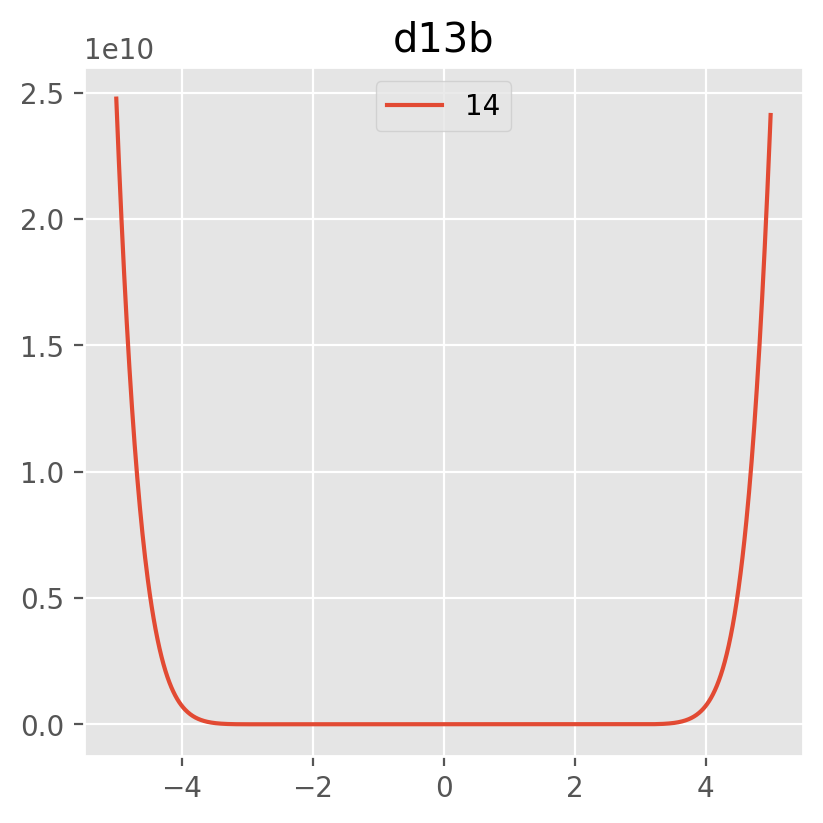

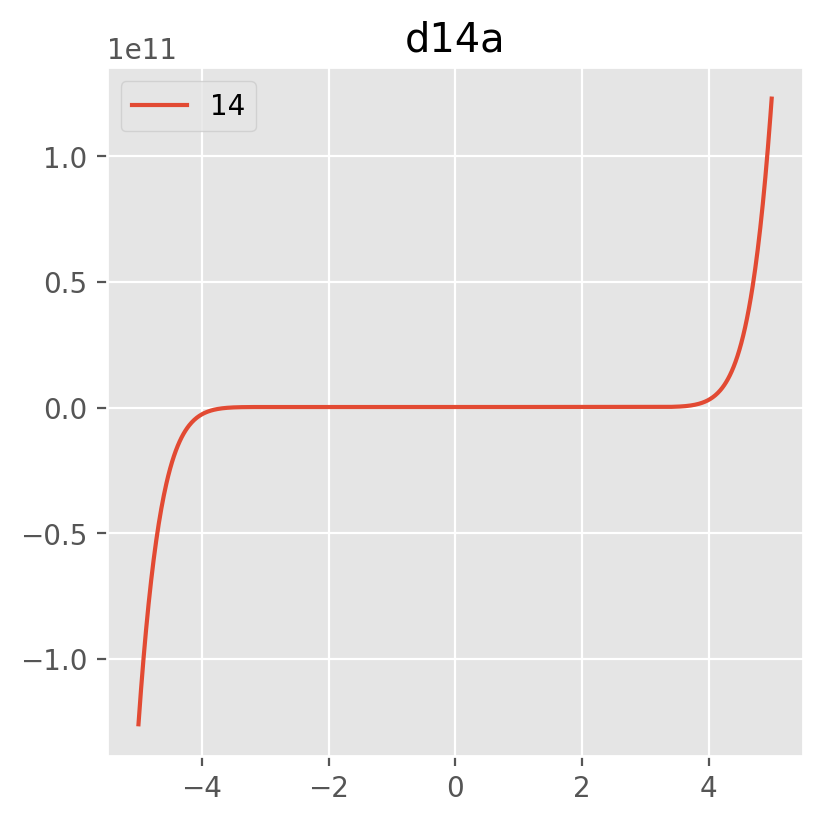

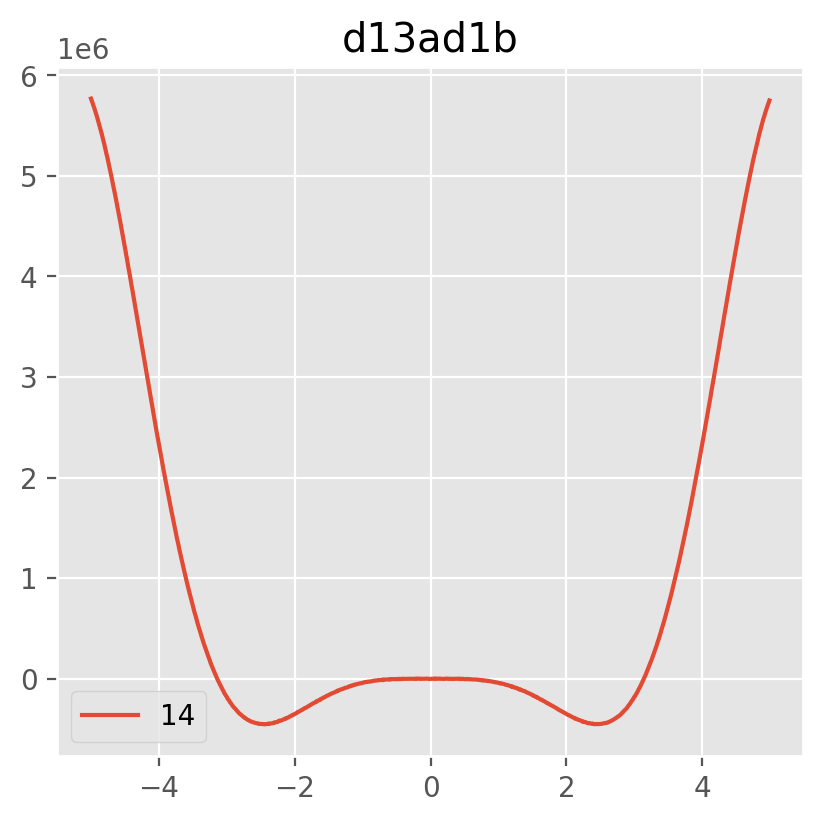

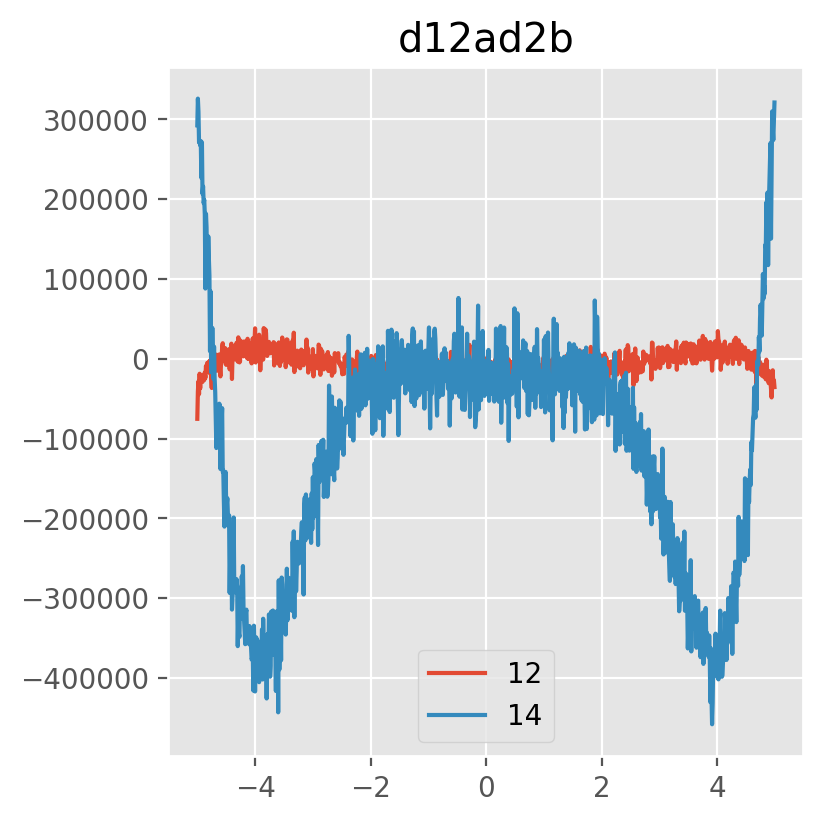

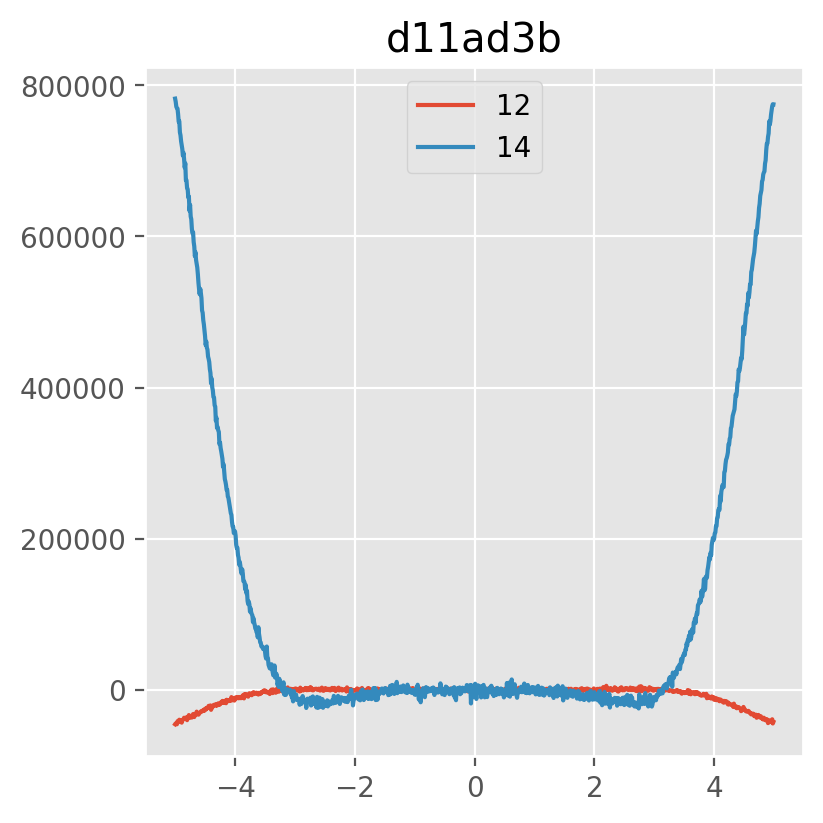

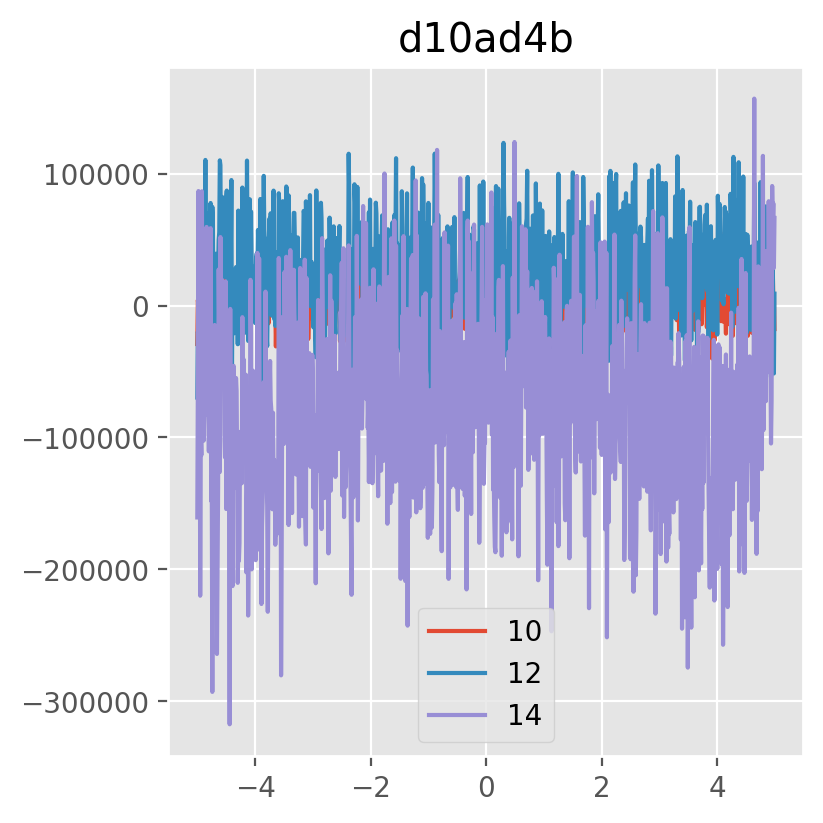

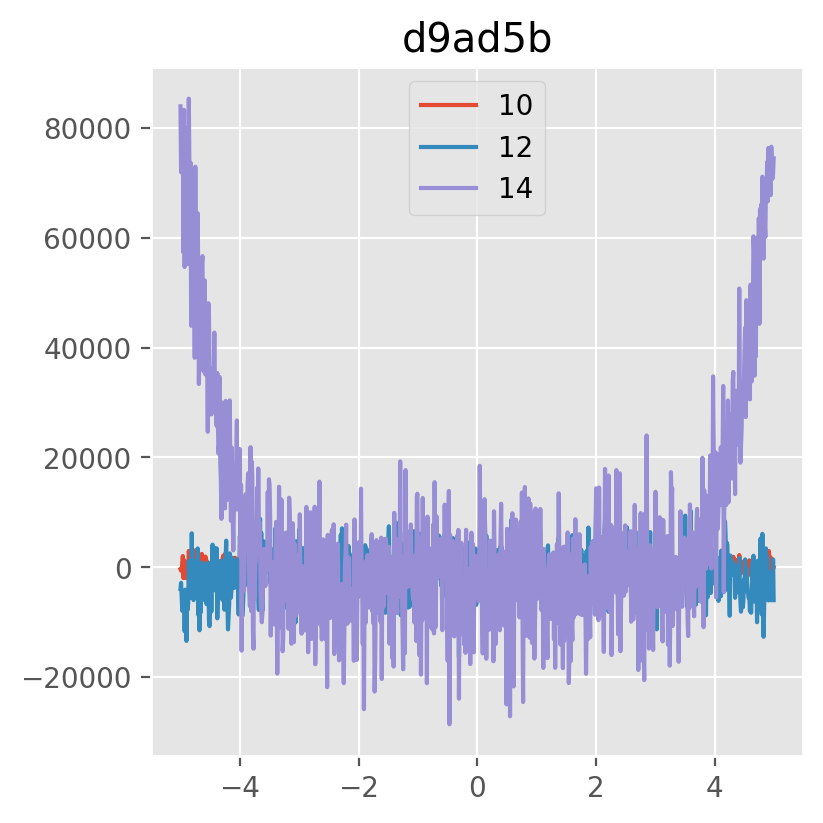

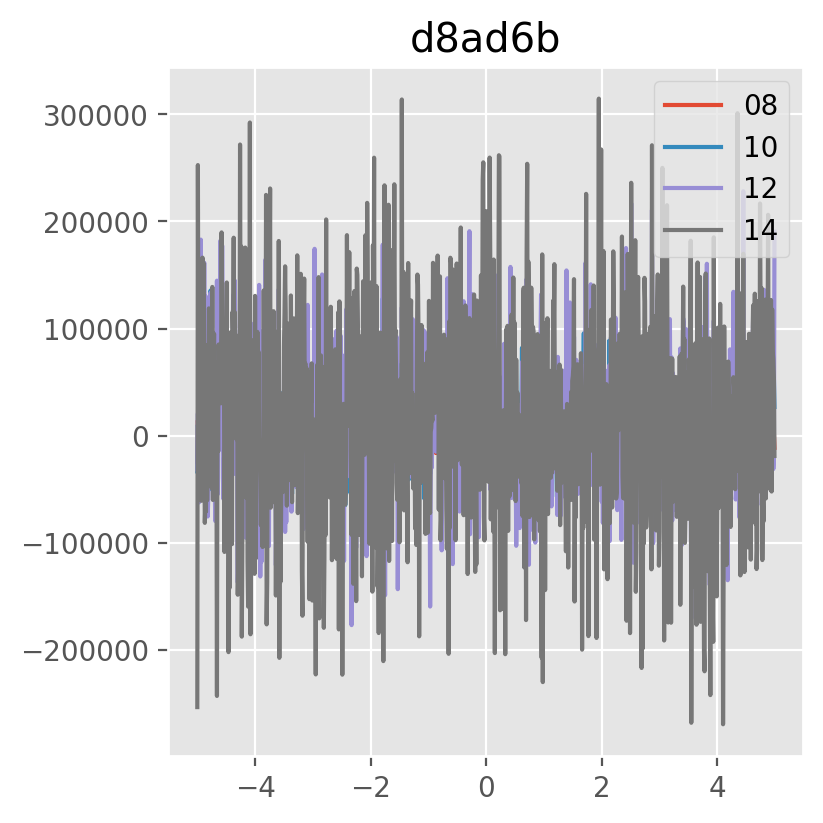

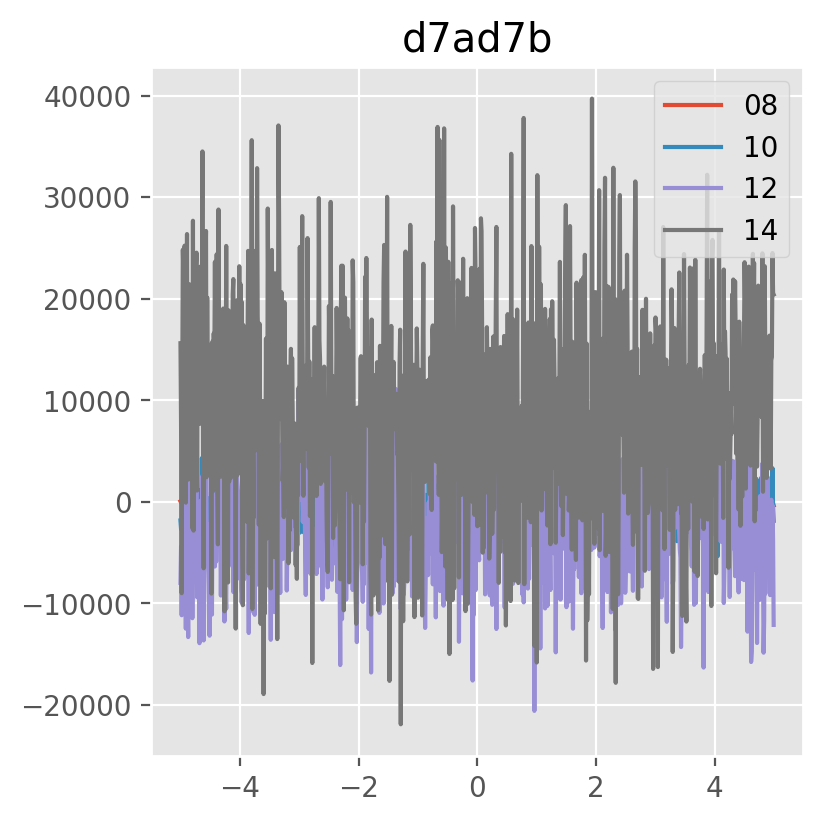

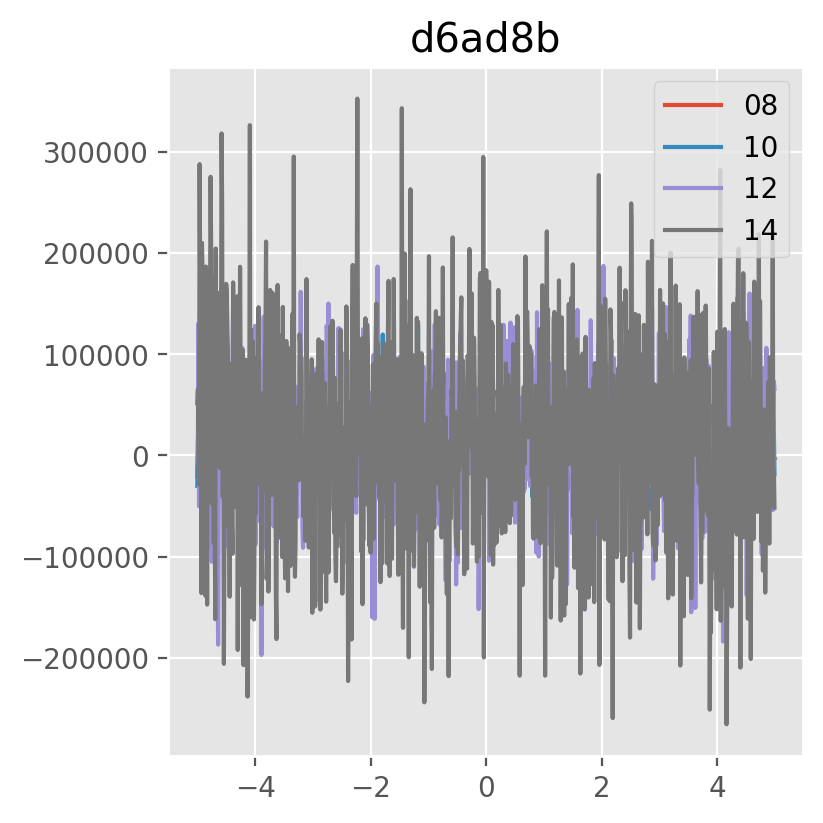

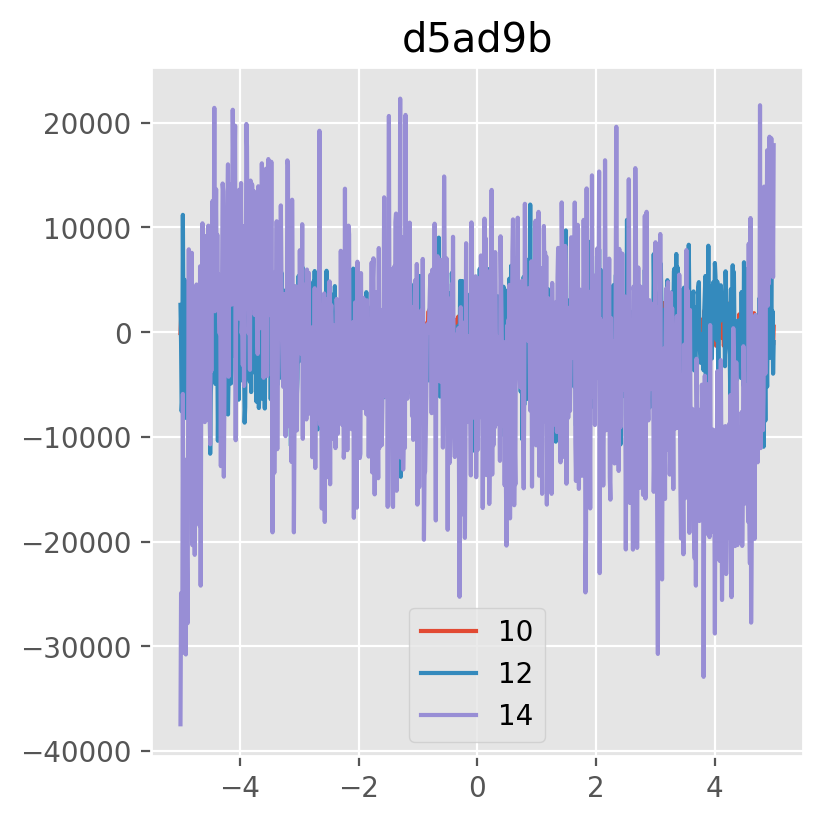

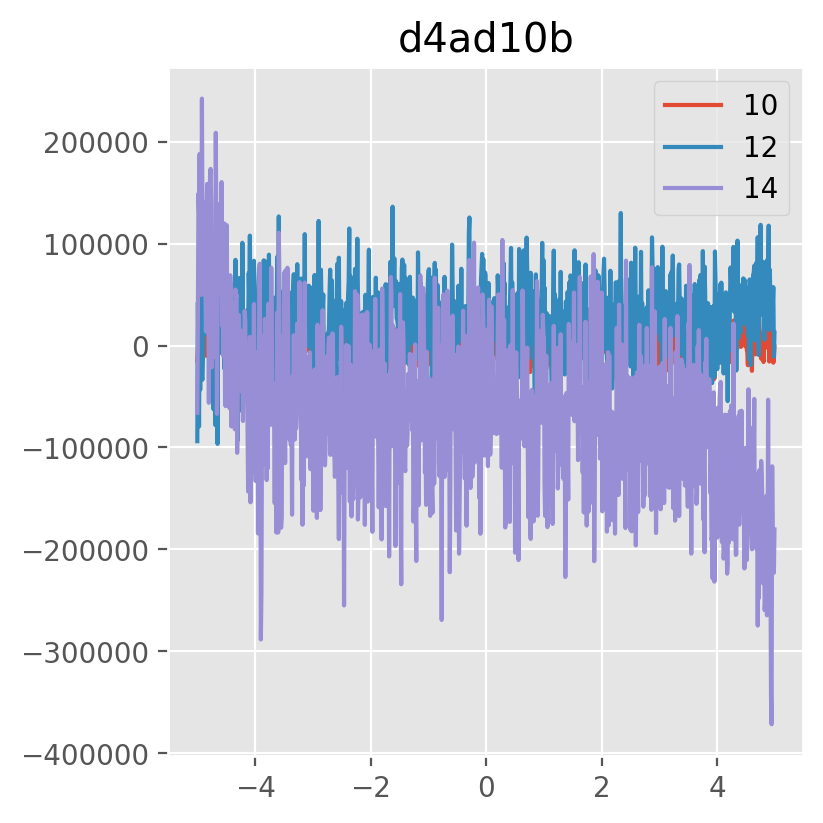

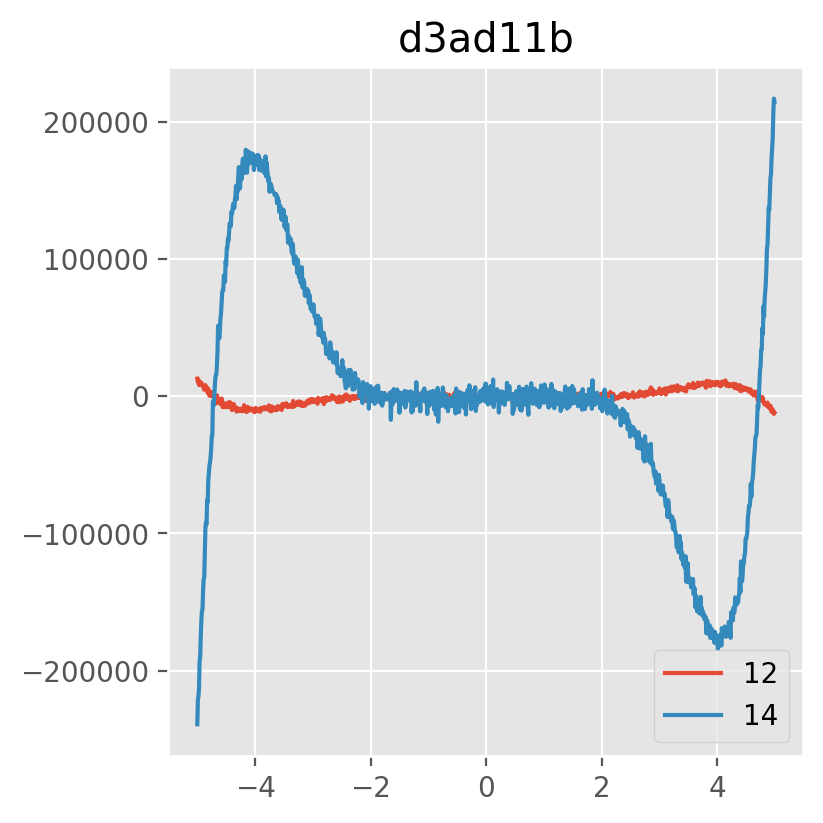

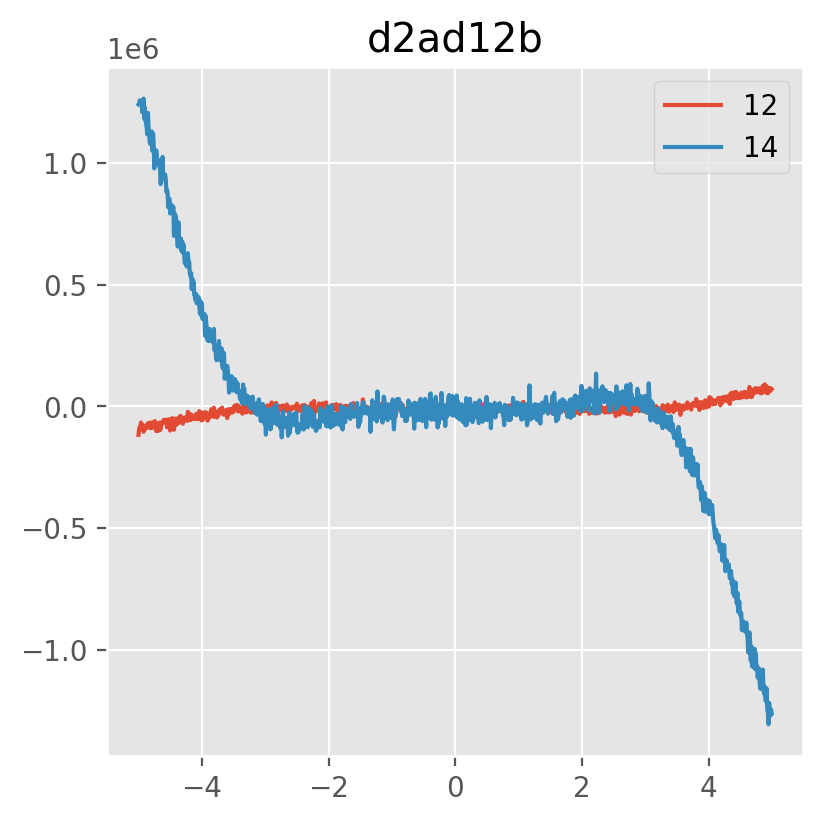

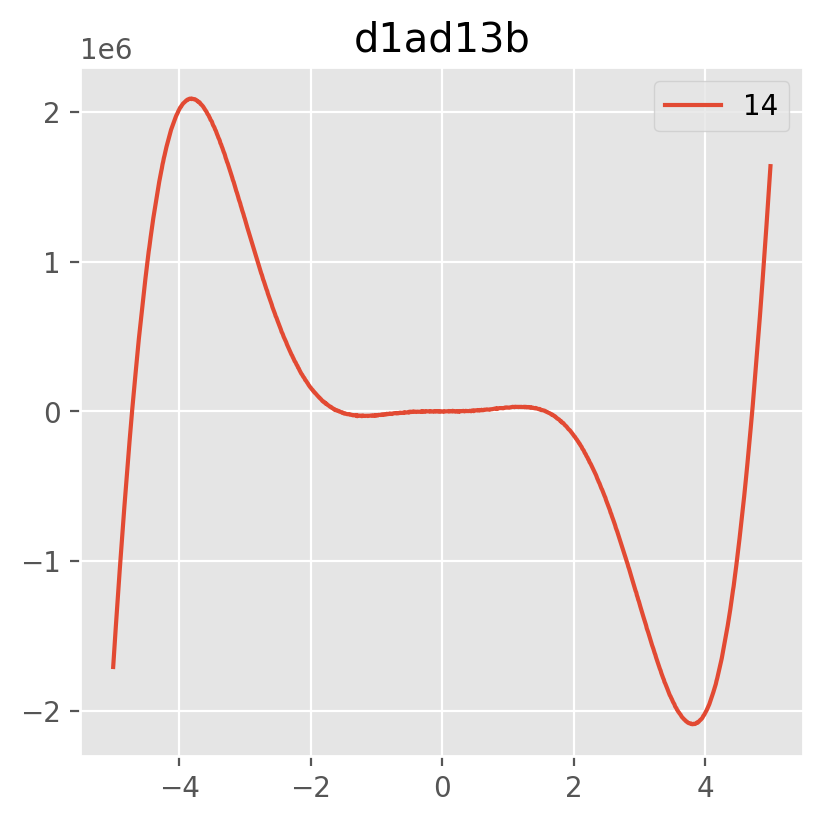

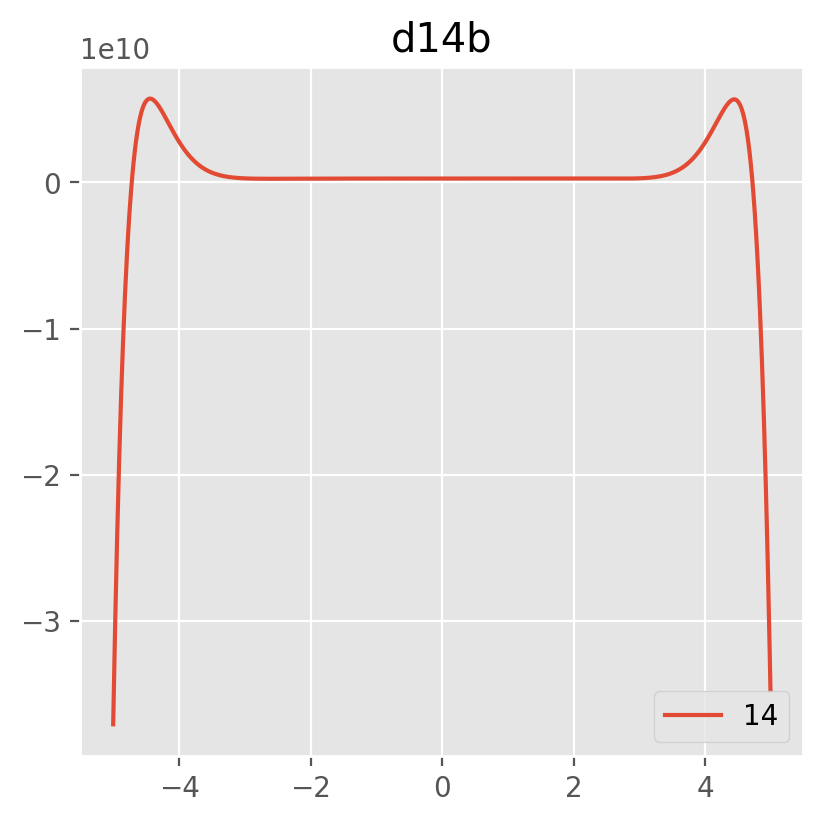

In [86]:
ND_obj.PlotDerivatives(x_axis=x_array)

Let us now try it increasing the order of the Taylor expansion.

In [87]:
from mycolorpy import colorlist as mcp

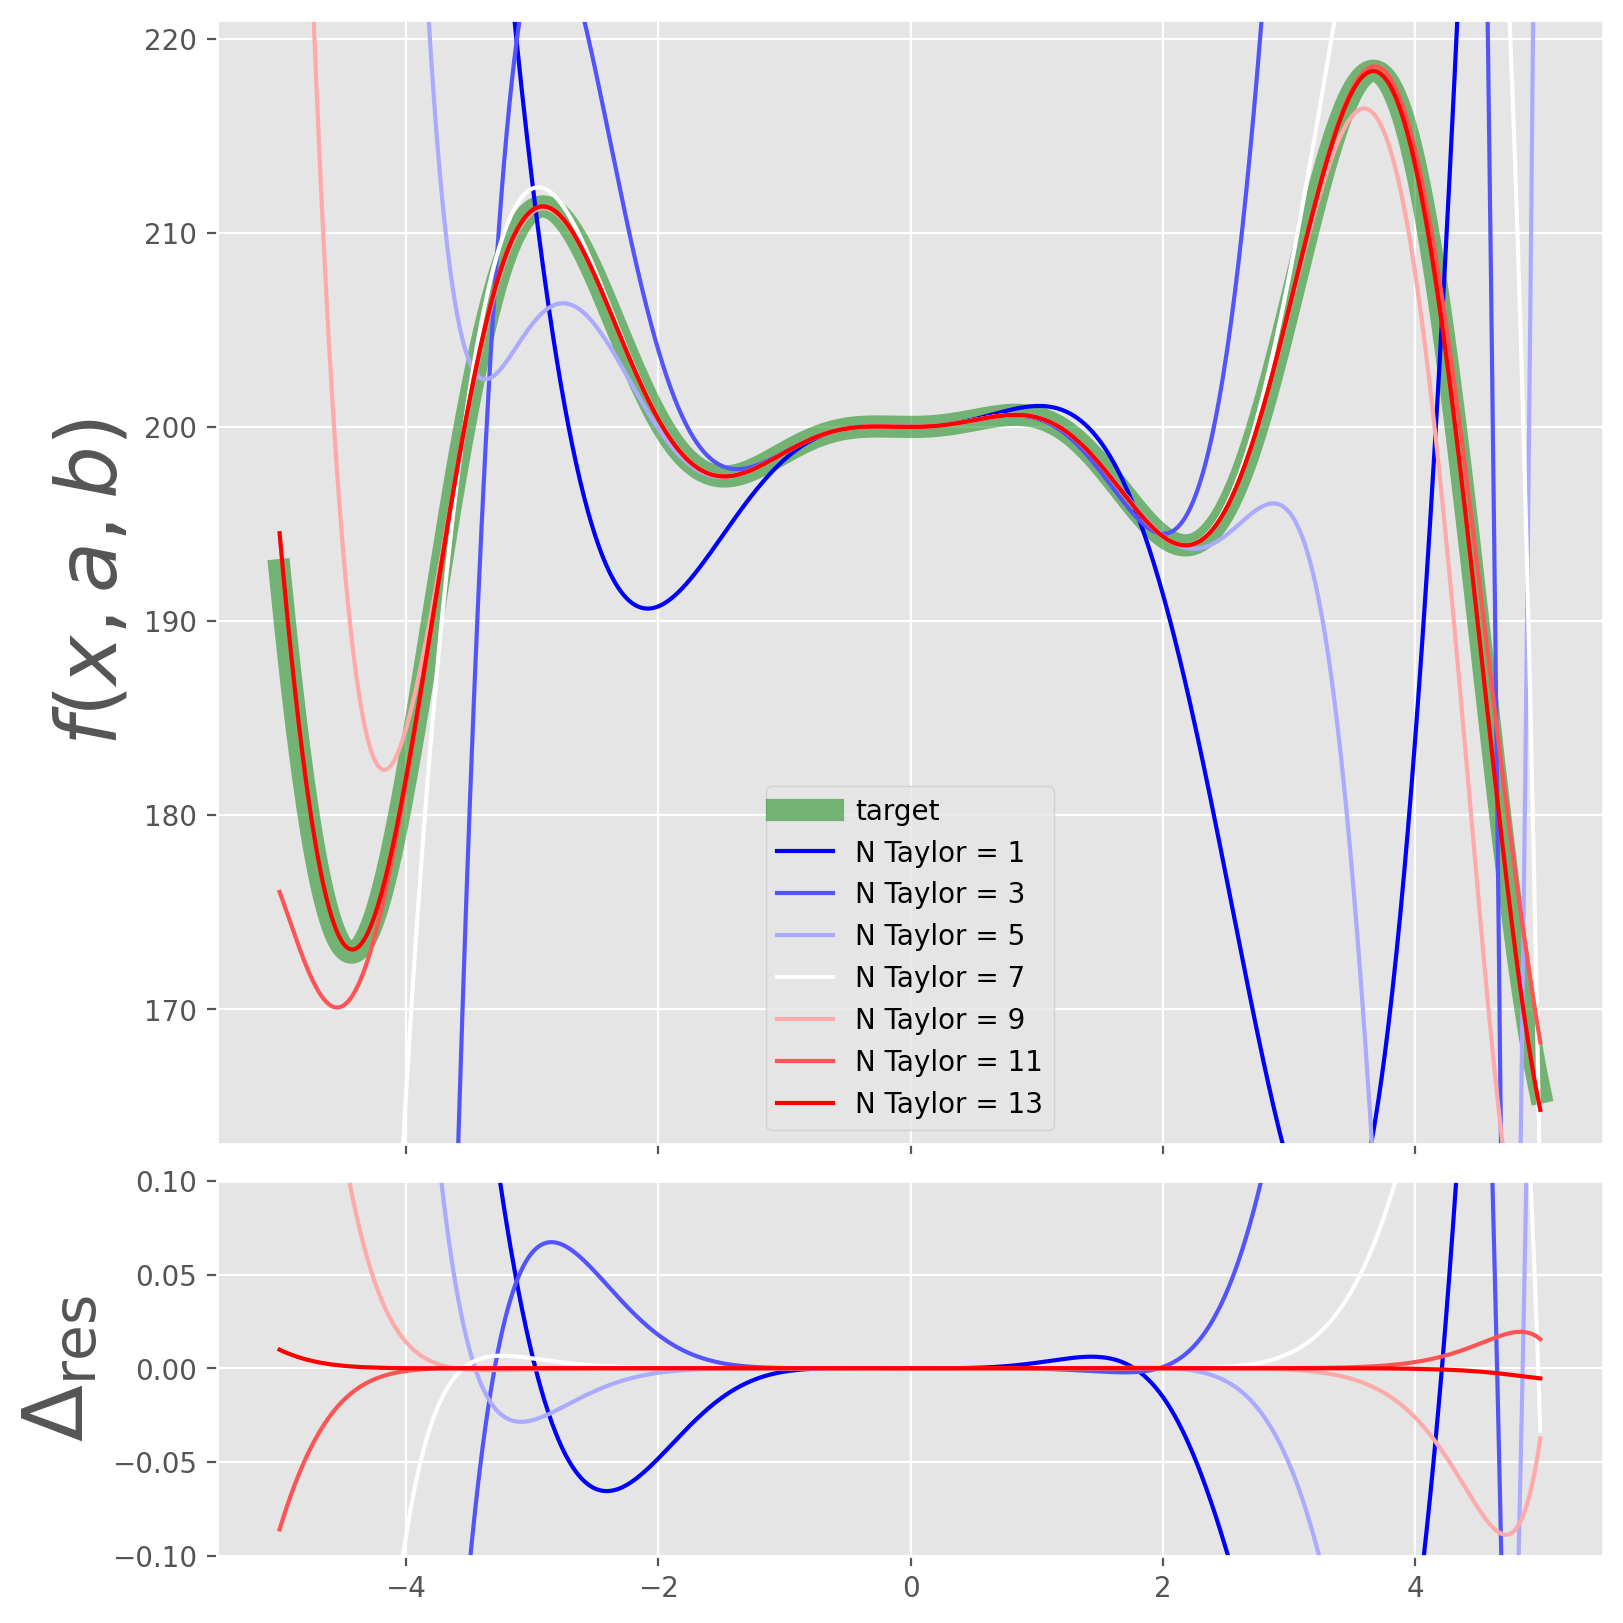

In [88]:
fig, ax = plt.subplots(2,1,figsize = (8,8), constrained_layout = True, gridspec_kw={'height_ratios': [3,1]},sharex=True)
a = 2; b = 2;
order_list = list(range(1,N_derivative))[::2]
colors = mcp.gen_color(cmap="bwr",n=N_derivative//2)

target = function_test([a,b], {"x_array":x_array})
ax[0].plot(x_array, target, color = "green", lw = 8, label = "target", alpha = 0.5)
lims = [ax[0].get_xlim(), ax[0].get_ylim()]
for i,x in enumerate(order_list):
    delta_rel = (ND_obj.TaylorExpand([a,b], x) - target)/target
    ax[0].plot(x_array, ND_obj.TaylorExpand([a,b], x), color = colors[i], label = "N Taylor = {}".format(x))
    ax[1].plot(x_array, delta_rel, color = colors[i])
    ax[0].legend()
ax[1].set_ylabel(r"$\Delta_{\rm res}$", size = 30)
ax[0].set_ylabel(r"$f(x,a,b)$", size = 30)
ax[0].set_xlim(lims[0])
ax[0].set_ylim(lims[1])
ax[1].set_ylim((-0.1,0.1))
plt.savefig("example.png")

The precision of the conde increases with the order of the expansion.